In [8]:
# Import the needed libraries
from matplotlib import pyplot as plt
import numpy as np
import struct

In [19]:
# Copy the output of the Serial Monitor to the variable below
HEXADECIMAL_BYTES = [
0x4B63, 0x4B63, 0x4B63, 0x6B63, 0x6B63, 0x4C63, 0x6C63, 0x4C63, 0x4C5B, 0x4C5B, 0x6C5B, 0x6C5B, 0x8C5B, 0x6C5B, 0x6C5B, 0x6C63, 0x8C5B, 0x8C5B, 0x8C5B, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x4C63, 0x4C63, 0x6C5B, 0x8C63, 0x6C63, 0x8B63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C5B, 0x6C5B, 0x8C5B, 0x8C5B, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6B5B, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x8C5B, 0x8C5B, 0x8C63, 0x8C63, 0x6C5B, 0xAC63, 0x6C63, 0x6C63, 0x4C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C5B, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C5B, 0x6C5B, 0x6C5B, 0x8C63, 0x8C63, 0x6C5B, 0x6C63, 0x6C63, 0x6C63, 0x6C5B, 0x8C5B, 0x6C5B, 0x6B5B, 0x6B5B, 0x8C63, 0x6C63, 0x6C5B, 0x6C5B, 0x6C5B, 0x6B5B, 0x4C5B, 0x6B5B, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C5B, 0x4C63, 0x4B5B, 0x4B5B, 0x6B5B, 0x8B5B, 0x8C5B, 0x6C5B, 0x6C5B, 0x4C5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4C63, 0x4C5B, 0x4C5B, 0x4C63, 0x4C63, 0x4B63, 0x4C5B, 0x4B5B, 0x4B53, 0x4B5B, 0x2B5B, 0x2B5B, 0x2B5B, 0x4B5B, 0x4B5B, 0x2B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x2B5B, 0x2B5B, 0x2B5B, 0xB53, 0xB53, 0xEA5A, 0xEA5A, 0xB5B, 0xB53, 0x4C5B, 0x2C5B, 0x2B5B, 0x2B5B, 0x4B53, 0x2B53, 0x2A53, 0x2A53, 0x2A53, 0x2A53, 0x2A53, 0xB53, 0xB53, 0xB53, 0xB53, 0xB5B, 0xEA52, 0x2A53, 0x8A5B, 0x2A53, 0xA53, 0x2B5B, 0x8C63, 0x6C63, 0x6B63, 0x6B63, 0x6B63, 0x6C5B, 0x6C5B, 0x4C5B, 0x4B63, 0x4C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C5B, 0x6C5B, 0x8C5B, 0x4C63, 0x4B5B, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x4C63, 0x4C5B, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C5B, 0x8C5B, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0xAC63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x4B63, 0x6C63, 0x4C5B, 0x6C63, 0x6C63, 0x6C63, 0xAC63, 0x8C63, 0x8C63, 0x6C5B, 0x6C5B, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C5B, 0x6C5B, 0x6C5B, 0x6B63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C5B, 0x8C5B, 0x8C5B, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C63, 0x6C5B, 0x6C5B, 0x4C5B, 0x4C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C5B, 0x4C5B, 0x6C5B, 0x4C5B, 0x4B5B, 0x4B5B, 0x4C5B, 0x4B5B, 0x4B5B, 0x4C63, 0x4C63, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x2B5B, 0x2B63, 0x2B5B, 0x4B63, 0x4B5B, 0x6B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x2B53, 0x2B5B, 0x2B5B, 0x4B5B, 0x2A5B, 0x2A5B, 0xA5B, 0x4B5B, 0x4C5B, 0xB5B, 0x2B5B, 0x2B5B, 0xB53, 0xA5B, 0x2A53, 0x4A53, 0x2A53, 0x2A53, 0x2A53, 0x2A53, 0xA53, 0xB53, 0xA53, 0xEB52, 0xEB52, 0x2A53, 0x2B53, 0x8A5B, 0x2A53, 0xEA52, 0xCA4A, 0x6C5B, 0x8C63, 0x6B63, 0x4B63, 0x6B5B, 0x6C5B, 0x6C5B, 0x6C63, 0x6C63, 0x4C63, 0x4B5B, 0x6B63, 0x8C63, 0x4B5B, 0x4C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6B63, 0x6C63, 0x6C63, 0x8C63, 0x4C5B, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C5B, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8B63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6B5B, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C5B, 0x6C63, 0x6C63, 0x6C5B, 0x8C63, 0x8C5B, 0x6C5B, 0x8C5B, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C5B, 0x6C63, 0x6C63, 0x4C63, 0x6C63, 0x8C63, 0x8C63, 0x6C5B, 0x8C5B, 0x8C5B, 0x8C5B, 0x8C5B, 0x6C5B, 0x6C63, 0x6C63, 0x6C5B, 0x4C5B, 0x4C63, 0x4C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C63, 0x6C63, 0x6C63, 0x6B63, 0x6B63, 0x6B5B, 0x6B5B, 0x4C5B, 0x6C5B, 0x6C5B, 0x6C63, 0x4C5B, 0x4B5B, 0x6B5B, 0x4B5B, 0x6B63, 0x6B63, 0x4B5B, 0x4C5B, 0x4B5B, 0x4B5B, 0x4C5B, 0x4B5B, 0x4B63, 0x4B63, 0x4B5B, 0x4B5B, 0x6B5B, 0x4B5B, 0x4B5B, 0x2B5B, 0x4B5B, 0x2B5B, 0x2B5B, 0x2B53, 0x4B5B, 0x4B5B, 0x8B63, 0x4B5B, 0x2B5B, 0x4B5B, 0x2B5B, 0x2B5B, 0x2B63, 0xB5B, 0xB5B, 0x2A5B, 0x4A53, 0x2A53, 0x2A53, 0x2A53, 0xA53, 0x2A53, 0x2A53, 0x2A53, 0x2B5B, 0x2B53, 0xA53, 0x2A53, 0x2A53, 0xE94A, 0xA53, 0xA53, 0x6C5B, 0x8C5B, 0x8B5B, 0x8B63, 0x8C63, 0x6C5B, 0x6C5B, 0x6C63, 0x6C63, 0x6C6B, 0x4C63, 0x6B63, 0x6C5B, 0x8C63, 0x4C5B, 0x6B63, 0x4C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6B63, 0x6C63, 0x6C6B, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x4C63, 0x4C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8B63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x8C5B, 0x6C5B, 0x6C5B, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x4C63, 0x8C63, 0x8C63, 0x8C63, 0x6C5B, 0x8C5B, 0x8C5B, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x4C63, 0x4C5B, 0x4C5B, 0x6C63, 0x6C63, 0x6C63, 0x6B5B, 0x6B5B, 0x6C63, 0x6C63, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C5B, 0x6B63, 0x6B63, 0x6B63, 0x6B5B, 0x6B5B, 0x4B5B, 0x4C5B, 0x6C5B, 0x6C5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x4B5B, 0x4B5B, 0x4C5B, 0x4C5B, 0x4B63, 0x4B5B, 0x4C63, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B63, 0x2B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x2B5B, 0x2B5B, 0x4B5B, 0x2B5B, 0x2B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B53, 0x4B63, 0x2B5B, 0xB5B, 0xB5B, 0x4B5B, 0x4B5B, 0x2B5B, 0x2A53, 0xA53, 0x2A53, 0x2B53, 0x2B53, 0xB53, 0xA53, 0x4A5B, 0xA53, 0xB5B, 0xA53, 0xA53, 0x2A53, 0xA53, 0x2A53, 0xB53, 0x6C5B, 0x6C5B, 0x6B5B, 0x8C63, 0x6C63, 0x8C63, 0x6C5B, 0x6C63, 0x4C63, 0x4C63, 0x6B63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x4C63, 0x4B63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6B63, 0x6C63, 0x6C63, 0x6D63, 0x6D63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8D63, 0x8D63, 0x8C5B, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x6C5B, 0x8C63, 0x6C5B, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8D63, 0x8C5B, 0x6C5B, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C5B, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x4C63, 0x4C5B, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0xAC63, 0x8C63, 0x6C63, 0x6C63, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C63, 0x6B63, 0x6B63, 0x6B5B, 0x4C5B, 0x4C63, 0x4C5B, 0x6C5B, 0x4C5B, 0x6C5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x4B5B, 0x2B5B, 0x4B5B, 0x4C5B, 0x4B63, 0x4B63, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x2B5B, 0x2B5B, 0x2B5B, 0x2B5B, 0x2B5B, 0x2B5B, 0xB5B, 0xB53, 0x2A53, 0x4B5B, 0x4B5B, 0x4B5B, 0xEB4A, 0x2A5B, 0x4A5B, 0x2A5B, 0xB5B, 0x2A5B, 0x2B5B, 0x4B5B, 0x2A5B, 0x2A5B, 0x2A5B, 0x2B53, 0xB5B, 0xB53, 0x2B53, 0xA53, 0x4A5B, 0xA53, 0xEA52, 0xA5B, 0xA53, 0xB53, 0xA53, 0xA53, 0xA53, 0x6C5B, 0x6C5B, 0x6C63, 0x6B63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x4C63, 0x6B63, 0x8C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x4B63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x4C63, 0x6C63, 0x6D63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8D63, 0x8D63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x4C63, 0x6C6B, 0x6C63, 0x8C63, 0x8C5B, 0xAC63, 0x6C63, 0xAB63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C5B, 0x6C63, 0x8C63, 0x8C63, 0xAC63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8D63, 0x6C63, 0x6C63, 0x4C5B, 0x6C5B, 0x6C63, 0x6C5B, 0x6C5B, 0x6C63, 0x6B5B, 0x6B5B, 0x6B5B, 0x6C63, 0x6C5B, 0x6C5B, 0x4C5B, 0x6C5B, 0x4C5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x4B5B, 0x2B5B, 0x4B5B, 0x6C63, 0x4C63, 0x2C63, 0x4B5B, 0x6B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B63, 0x4B5B, 0x2B5B, 0x2B5B, 0x4B5B, 0x2B5B, 0x4B5B, 0x6B5B, 0x4C5B, 0x4B5B, 0x2B53, 0x2A53, 0xEB4A, 0x2A5B, 0x4B5B, 0xB5B, 0x4B5B, 0x4B53, 0x2B5B, 0x2A5B, 0x2B5B, 0xA5B, 0x2B5B, 0x2A5B, 0x2A5B, 0xB53, 0xA5B, 0x2B5B, 0xA5B, 0xB5B, 0xA5B, 0xB5B, 0xEA52, 0xA53, 0xA53, 0xA53, 0xA53, 0x6B5B, 0x8B5B, 0x6B63, 0x6B63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0xAB6B, 0x4C63, 0x6C63, 0x6C63, 0x6D63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x8C5B, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C6B, 0x6C63, 0x6C63, 0x8C63, 0x8C5B, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0xAC63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C63, 0x6C63, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C63, 0x4D5B, 0x4C63, 0x4C63, 0x6C63, 0x4C5B, 0x6C5B, 0x6C63, 0x6C5B, 0x6C5B, 0x6C63, 0x6C63, 0x6C5B, 0x6B5B, 0x6C5B, 0x6C5B, 0x4C5B, 0x6C5B, 0x6C5B, 0x4C5B, 0x4C5B, 0x4C5B, 0x6C5B, 0x6C5B, 0x8C63, 0x8C63, 0x6C63, 0x4C63, 0x2C63, 0x4B5B, 0x6B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B63, 0x4B63, 0x4B5B, 0x2B5B, 0x4B5B, 0x4B5B, 0x4C5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x8B63, 0x6B5B, 0x2B53, 0xB53, 0x2A5B, 0x2A5B, 0x2B5B, 0x6B5B, 0x4B5B, 0x2B5B, 0x2B5B, 0xA5B, 0x2A5B, 0xA53, 0x2A5B, 0xA53, 0x2A5B, 0xB5B, 0xA5B, 0xA53, 0xB53, 0xA53, 0xEA52, 0xA53, 0xA53, 0xA53, 0xA53, 0x6B5B, 0x8B63, 0x6B63, 0x8B63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6B63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6B63, 0x8C63, 0x8C6B, 0x6D63, 0x8C63, 0x6C63, 0x6C63, 0x6C5B, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x8B63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0xAD6B, 0x8D63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0x8C6B, 0x8C6B, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x4C63, 0x6C63, 0x6C63, 0x6C63, 0x8C6B, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C5B, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C5B, 0x6C63, 0x6C63, 0x4C63, 0x6C63, 0x4C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6B63, 0x6C5B, 0x6C5B, 0x6C5B, 0x4C5B, 0x6C63, 0x6C5B, 0x6C5B, 0x4C5B, 0x4C5B, 0x6C5B, 0x6B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4C63, 0x4C63, 0x2B5B, 0x6B5B, 0x6B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x2B5B, 0x2B5B, 0x4B5B, 0x4B5B, 0x2C5B, 0x4B5B, 0x6B5B, 0xAB63, 0x6C5B, 0x2B53, 0x2B53, 0x2A5B, 0x2A53, 0x2B53, 0x2B53, 0xA53, 0xA5B, 0xA5B, 0xB5B, 0x2A5B, 0x2A53, 0x4A5B, 0x4A5B, 0x2A53, 0xA5B, 0xEA52, 0xA53, 0x2B5B, 0x4B5B, 0xA53, 0x2A53, 0x2B53, 0xA53, 0xA53, 0x6B5B, 0x6C5B, 0x6B63, 0x6B63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x4C63, 0x8B63, 0xAC63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C5B, 0x6C5B, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C5B, 0x8C63, 0x8C63, 0x8C6B, 0x8C6B, 0x8C6B, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0xAD63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8D63, 0x6C63, 0x6C63, 0x8C63, 0x6C5B, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6D63, 0x6C63, 0x8D6B, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x6C5B, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C5B, 0x6C63, 0x6C63, 0x4C5B, 0x6C63, 0x6C63, 0x6C5B, 0x6B5B, 0x4C5B, 0x4C5B, 0x6C5B, 0x4C5B, 0x4C5B, 0x4C5B, 0x6C5B, 0x6C5B, 0x6C5B, 0x4C5B, 0x4C5B, 0x4C5B, 0x4C5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x2B5B, 0x4B5B, 0x4B5B, 0x2B5B, 0x4B5B, 0x4B5B, 0x2B53, 0x2A53, 0xEB52, 0x2A5B, 0x2B53, 0x2B5B, 0x2B5B, 0x2B53, 0xB53, 0x2B5B, 0x2B5B, 0xB5B, 0xB53, 0xA53, 0x2A5B, 0x4A5B, 0x4B5B, 0x2A53, 0xA53, 0xA53, 0xB53, 0x4B5B, 0x2B53, 0xA53, 0xEA52, 0xA53, 0xA53, 0xA5B, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x4C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8D63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6D63, 0x8C6B, 0x6C6B, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C6B, 0x6D63, 0x8D63, 0x6C63, 0xAC6B, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C6B, 0x6C6B, 0x6C6B, 0x6C63, 0x6C63, 0x8C63, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x4C63, 0x6C63, 0x6C5B, 0x6C63, 0x4C63, 0x4C63, 0x4C63, 0x6C63, 0x6C63, 0x6C63, 0x6B5B, 0x6C5B, 0x6C5B, 0x4C5B, 0x4C5B, 0x4C5B, 0x4C5B, 0x6C5B, 0x6C5B, 0x4C5B, 0x4C5B, 0x4C5B, 0x4C5B, 0x4C5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0xB53, 0x4A5B, 0xB53, 0x2B5B, 0x2B5B, 0xB5B, 0xA53, 0x2B5B, 0xB5B, 0x2B5B, 0x2B5B, 0x2B53, 0xB53, 0xA53, 0x2B53, 0xA53, 0xA53, 0xA53, 0xA53, 0xEA4A, 0x2A53, 0xA53, 0xA53, 0xB5B, 0xEB5A, 0xEA52, 0xA53, 0xB53, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0xAC63, 0x8C63, 0x8C63, 0xAC63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8D63, 0x6D63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C6B, 0x6C6B, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C6B, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8C6B, 0x6C6B, 0x8C63, 0xAD63, 0xAD63, 0x8D63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x8D6B, 0x6C63, 0x6C63, 0x8C63, 0x8D63, 0x8C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x8C6B, 0x6C6B, 0x6C6B, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8B5B, 0x6B63, 0x6B63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x4C63, 0x4C5B, 0x6C63, 0x4C63, 0x4C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6B5B, 0x6C63, 0x4C5B, 0x6C5B, 0x6C63, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C5B, 0x4C5B, 0x4B5B, 0x4C5B, 0x4C63, 0x4C5B, 0x4B5B, 0x6B5B, 0x4B5B, 0x6C63, 0x4B5B, 0x4B5B, 0x4B63, 0x4B63, 0x4B5B, 0xAB63, 0x2B53, 0x2B53, 0xB53, 0xA5B, 0x4B5B, 0x4B5B, 0xB53, 0xA53, 0x2A5B, 0x2B5B, 0x2B53, 0x8B63, 0x4B53, 0x2B53, 0xB53, 0x2A53, 0x2A53, 0x8B5B, 0x8B5B, 0x2B53, 0xA53, 0xA53, 0xA5B, 0x2A5B, 0x2B5B, 0xA53, 0xA53, 0x6C63, 0x8C63, 0x8C63, 0x8C6B, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C6B, 0x6C63, 0x6C63, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C6B, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6D63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x8C6B, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x6D5B, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C6B, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6D63, 0x6C63, 0x8D63, 0x6C63, 0x8C63, 0xAC63, 0xAC63, 0xAC63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8D63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0x8C63, 0x8C63, 0x6C63, 0x8B63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6B63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C5B, 0x6C5B, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C5B, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x4C63, 0x4C5B, 0x4C5B, 0x6B5B, 0x6B63, 0x6C63, 0x4C63, 0x4C5B, 0x4C5B, 0x4B5B, 0x4B5B, 0x4B63, 0x4B63, 0x4C63, 0x4B63, 0x4C63, 0x4B5B, 0x4B5B, 0x4C5B, 0x4C5B, 0x4B5B, 0x6B5B, 0x6B5B, 0x4A5B, 0x4B5B, 0x4B5B, 0x2B5B, 0x4B5B, 0x2B53, 0x2B53, 0x4B5B, 0x4B5B, 0x2B5B, 0x2B53, 0x2A5B, 0x2B53, 0x2B5B, 0xB5B, 0xA53, 0x2B53, 0x2B53, 0x2A53, 0x2A5B, 0x2A5B, 0xA53, 0xA53, 0x4C63, 0x6B63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x8C63, 0x6C63, 0x8C63, 0x6C63, 0x8C63, 0x8C6B, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6D63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0xAC63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6D63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0xAC63, 0x6D63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x8C6B, 0x8D63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C5B, 0x6C63, 0x8D63, 0xAD6B, 0xAC63, 0xAC63, 0xAD63, 0x8D63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x8D63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0xAC63, 0xAD63, 0x8D63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x4B63, 0x6C63, 0x4C63, 0x6C63, 0x6C63, 0x6C63, 0x4C63, 0x4C5B, 0x6C5B, 0x6B63, 0x6B63, 0x6B5B, 0x6B5B, 0x4B5B, 0x4B5B, 0x6B63, 0x6C63, 0x4B63, 0x4C63, 0x6B63, 0x6C5B, 0x6B5B, 0x4B5B, 0x4B5B, 0x4C5B, 0x4B5B, 0x4B53, 0x4B53, 0x4B5B, 0x4B5B, 0x4B5B, 0x4C5B, 0x2C5B, 0x4B5B, 0x2B53, 0x2B53, 0xA53, 0xA53, 0x2B53, 0x2B5B, 0xB53, 0xEA52, 0xEA52, 0xB53, 0x2B53, 0x4B53, 0x2B5B, 0x2B5B, 0x2B5B, 0x2A53, 0xA53, 0x4C63, 0x6B63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0xAC63, 0xAC63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C6B, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x8C6B, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0xAC6B, 0x8D6B, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAC6B, 0xAC63, 0xAC63, 0xAC63, 0x8C63, 0x8C63, 0xAC63, 0xAC63, 0x8C63, 0xAC63, 0xAC63, 0xAD63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0xAC6B, 0x6D63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C5B, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6B63, 0x8B63, 0x6B63, 0x6B63, 0x6B5B, 0x4C5B, 0x4C5B, 0x6C63, 0x4C5B, 0x4C5B, 0x6B5B, 0x4B5B, 0x6B5B, 0x8C63, 0x6C63, 0x4B63, 0x4B63, 0x2B5B, 0x2B5B, 0x4C5B, 0x4C5B, 0x2B5B, 0x4B5B, 0x6B53, 0x4B53, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B53, 0x4B53, 0x4B5B, 0x4B5B, 0x4C5B, 0x4B5B, 0x2B5B, 0x2B5B, 0xB5B, 0xB5B, 0xB5B, 0xA5B, 0x2B53, 0x2B53, 0x2B5B, 0x2B5B, 0x2B5B, 0x2B53, 0xA53, 0xA53, 0xA53, 0xA53, 0xA5B, 0x2A5B, 0xA53, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x8C6B, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C6B, 0x8C6B, 0x8C6B, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C6B, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C6B, 0x8D6B, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0xAC63, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6D63, 0x6D63, 0xAC6B, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x4C5B, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x4C5B, 0x6C5B, 0x6B63, 0x6B63, 0x6B63, 0x6B63, 0x6B63, 0x2A5B, 0x6B63, 0x6B5B, 0x6C63, 0x6C63, 0x6C5B, 0x6C5B, 0x6C5B, 0x8C5B, 0x6C5B, 0x6B63, 0x4B5B, 0x4B63, 0x4C63, 0x4C63, 0x4C5B, 0x4B5B, 0x6B5B, 0x4B5B, 0x2B5B, 0x4B5B, 0x6B5B, 0x4B53, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B53, 0x4B53, 0x4B5B, 0x2B5B, 0x4B5B, 0x2B5B, 0x4C53, 0x4B5B, 0x6B5B, 0x4B5B, 0x2B5B, 0x2B53, 0x4B5B, 0x4B53, 0x2A5B, 0x2A5B, 0xA53, 0x2B53, 0x2B53, 0x2A53, 0x2B5B, 0xA53, 0xA5B, 0xB53, 0xA53, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C6B, 0x6C63, 0x8C63, 0x8C6B, 0x8C6B, 0x6C63, 0x8C63, 0x8C5B, 0xAC63, 0x8C63, 0x8C63, 0x8D63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0xAC63, 0x8D63, 0x8C63, 0x8C63, 0x8C6B, 0x8C6B, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C6B, 0x8C6B, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C6B, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xCD6B, 0xAD63, 0xAD63, 0x8C63, 0x8C6B, 0x6C63, 0x6C63, 0xAC6B, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0xCC63, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0xCC6B, 0x8C63, 0x6D63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x4C63, 0x4C63, 0x6B63, 0x6B63, 0x6B63, 0x8B5B, 0x8B63, 0xAC63, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C63, 0x6C63, 0x8C63, 0x6C5B, 0x8C63, 0x6B63, 0x4B5B, 0x6B63, 0x4C63, 0x4C5B, 0x6C5B, 0x6B5B, 0x6B5B, 0x4B5B, 0x4C5B, 0x4B5B, 0x4B5B, 0x4B53, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B53, 0x4B5B, 0x4B5B, 0x2B5B, 0x4B63, 0x2B5B, 0x4B5B, 0x4B5B, 0x4C5B, 0x4B5B, 0x6B5B, 0x4B53, 0x4B53, 0x4B53, 0x2A5B, 0xB5B, 0x2B5B, 0x2B5B, 0x2B5B, 0xB5B, 0x2B5B, 0x2B5B, 0xB53, 0xB53, 0xA53, 0x6C63, 0x4C5B, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0x8C6B, 0x8C63, 0x6C63, 0x8C6B, 0x8C6B, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0x8C63, 0x8C63, 0x8D63, 0x8D63, 0x8D63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAD6B, 0xAD63, 0x8C63, 0x8C63, 0x8C63, 0x8D6B, 0x8D63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0xAC6B, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAC6B, 0xAC63, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAD63, 0x6D63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0xAC63, 0xAC63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C6B, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0x8D63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0x8C6B, 0x8C63, 0x8D63, 0x8D63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6D63, 0x6C63, 0x8D63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6B63, 0x6B63, 0x8C63, 0x8C5B, 0x8C5B, 0x8C5B, 0x8C5B, 0x8C63, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C63, 0x6B5B, 0x6B5B, 0x6C63, 0x6C63, 0x4C63, 0x6C63, 0x4C5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x4B5B, 0x6B5B, 0x6B5B, 0x4B5B, 0x4C5B, 0x4B5B, 0x4B5B, 0x4C5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x2B5B, 0x2B5B, 0x2B5B, 0x4B5B, 0x4C5B, 0x2B5B, 0x6B5B, 0x4B5B, 0x4B53, 0x4B53, 0x2A53, 0x2B5B, 0x2B5B, 0x4B5B, 0x2B5B, 0x2B5B, 0x2B53, 0x2B5B, 0x2B5B, 0x2B53, 0xB5B, 0xA53, 0x6C63, 0x6C63, 0x8D63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C5B, 0x8C5B, 0x6C63, 0x8C6B, 0x8C63, 0x6C63, 0x4C63, 0x4B63, 0x6C63, 0x8C6B, 0x6D63, 0xAC6B, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8D63, 0x8D63, 0x8D63, 0x6D63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C6B, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0xAD63, 0x8C6B, 0x8C6B, 0x8C6B, 0x8C63, 0xAC63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6D63, 0x8C63, 0x8C63, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0xAC63, 0xAC6B, 0x8C63, 0x8C6B, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAC6B, 0x8D6B, 0x8C63, 0x8D63, 0x8C63, 0x8C63, 0x8C63, 0x8D63, 0x8C63, 0x8C63, 0x8D63, 0x8C63, 0x8C63, 0xAD63, 0x8C63, 0x8C63, 0x8D63, 0x8D63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x4C5B, 0x8C63, 0x6D63, 0x4C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6B63, 0x6B63, 0x6C63, 0x6C63, 0x6C5B, 0x6C5B, 0x6C5B, 0x8C5B, 0x6C5B, 0x8C5B, 0x8C63, 0x6C63, 0x6B63, 0x4B63, 0x6C63, 0x4C63, 0x4C63, 0x6C63, 0x6C5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x2B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x2B5B, 0x2B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B53, 0x2B53, 0x4A53, 0x4B53, 0x2A5B, 0x2B5B, 0x2B5B, 0x2B5B, 0xB53, 0xB5B, 0x2B5B, 0x2A53, 0xA53, 0x2A53, 0x2A53, 0xEA52, 0x4C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C5B, 0x6C63, 0x8C6B, 0x6C63, 0x6C63, 0x8C63, 0x8C6B, 0xAD63, 0x8D63, 0x8D6B, 0x8C6B, 0xAC63, 0x8C63, 0x8C63, 0x6C63, 0x8C6B, 0x8D63, 0x8C63, 0x8C6B, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0xAC6B, 0x8C63, 0x8C63, 0xAD63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8D63, 0x8C6B, 0x8C63, 0xAD63, 0xAC63, 0xCD63, 0x8C63, 0x8C63, 0x8D63, 0x8C63, 0x8D63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0x8C63, 0xAC6B, 0x8C6B, 0x8C63, 0xAD63, 0x8C63, 0xAC63, 0x6C63, 0x8C63, 0x8C63, 0xAC63, 0x8C63, 0x8C63, 0x8C6B, 0x8D63, 0x6C63, 0x8D63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x8D63, 0x8D63, 0x6D63, 0xAC63, 0xAD6B, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x4C63, 0x8C63, 0x8D63, 0xAC63, 0xAC63, 0x8C63, 0x8D63, 0x6D63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x4C5B, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8B63, 0x6C63, 0x6C63, 0x6C63, 0x6C5B, 0x6C5B, 0x8C5B, 0x6C5B, 0x8C5B, 0x6C5B, 0x6B63, 0x6B63, 0x6C63, 0x4C63, 0x2C63, 0x6C63, 0x6C5B, 0x6B5B, 0x4C5B, 0x6C5B, 0x6B5B, 0x4C5B, 0x4B5B, 0x6C5B, 0x6B5B, 0x6B5B, 0x4B5B, 0x4B5B, 0x2C5B, 0x2B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x2B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x2B5B, 0x2B53, 0x2B5B, 0xB5B, 0x2B5B, 0x2B5B, 0x2B5B, 0xB53, 0xA53, 0x2B5B, 0x4B5B, 0x4B5B, 0x2B53, 0x2B5B, 0x2A53, 0x6B63, 0x8C63, 0x6C63, 0x8C63, 0xAC6B, 0x8C6B, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C6B, 0x6C6B, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8D6B, 0x8D63, 0xAC63, 0xAC63, 0x8C63, 0x8C63, 0x8C6B, 0x6C63, 0x6C63, 0x8C6B, 0x8C6B, 0xAD6B, 0xAD63, 0xAD63, 0xAC63, 0xAC63, 0x8C63, 0xAC63, 0xAD63, 0xAC63, 0xAC6B, 0x8C63, 0x8C6B, 0x8D6B, 0x8C63, 0x8C63, 0x8D6B, 0x8C6B, 0xAC63, 0xAD63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0xAD63, 0x8C63, 0x8C63, 0xAD63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAC6B, 0xAC6B, 0x8C6B, 0xCC6B, 0x8C6B, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0x8D63, 0x6C63, 0x8D6B, 0x8C6B, 0xAC63, 0x8C63, 0x8C63, 0xAC63, 0x8C63, 0x8D63, 0x8C63, 0xAD63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x4C63, 0x8C6B, 0x8D63, 0x8C63, 0xAC63, 0x8C63, 0x8D63, 0x8C6B, 0x6C63, 0x6C63, 0x8C6B, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C6B, 0x8C6B, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8B63, 0x6B63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C5B, 0x8C5B, 0x8C5B, 0x4C5B, 0x6B5B, 0x6B63, 0x6B63, 0x6B63, 0x4C63, 0x2C63, 0x4B63, 0x6C5B, 0x6C63, 0x4C63, 0x6C63, 0x6B5B, 0x4B5B, 0x4C5B, 0x6C5B, 0x6B5B, 0x4B5B, 0x4B5B, 0x4B63, 0x6B63, 0x4C63, 0x4C5B, 0x4B5B, 0x4B5B, 0x4B53, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B63, 0x2B5B, 0x2B5B, 0x2B5B, 0x2B5B, 0xB5B, 0x2B5B, 0x2B5B, 0x2B5B, 0x2B5B, 0x2A5B, 0x4B53, 0x4B5B, 0xEB4A, 0x2A5B, 0xA53, 0x6C63, 0x8C63, 0x6C63, 0x8C63, 0x8C6B, 0x8C6B, 0x6C63, 0x8C63, 0x8C63, 0x8C6B, 0x8D6B, 0x6C6B, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8D6B, 0xAD6B, 0x6C63, 0xAC63, 0x8B63, 0x8C63, 0x8C63, 0x6C63, 0x4C63, 0x8C63, 0x8C6B, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0xAC6B, 0x8C6B, 0x6C63, 0x6C63, 0x8C63, 0x8D63, 0x8C6B, 0x8D63, 0xAD63, 0xAD63, 0xCC6B, 0xAD63, 0x8C63, 0xAC63, 0xAC63, 0xAD63, 0xAC63, 0xAD63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0xAC63, 0xAC6B, 0x8C6B, 0xAC6B, 0x8D6B, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0xAC63, 0xAC63, 0x8C63, 0x8D63, 0x8C63, 0x6C63, 0x8D6B, 0x8D6B, 0x8C63, 0xAC63, 0xAC63, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0x8C6B, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAC6B, 0x8D63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x8C6B, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x4C5B, 0x4B5B, 0x8C63, 0x6C63, 0x8C63, 0x8D6B, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C5B, 0x8C63, 0x6C63, 0x4C63, 0x6B63, 0x6C63, 0x6C63, 0x2C63, 0x4B63, 0x6C63, 0x6B5B, 0x6C63, 0x6C63, 0x4B63, 0x6B63, 0x6C63, 0x6C5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x4B5B, 0x4B63, 0x4C63, 0x4B63, 0x2B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B53, 0x4B53, 0x4B53, 0xA5B, 0x2B5B, 0x4B5B, 0xB5B, 0x2B5B, 0xB5B, 0xEB5A, 0x2B5B, 0x2B5B, 0xB5B, 0x2A5B, 0x2A5B, 0x2A53, 0x2B5B, 0xEB4A, 0x4B5B, 0x2A5B, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0xAC6B, 0x6D63, 0x6C6B, 0x6C63, 0x6C63, 0x8D63, 0x8C63, 0x8D6B, 0x8D63, 0xAC63, 0x8C5B, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0xAC63, 0xAC63, 0x8C63, 0x8C63, 0xAC63, 0xAC63, 0x8C63, 0x8C63, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8D6B, 0x6C63, 0xAC6B, 0xAD6B, 0x8C6B, 0x8C63, 0xAD63, 0xAD63, 0xAD63, 0x8D63, 0x8C63, 0x8D63, 0xAC63, 0xAD63, 0xAD63, 0xAC63, 0x8D63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAC6B, 0x8C6B, 0x8C6B, 0x8C6B, 0x8D6B, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0xAC63, 0x8C63, 0xAC6B, 0x8C63, 0x6D63, 0x6C63, 0x8C6B, 0x6D6B, 0x8C6B, 0xAC6B, 0x8C6B, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0x8C63, 0x8C6B, 0x8C6B, 0x8C63, 0xAC63, 0x8D6B, 0x8C63, 0xAC63, 0xAC63, 0x8C63, 0x6C63, 0x6C63, 0x8C6B, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0x8C63, 0x8C63, 0x8C6B, 0x8C6B, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xCC6B, 0xCD6B, 0x8C63, 0x8C63, 0x6C63, 0x8D63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0xAC63, 0x8C63, 0x6C5B, 0x6B5B, 0x4B5B, 0x6C5B, 0x6C63, 0x6B5B, 0x6B63, 0x6B63, 0x6C5B, 0x4C5B, 0x4B5B, 0x4B5B, 0x8B63, 0x6B5B, 0x4B63, 0x4B63, 0x2B5B, 0x4B5B, 0x4B5B, 0x4B53, 0x6B53, 0x4A5B, 0x2B5B, 0x2B5B, 0x2B5B, 0x2B5B, 0x4B5B, 0x2B5B, 0xB5B, 0x2B5B, 0xB53, 0x2A5B, 0x2B5B, 0x2A5B, 0x2A5B, 0x2A53, 0x2B5B, 0xB53, 0x2B5B, 0x2B5B, 0x8C63, 0x8C63, 0x6D63, 0x6D63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C6B, 0x6D63, 0x6C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0xAD6B, 0x8C63, 0xAC63, 0x8B63, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0xAD63, 0xAC63, 0x8C63, 0x8C63, 0x8D63, 0xAC6B, 0xAC63, 0x8C63, 0x8D6B, 0x8C63, 0x8C63, 0xAC63, 0x8C63, 0x8C63, 0xAD63, 0xAD6B, 0xAC6B, 0xAC63, 0x8C6B, 0xAD6B, 0x8D63, 0xAC63, 0xAC63, 0xAD63, 0x6C63, 0x8C6B, 0x6D63, 0x8D63, 0x8D63, 0xAC63, 0x8C63, 0xAC63, 0x8C63, 0xAC63, 0x8C6B, 0x8C6B, 0x8D6B, 0x8D6B, 0x8C6B, 0x8C6B, 0x8C63, 0x6C63, 0x6C63, 0x8D63, 0x8D63, 0xAD63, 0xAD63, 0x8D63, 0x8D63, 0x8C63, 0x8C6B, 0x4C63, 0x8C6B, 0x8C6B, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0x8C6B, 0x8D63, 0xAC63, 0xAC63, 0xAD63, 0x8D63, 0xAD63, 0xAC63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0xAD6B, 0x8C63, 0x8C63, 0xAC6B, 0xAD6B, 0x8D63, 0x8C63, 0x8D6B, 0x8C6B, 0x8C6B, 0x6C63, 0x8C63, 0x8D63, 0x8C63, 0x6C63, 0x8C63, 0xAC63, 0x8C63, 0x8C63, 0x6C63, 0x8D63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x4B5B, 0x4B5B, 0x6B5B, 0x6B63, 0x6C5B, 0x4C5B, 0x6C63, 0x6C5B, 0x6C5B, 0x4B53, 0x4B5B, 0x8C63, 0x6C5B, 0x4C63, 0x4B5B, 0x4B63, 0x4B5B, 0x4B5B, 0x4B53, 0x6B53, 0x6B5B, 0x4B5B, 0x2B5B, 0x2B5B, 0x2B5B, 0x4B5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x8C63, 0x4B5B, 0x2B5B, 0x2B5B, 0xB53, 0x2B53, 0xB53, 0x2B5B, 0x2B53, 0x2B5B, 0xAD6B, 0x8D63, 0xAC6B, 0x8D6B, 0x8C63, 0xAD6B, 0x8C63, 0xAB63, 0x8C63, 0x8C63, 0x6D63, 0x6C63, 0x8C63, 0xAC6B, 0x8D6B, 0xAC63, 0xAC63, 0x8C63, 0xAC6B, 0xAC63, 0xAC6B, 0xAC63, 0x8C63, 0x8C63, 0xAD63, 0xAC63, 0x8C63, 0x8C6B, 0x8D63, 0x8C63, 0x8C6B, 0x8C6B, 0xAC6B, 0x8C6B, 0x8C6B, 0x8C6B, 0x8C63, 0x8C63, 0xAD6B, 0xAD6B, 0xAC6B, 0xAC63, 0x8C6B, 0xAC63, 0xAC63, 0x8C5B, 0xAC63, 0xAC63, 0x8D63, 0xAC6B, 0x6D63, 0x6C63, 0x8D63, 0xAD63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0x8C6B, 0x8C6B, 0x8C6B, 0x8D63, 0x8C6B, 0x8C6B, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0xAD63, 0xAD63, 0xAD6B, 0x8D63, 0xAD6B, 0x8D63, 0x6C63, 0x8C63, 0x6C63, 0x8C6B, 0x8C63, 0x8C6B, 0xAC63, 0x8C6B, 0x8C6B, 0x8C63, 0x8C63, 0x8C63, 0x6D63, 0x8C63, 0x8D63, 0x8C63, 0xAD63, 0xAD63, 0xAD63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8D63, 0x8D63, 0xAC63, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C5B, 0x6C5B, 0x6B5B, 0x8C5B, 0x8C63, 0x6C63, 0x6C63, 0x4C5B, 0x6C63, 0x8C63, 0x6C63, 0x6B63, 0x6B5B, 0x6C5B, 0x6B5B, 0x6C5B, 0x6C5B, 0x6B5B, 0x6C63, 0x4C5B, 0x6B63, 0x8B63, 0x4B5B, 0x6B5B, 0x4C5B, 0x6C5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B53, 0x6B5B, 0x4B5B, 0x2B5B, 0x2B5B, 0x2B5B, 0x4B5B, 0x4B5B, 0x2A5B, 0x4B5B, 0x6B5B, 0x4C5B, 0x2B5B, 0xB53, 0xB5B, 0xB53, 0xEA52, 0x2B5B, 0x2B5B, 0x2B53, 0x6C63, 0xAC6B, 0x8C63, 0xAC6B, 0x8C63, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0xAD63, 0xAD63, 0xAD63, 0x8D63, 0xCD63, 0xAD63, 0x8C63, 0x6C63, 0x6D63, 0x8C63, 0xAD6B, 0x8D6B, 0x8D6B, 0x8D6B, 0x6C63, 0x8C6B, 0xAD63, 0xAC63, 0xAD6B, 0x8D6B, 0x8D6B, 0xAC6B, 0x8D6B, 0xAD63, 0xAC63, 0x8C5B, 0xAC63, 0xAC63, 0x8C63, 0xCC6B, 0x8D63, 0x8D63, 0x8C63, 0xAD63, 0xAC63, 0xAC63, 0xAD63, 0xAD63, 0xAC63, 0x8C6B, 0x8C63, 0xAC63, 0x8C63, 0x8C6B, 0x8C6B, 0x8C63, 0xAC63, 0xAD63, 0xAD63, 0xAD63, 0x8D6B, 0x8D6B, 0x8D6B, 0x8C6B, 0x8D63, 0xAD63, 0xAD6B, 0x8C6B, 0x8C6B, 0x8C6B, 0x8C6B, 0x8D6B, 0x8D6B, 0x8D63, 0x8C63, 0x8D63, 0xAD6B, 0x8D63, 0x8C63, 0xAC63, 0x8D63, 0xAD63, 0xAD63, 0xAD63, 0xAC63, 0xAC63, 0x6C63, 0x8C63, 0x8C63, 0xAC63, 0xAC63, 0x8C63, 0x6C63, 0x8C63, 0x8D63, 0x8D63, 0x8D63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8D63, 0x8D63, 0x8D6B, 0x6C63, 0x4C63, 0x8C6B, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C5B, 0x6B5B, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C63, 0x6C5B, 0x6B63, 0x6B5B, 0x6B5B, 0x6C5B, 0x6C5B, 0x6B5B, 0x4B5B, 0x4B5B, 0x6B5B, 0x4B5B, 0x4B5B, 0x6B5B, 0x4C5B, 0x4B5B, 0x6C5B, 0x4C5B, 0x4B5B, 0x2B5B, 0x2B5B, 0x4B5B, 0xB5B, 0x2B5B, 0x2B5B, 0x4C5B, 0x2B5B, 0x4B5B, 0x4B5B, 0xB53, 0x2B5B, 0x2B53, 0x6C63, 0x8C6B, 0x8C63, 0xAC63, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C6B, 0x8C6B, 0x8C6B, 0x8C63, 0x8C63, 0xAC63, 0xAC63, 0x8C6B, 0xAC6B, 0xAD63, 0xAD63, 0xAD63, 0xAD6B, 0x8C63, 0xAC6B, 0x8C63, 0xAD6B, 0xAD6B, 0x8D6B, 0x8D6B, 0x8D6B, 0x8D6B, 0x8D6B, 0xAD6B, 0x8C6B, 0xAC6B, 0xAC63, 0xAD6B, 0x8D6B, 0x8D6B, 0xAD6B, 0x8D6B, 0xAC6B, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0xAC6B, 0xCD6B, 0xCD6B, 0xAD63, 0xAD63, 0xAD63, 0xAC63, 0xAC63, 0xAC6B, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0xAC6B, 0xAC6B, 0xAC6B, 0x8C63, 0x8C63, 0xAD63, 0x8D6B, 0xAD6B, 0x8D6B, 0x8D6B, 0x8D6B, 0x8D63, 0xAD63, 0xAC63, 0xAC63, 0xAD63, 0x8C6B, 0x8C6B, 0xAC6B, 0xAD6B, 0x8D6B, 0x8D63, 0x8D63, 0x8D63, 0x8D6B, 0x6D63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0xAD63, 0xAC63, 0xAC63, 0x8C63, 0x8C63, 0x8C6B, 0xAC6B, 0xAD63, 0x8C63, 0x8C63, 0x8C63, 0x8D63, 0x8D63, 0x8C63, 0x8D63, 0xAD63, 0x8C63, 0xAC63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8D63, 0x8D63, 0x8C63, 0x6C63, 0x4C63, 0x6B63, 0x6C63, 0x8C63, 0x8C63, 0xAC63, 0x6C63, 0x6C5B, 0x6B5B, 0x8C63, 0x8C63, 0x8C63, 0x6C5B, 0x6C5B, 0x6C63, 0x6C63, 0x6C5B, 0x6C63, 0x6C5B, 0x6C5B, 0x6B5B, 0x6C5B, 0x6C5B, 0x4C5B, 0x6B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x6B5B, 0x6C5B, 0x6C5B, 0x6C5B, 0x6B53, 0x4B53, 0x4B5B, 0x4B5B, 0x4B5B, 0x4C5B, 0x4C5B, 0x4C5B, 0x4C5B, 0x4B5B, 0x2B5B, 0x2B5B, 0x2B5B, 0x6B63, 0x2B5B, 0x2B5B, 0x4C5B, 0x4B5B, 0x2B5B, 0x2B5B, 0x2B5B, 0x2B5B, 0x4B5B, 0x2B5B, 0xAD6B, 0x8C63, 0xAB63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8D63, 0x6D63, 0x6C63, 0x8C63, 0x8C63, 0x8D6B, 0x8D63, 0x8D63, 0xAC63, 0xAC63, 0xAC6B, 0x6D63, 0x8C63, 0xAD6B, 0xAD63, 0xAC63, 0xAC63, 0x8C63, 0x8D6B, 0x6D63, 0x8D6B, 0xAD63, 0xAD6B, 0xAD6B, 0x8D6B, 0x8D6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAC63, 0xAC6B, 0x8C6B, 0x8C6B, 0x8D6B, 0x8C63, 0x8C6B, 0xAC63, 0xCC63, 0xCC63, 0xAC63, 0x8C63, 0xAC6B, 0xAD6B, 0xAD63, 0xAD63, 0xAD63, 0xAD6B, 0x8D6B, 0x8D6B, 0xAD6B, 0xAD63, 0xAD63, 0x8D63, 0xAC63, 0xAD63, 0xAC63, 0x8C6B, 0x8D6B, 0x8C63, 0xAD63, 0x8D6B, 0xAD6B, 0x8D63, 0x6D63, 0x8D6B, 0xAD63, 0xAD63, 0x8D63, 0xAD63, 0xAD63, 0x8D6B, 0x8D6B, 0xAC6B, 0xAC63, 0xAD63, 0x8D63, 0x8C63, 0x8D63, 0xAC6B, 0x6D63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x6D63, 0x8D63, 0x8C63, 0xAC63, 0x8C63, 0x6C63, 0x8C6B, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8D63, 0x8D63, 0x8D63, 0x8D63, 0x6C63, 0x8C63, 0x8C6B, 0x6C63, 0x8C63, 0x6C63, 0x6D63, 0x6D63, 0x6C63, 0x4C63, 0x6C63, 0x6C63, 0xAD63, 0x6C63, 0x6C63, 0x8C63, 0xAC63, 0xAD63, 0x8C63, 0x6B5B, 0x4B5B, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C5B, 0x8C63, 0x6C5B, 0x8C5B, 0x8C5B, 0x6B63, 0x4B5B, 0x6B5B, 0x4C5B, 0x6C5B, 0x6C5B, 0x4B53, 0x4B53, 0x4B5B, 0x4C5B, 0x4C5B, 0x4C5B, 0x6C5B, 0x4B5B, 0x2B5B, 0x4B5B, 0x4B5B, 0x2B5B, 0xA5B, 0x2B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x2B5B, 0x4B5B, 0x4B5B, 0x2B5B, 0xB53, 0x8D6B, 0x8C6B, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C6B, 0x8C6B, 0xAD6B, 0xAD63, 0xAD63, 0x8C63, 0xAC63, 0xAD63, 0xAC63, 0xAC63, 0xAD6B, 0xAD6B, 0x8D6B, 0x8C6B, 0xAC63, 0xAC63, 0x8C63, 0xAC6B, 0x8C6B, 0x8D6B, 0x8D6B, 0x8D6B, 0xAD6B, 0xAD6B, 0xAD6B, 0x8C6B, 0x8D6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD6B, 0x8C6B, 0x8C6B, 0xAD6B, 0xCC6B, 0xAD6B, 0x8C6B, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0x8C6B, 0xAC6B, 0xAC6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xAD63, 0xAD6B, 0xAD6B, 0x8D6B, 0xAD6B, 0x8C63, 0xAC6B, 0xAC63, 0xAC63, 0x8D6B, 0x8D63, 0x8C6B, 0x8C6B, 0x8D6B, 0xAD6B, 0xAD63, 0x8D63, 0xAD63, 0xAD63, 0x8D63, 0x8C63, 0xAD63, 0x8D6B, 0x8D6B, 0x8C6B, 0x8D6B, 0x8D6B, 0x8D63, 0xAC63, 0xAC63, 0x8D6B, 0x8D6B, 0x8C6B, 0xAC6B, 0xAD63, 0x8D63, 0x8D63, 0x8D6B, 0x8C63, 0x8C63, 0x8C63, 0x8D6B, 0x6C6B, 0x8C63, 0xAC6B, 0x8C6B, 0x6C63, 0x6D63, 0x8D63, 0x8D63, 0x8D6B, 0x6D6B, 0x6C6B, 0x8C6B, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x6D63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x4C5B, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C63, 0x6C63, 0x4C63, 0x4C5B, 0x6C63, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x6C5B, 0x6C5B, 0x6B5B, 0x6B53, 0x4B53, 0x4B5B, 0x4C63, 0x4C5B, 0x6C5B, 0x2C5B, 0x4C5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x2B5B, 0xB5B, 0xB5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x2B5B, 0x4B5B, 0x2B5B, 0x4B5B, 0x2B5B, 0x4B5B, 0x8C6B, 0xAC6B, 0x8D63, 0x8D63, 0x8C63, 0x8C63, 0x8C6B, 0x6C6B, 0x8C6B, 0x8D6B, 0xAD63, 0xAD63, 0xCD63, 0xAC63, 0x8C63, 0x8C6B, 0x8D6B, 0x8C63, 0x8D6B, 0x8D6B, 0x8C6B, 0xAC63, 0xAC63, 0xAD6B, 0x8D63, 0x8D63, 0x8D6B, 0x8D6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0x8D6B, 0x8D6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD6B, 0xAC6B, 0x8C6B, 0xAD6B, 0x8D6B, 0xAD6B, 0xAC6B, 0xAC63, 0xAC63, 0xAC63, 0xAD63, 0xAC6B, 0xAD6B, 0xAC6B, 0xAD6B, 0x8D6B, 0xAD6B, 0xAD63, 0xAC63, 0xAC63, 0x8D6B, 0xAD6B, 0x8D6B, 0x8D63, 0x8C63, 0x8D63, 0xAC63, 0xAC63, 0x8D6B, 0x8D63, 0xAD6B, 0x8D6B, 0xAC6B, 0xAC63, 0xAC63, 0xAD63, 0xAD63, 0xAD63, 0x8C63, 0xAC63, 0xAD63, 0x8D6B, 0xAD6B, 0x8D6B, 0x8D6B, 0x8D6B, 0xAC6B, 0x8C63, 0xAD63, 0x8D63, 0x8D6B, 0x8C63, 0x8C63, 0xAC63, 0xAD63, 0x8D63, 0x8C63, 0x8D63, 0x8D63, 0x8C63, 0x8C6B, 0x8D6B, 0x8C63, 0x8C6B, 0x8C6B, 0x8C6B, 0x8D63, 0x8D63, 0x8C63, 0x8D6B, 0x8D6B, 0x6D63, 0x8C63, 0x8C63, 0x8C63, 0x8D63, 0x8D63, 0x8C63, 0xAD6B, 0x8D63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C5B, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C63, 0x6C63, 0x6C63, 0x4C5B, 0x4C63, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C5B, 0x6B5B, 0x6C5B, 0x4C5B, 0x6C5B, 0x6C5B, 0x6B5B, 0x6B5B, 0x4B5B, 0x4C5B, 0x4C5B, 0x4C5B, 0x4B5B, 0x4B5B, 0x2B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x6B5B, 0x6B5B, 0x2B5B, 0x2B5B, 0xB5B, 0x2B5B, 0x2B5B, 0x2B5B, 0x2A5B, 0x2B5B, 0x4B5B, 0x4B5B, 0x8C6B, 0x6D63, 0x8C6B, 0x8C6B, 0x8C6B, 0x8C6B, 0x8C6B, 0x6C6B, 0x8C6B, 0xAC63, 0xAD63, 0xAD63, 0xAC63, 0xAD6B, 0x8C63, 0x8C6B, 0x8D6B, 0x8D6B, 0x6C63, 0x6C63, 0x8C6B, 0x8C6B, 0xAC6B, 0xAC63, 0xAD63, 0xAD63, 0xAD63, 0x8D63, 0xAD63, 0x8C63, 0x8C63, 0xAC63, 0xAD63, 0x8D6B, 0x8D6B, 0x8D6B, 0xAD6B, 0xAD6B, 0x8C6B, 0x8C63, 0xAC63, 0x6D63, 0x6C63, 0x8D6B, 0xAD6B, 0xAD63, 0xAD63, 0xAD63, 0xAD6B, 0xAC6B, 0xAD6B, 0xAD6B, 0x8D6B, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0x8D6B, 0x8D6B, 0xAD6B, 0xCD6B, 0xCD6B, 0x8D63, 0x8C63, 0x8C6B, 0x8D6B, 0x8D6B, 0xAD6B, 0x8D63, 0x8C63, 0xAC63, 0xAC63, 0xAC63, 0xAD63, 0xAD63, 0x8C63, 0x8C6B, 0x8D6B, 0x8D6B, 0x8D63, 0x8C63, 0xAC6B, 0x8D6B, 0x8D6B, 0x8C63, 0x8D63, 0xAD63, 0xAD63, 0xAC63, 0xAC63, 0xAD63, 0xAD63, 0xAD6B, 0x8C63, 0x8D63, 0x8D63, 0x8C63, 0x8C6B, 0x8C6B, 0x8D6B, 0x8D6B, 0x8C6B, 0xAC6B, 0x8D63, 0x8C63, 0x8D63, 0x8D63, 0x8C63, 0x8D63, 0x8D63, 0x8D63, 0x8C63, 0x8D63, 0x8D63, 0x8C63, 0xAD63, 0x8D63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8D5B, 0x8C5B, 0x8C5B, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C5B, 0x6C5B, 0x6B5B, 0x6B63, 0x6C63, 0x6C63, 0x2C5B, 0x4B5B, 0x6C5B, 0x6C5B, 0x6C63, 0x6C5B, 0x6C5B, 0x6B5B, 0x6B5B, 0x4C5B, 0x6C63, 0x6C63, 0x6B63, 0x4B63, 0x2B5B, 0x4C63, 0x4C63, 0x4C5B, 0x4C5B, 0x4B5B, 0x2B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x2B5B, 0xB5B, 0x2B5B, 0x2B5B, 0x2B5B, 0x2B5B, 0xA53, 0x2B5B, 0x4B5B, 0x2B5B, 0x8C6B, 0x6C6B, 0x6C6B, 0x8C6B, 0x8D6B, 0xAD6B, 0xCD6B, 0x6D6B, 0x8C6B, 0xAC63, 0xAC63, 0xAD63, 0x8C63, 0x6C63, 0x6C63, 0x8C6B, 0x8D6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAC6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xCD63, 0xED6B, 0xAD63, 0x8C63, 0xAC63, 0xAD63, 0xAC6B, 0x8D6B, 0x8D6B, 0x8D6B, 0x8D6B, 0x8D6B, 0x8D63, 0xAD63, 0xAD6B, 0x8D63, 0xAD6B, 0x8D63, 0xAD6B, 0xCD63, 0xAD6B, 0xAC6B, 0xAD6B, 0xAD6B, 0xAD6B, 0x8D63, 0xAD63, 0xAD63, 0xAC63, 0xAC63, 0x8C63, 0xAD63, 0xAD63, 0xCC63, 0xCD63, 0xAD63, 0xAD63, 0x8D6B, 0x8D6B, 0x8D6B, 0x8D6B, 0xAC63, 0x8C63, 0xAC63, 0xAD63, 0xAD63, 0xAD63, 0x8D63, 0x8D6B, 0x8D63, 0x8D6B, 0x8D63, 0x8D63, 0x8C63, 0xAC6B, 0xAC6B, 0x8D6B, 0x8D63, 0xAD63, 0xAD63, 0x8C63, 0x8C63, 0x8D63, 0xAD63, 0xCD6B, 0xAD63, 0xAD63, 0x8D6B, 0x8D63, 0x8D63, 0xAD6B, 0x8D6B, 0x8D6B, 0x8D6B, 0x8D6B, 0x8D63, 0x8D63, 0x8C63, 0x8D63, 0x8D63, 0x8D63, 0x8D63, 0x8D63, 0x8D63, 0x8D63, 0x8D63, 0x8D63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C5B, 0x8C5B, 0x6C5B, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x6C5B, 0xAC63, 0x6B5B, 0x8B5B, 0x8B63, 0x6C63, 0x4C63, 0x8C63, 0x6C5B, 0x6C5B, 0x6C63, 0x6C5B, 0x6C5B, 0x4C5B, 0x6B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x6B63, 0x4B63, 0x4B63, 0x4C63, 0x4C63, 0x4C5B, 0x4C5B, 0x2C5B, 0x2B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x2B5B, 0x2B5B, 0x4B5B, 0x4C5B, 0xB5B, 0x2C5B, 0x4B5B, 0x4B5B, 0x2B5B, 0x4A5B, 0x2B5B, 0x4B5B, 0x8C6B, 0x6C6B, 0x8C6B, 0x8C6B, 0x8C6B, 0xAC6B, 0x8D63, 0xAD6B, 0xAC63, 0xAC63, 0x8C63, 0x8C63, 0x6C63, 0xAC6B, 0xCC6B, 0xAD63, 0x8D63, 0xAD6B, 0xAC6B, 0xAD6B, 0xCD6B, 0xAD63, 0xAD6B, 0xAD63, 0xAD63, 0xAD63, 0xCD6B, 0xCD63, 0xCD63, 0xCD6B, 0xCD63, 0xCD63, 0xAC6B, 0xAC6B, 0xAD6B, 0x8C6B, 0xAD6B, 0x8D6B, 0xAD63, 0x8D63, 0xAD6B, 0xAD6B, 0x8D6B, 0x8D6B, 0x8D6B, 0xAD6B, 0xAD63, 0xAC6B, 0xAC6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD63, 0xAD6B, 0xAC6B, 0xAD63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0xAC6B, 0x8D63, 0xAD63, 0xAD6B, 0xAD6B, 0x8D63, 0x8D6B, 0xAC63, 0xAC63, 0xAD63, 0xAD63, 0x8D63, 0xAD6B, 0x8D6B, 0xAD6B, 0x8D63, 0x8D6B, 0xAD63, 0xAD63, 0xAD63, 0xAC6B, 0xAC63, 0x8D63, 0xAD63, 0xAD63, 0xAC63, 0xAC63, 0x8C63, 0x8D63, 0xAD6B, 0xAC63, 0xAC63, 0xAD63, 0x8D63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0x8D6B, 0x8D6B, 0x8D6B, 0xAD63, 0x8C63, 0x8D6B, 0x8D6B, 0x8D63, 0x8D63, 0x8D63, 0x8D63, 0x8D63, 0x8D63, 0x6D63, 0x8D63, 0x8D6B, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x8C5B, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x8C63, 0x8B63, 0x8C63, 0x8C5B, 0x8C5B, 0x8B5B, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C5B, 0x6C5B, 0x6C63, 0x6C5B, 0x6C5B, 0x4C5B, 0x6B5B, 0x4B5B, 0x4B5B, 0x6B63, 0x6B63, 0x4B63, 0x4B63, 0x4B63, 0x4C63, 0x4C5B, 0x4C5B, 0x4C5B, 0x6B63, 0x4C5B, 0x4B5B, 0x6B5B, 0x4B5B, 0x2B5B, 0x2B5B, 0x2B5B, 0xB5B, 0x2B5B, 0x2B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x2B5B, 0x6B5B, 0x8C63, 0x8C6B, 0x8C6B, 0x8C6B, 0x8C6B, 0x8D63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0x8C63, 0xAC63, 0x6D63, 0x8C6B, 0xAC63, 0xCD6B, 0xAD6B, 0xAD6B, 0x8D6B, 0x8C63, 0x8C63, 0xAD6B, 0xAC63, 0xAC6B, 0xAD63, 0xAD63, 0x8C63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0xCC63, 0xAC6B, 0xAC6B, 0xAC6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xCD6B, 0xAD63, 0xAD6B, 0x8D6B, 0x8D6B, 0x8D6B, 0xAD6B, 0x8D63, 0x8C63, 0xAC6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAC6B, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0xAC6B, 0xAC6B, 0xAC6B, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAC63, 0xAC63, 0xCD63, 0x8D63, 0xAD63, 0xAD6B, 0xAD6B, 0x8D6B, 0x8C63, 0x8D6B, 0xAD63, 0xAD63, 0xAC63, 0xAC63, 0xCD6B, 0xAD63, 0xAD63, 0xAD63, 0xAC63, 0xAC63, 0x8C63, 0x8C63, 0xAD63, 0x8D6B, 0x8D63, 0x8D63, 0x8D63, 0x8D63, 0x8D63, 0x8D63, 0x8D63, 0xAD6B, 0xAD6B, 0x8D6B, 0x8D6B, 0x8D6B, 0x8D63, 0x8D6B, 0x8D63, 0x8D63, 0x8D63, 0x8D63, 0x8D63, 0x8D63, 0x8D63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x8C5B, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x4C5B, 0x4C63, 0x6C63, 0x6C63, 0x6C5B, 0x6C63, 0x4C5B, 0x4B5B, 0x4B5B, 0x8B63, 0x6C63, 0x6C63, 0x4B63, 0x4B63, 0x4B63, 0x4B5B, 0x4B5B, 0x6B5B, 0x4B5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x2B5B, 0x4B5B, 0xB53, 0x2A5B, 0xB5B, 0x4B53, 0x4B53, 0x4B53, 0x4B53, 0x4B5B, 0x4A53, 0xA53, 0x8C6B, 0x8C6B, 0x8C6B, 0x8C6B, 0x8C63, 0x8C63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0xCC63, 0xAD6B, 0xAD6B, 0x8D63, 0x8C63, 0xAD63, 0x8C6B, 0xAC6B, 0xAD6B, 0xAD6B, 0x8D63, 0x8D6B, 0xAD6B, 0xAD6B, 0xAC6B, 0xAC63, 0xCC6B, 0xAD6B, 0xAD63, 0xAC63, 0xAC63, 0xAD63, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAC6B, 0xCC6B, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0xAC6B, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAC6B, 0xCD6B, 0xCD63, 0x8D63, 0xAC63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAC6B, 0xAD63, 0xAD63, 0xAC63, 0xCC6B, 0xCC6B, 0xAD63, 0xAD63, 0xAD6B, 0xAC63, 0xAC63, 0x8C6B, 0x8C63, 0xAD63, 0xAC63, 0x8D63, 0x8D63, 0x8D63, 0x8D63, 0x8D63, 0x8D63, 0x8D63, 0xAC6B, 0xAD63, 0xAD63, 0xAD63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0x8D6B, 0x8D63, 0x8D63, 0x8D63, 0x8D63, 0x6D63, 0x8C6B, 0x8C6B, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x6C5B, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x4C5B, 0x4C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x6C5B, 0x4B5B, 0x6B63, 0x4B5B, 0x6B63, 0x2B5B, 0x2A5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B63, 0x2B5B, 0x4B5B, 0x2B5B, 0x2C5B, 0x2A53, 0x4A53, 0x4A53, 0x4B5B, 0x4A53, 0x4A53, 0x2B53, 0xAC6B, 0x8C6B, 0x8C63, 0x8D6B, 0x8C63, 0x8C63, 0xAD63, 0x6C63, 0xAC63, 0xAC63, 0xAC63, 0xAD63, 0xAC63, 0x8C63, 0xAC63, 0xAD63, 0xAC63, 0x8D63, 0xAD6B, 0xAD63, 0xAD63, 0xAD6B, 0x8D6B, 0x8D6B, 0x8C6B, 0x8C63, 0xAC6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAC6B, 0x8D63, 0xAC6B, 0xAD6B, 0xAC63, 0xAD63, 0xAD63, 0xAD6B, 0xAD6B, 0x8D6B, 0x8D6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAC63, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD63, 0xAD63, 0xAD6B, 0x8D6B, 0xAD6B, 0xAC6B, 0xAD6B, 0xAD63, 0xAD6B, 0xAC6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xAD63, 0xAD63, 0xAD63, 0xAD6B, 0xAC6B, 0xAD6B, 0xAD6B, 0x8D63, 0xCC6B, 0xAD63, 0xAD6B, 0xAD6B, 0xAD63, 0xAD6B, 0xAD6B, 0xAD63, 0xAC63, 0xCD63, 0xAD6B, 0xAC63, 0xAD6B, 0x8D63, 0xAD6B, 0xAD63, 0xAD63, 0x8C63, 0xAD6B, 0xAD63, 0xAC63, 0xAC63, 0xAD63, 0x8D63, 0x8D63, 0x8D63, 0xAD63, 0xAD6B, 0x8D63, 0x8D6B, 0x8D63, 0x8D63, 0x8D63, 0xAC63, 0xAC63, 0xAC6B, 0x8C6B, 0x8D6B, 0x8D6B, 0x8D63, 0x8D63, 0x8D63, 0x8D63, 0x8C6B, 0x8C6B, 0x8C6B, 0x6C63, 0x6D63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8D63, 0x6C63, 0x6C63, 0x8D63, 0x8D63, 0x6C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C5B, 0x8C63, 0x2C5B, 0x4B63, 0x6C63, 0x6C63, 0x6B5B, 0x6B5B, 0x4C5B, 0x6B5B, 0x6B5B, 0x6C5B, 0x6C5B, 0x6B5B, 0x4C5B, 0x4B5B, 0x4C63, 0x4B5B, 0x4B63, 0x4B63, 0x4B63, 0x4B5B, 0x4B5B, 0x2B5B, 0x2B5B, 0x2B5B, 0x4C5B, 0x4B5B, 0xC53, 0x2B5B, 0x2A53, 0x4A5B, 0x4B5B, 0x4B53, 0x4A53, 0x6A5B, 0xAC6B, 0xAC6B, 0x8C6B, 0x8C6B, 0x8C6B, 0x8D6B, 0xAD63, 0xAD63, 0xAD63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0xAD63, 0xAC63, 0xAC6B, 0xAC63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0x8D6B, 0xAD6B, 0x8C6B, 0x8C6B, 0x8C6B, 0xAC6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0x8D63, 0xAC6B, 0xAC6B, 0xAC6B, 0xAC6B, 0xAD6B, 0xAD6B, 0xAD6B, 0x8D6B, 0xAD6B, 0x8D6B, 0xAD6B, 0xAD6B, 0xCC63, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD63, 0xAD63, 0xCC6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAC6B, 0xCD6B, 0x8D63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0x8D63, 0x8C63, 0x8C6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0x8D6B, 0xAD6B, 0xAD6B, 0x8D6B, 0xAD6B, 0xAC63, 0xAD6B, 0xAD6B, 0x8D6B, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAC63, 0xAD63, 0xAD63, 0x8C63, 0xAC63, 0xCD6B, 0xAD63, 0x8D6B, 0x8D63, 0xAD6B, 0xAD63, 0x8D63, 0x8D6B, 0x8D63, 0xAD63, 0x8D63, 0xAC63, 0xAC6B, 0xAD6B, 0x8D63, 0x6D63, 0x8D6B, 0x8D6B, 0x8D6B, 0x8D6B, 0x6D63, 0xAC63, 0xAC63, 0x8C63, 0x6D5B, 0x6C5B, 0xCD63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C5B, 0x8C5B, 0x8C63, 0x6C5B, 0x6B63, 0x6C63, 0x6C5B, 0x6C5B, 0x6C5B, 0x4B53, 0x6B5B, 0x8B5B, 0x4C5B, 0x6C5B, 0x4C5B, 0x4B63, 0x2C5B, 0x4C63, 0x4B63, 0x4C63, 0x4B5B, 0x4B5B, 0x4C5B, 0x2B5B, 0x2B5B, 0x2B5B, 0x4C5B, 0x4B5B, 0xC5B, 0x4B5B, 0x2B5B, 0x4A5B, 0x4B5B, 0x4B5B, 0x4A53, 0x4A53, 0xAC63, 0x8D6B, 0x8D6B, 0x8D6B, 0x8D6B, 0xAD63, 0xAD63, 0xCD6B, 0xAD63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0xAC6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0x8D6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0x8C6B, 0xAC6B, 0xCC6B, 0xAD63, 0xAD63, 0xAD63, 0xAD6B, 0xAD6B, 0x8D6B, 0xAD6B, 0x8D63, 0x8D6B, 0xAD6B, 0xAD6B, 0xAC63, 0xAC63, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAD6B, 0x8D6B, 0x8D63, 0xAC6B, 0xAD6B, 0xAD63, 0xAC63, 0xAC6B, 0x8C6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD6B, 0xAD63, 0x8D6B, 0x8C6B, 0xAD6B, 0x8D6B, 0xAD6B, 0xCE6B, 0xAD63, 0x8D6B, 0x8D6B, 0xAD6B, 0xAD6B, 0xAC6B, 0xAC63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0x8D63, 0xAC63, 0x8D63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAC63, 0xAC63, 0xCC6B, 0xAD63, 0x8D6B, 0x8D63, 0x8D63, 0x8C63, 0x8D63, 0x8D63, 0x8D63, 0xAC63, 0xAC63, 0xAC63, 0xAD6B, 0xAD6B, 0x8D63, 0x8D63, 0x8D63, 0x8D63, 0x8C63, 0x8C63, 0x8D63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAD63, 0x8D5B, 0x6C63, 0x6C63, 0x6C63, 0xAD6B, 0xAD63, 0x8C63, 0x8C63, 0x8D63, 0x8D63, 0x8D63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x4C5B, 0x4B5B, 0x8C5B, 0x8C5B, 0x8C5B, 0x8D63, 0x6C63, 0x8C63, 0x6C5B, 0x6B5B, 0x6B5B, 0x8B5B, 0x8C5B, 0x6C5B, 0x4C5B, 0x4C5B, 0x4C5B, 0x4B63, 0x4B63, 0x4C63, 0x4C63, 0x4C63, 0x4C63, 0x4B5B, 0x4C5B, 0x4C5B, 0x6C63, 0x4C5B, 0x4B5B, 0x4B5B, 0xB5B, 0x4A5B, 0x4B5B, 0x4A5B, 0x4A5B, 0x4B5B, 0x2A5B, 0x2B5B, 0xAC63, 0xAD63, 0x8D6B, 0x8D63, 0x8D6B, 0xAD6B, 0x8D6B, 0x8D63, 0x8C6B, 0x8C6B, 0xCD6B, 0x8D6B, 0x8C6B, 0xAC6B, 0xAC6B, 0xAC6B, 0xCC6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAC6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xAD6B, 0x8D6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAC6B, 0xAD6B, 0xAD63, 0xAD6B, 0xAD6B, 0x8D6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAC6B, 0xCC6B, 0xCC6B, 0xCC6B, 0xAC63, 0xAC6B, 0xAD6B, 0xAD6B, 0xAD6B, 0x8D63, 0xAD6B, 0xAD6B, 0xAC6B, 0xAD63, 0xAD6B, 0xAD6B, 0x8D63, 0x8D63, 0xAD63, 0xAD6B, 0x8D6B, 0xAD6B, 0xAD6B, 0xAC6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xCD6B, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0x6C63, 0x8C6B, 0xAD6B, 0x8D63, 0x8D63, 0x8D63, 0x8D63, 0x8D63, 0xAD63, 0xAD63, 0xAD6B, 0xAD63, 0x8D63, 0x8C6B, 0x8D6B, 0x8D63, 0xCD6B, 0xCD6B, 0x8D63, 0xAC63, 0xAC63, 0xAC63, 0x8D63, 0xAC63, 0x8C63, 0xAC63, 0xAD63, 0x8C63, 0x8C63, 0xAC63, 0xCD6B, 0x8C63, 0xAC63, 0xAC63, 0xAC63, 0x8C63, 0x8D63, 0x8D63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0xAC63, 0xCD63, 0x6C5B, 0x6C5B, 0x8C5B, 0x8C5B, 0x8C5B, 0x8C5B, 0x6C5B, 0x6B5B, 0x6C5B, 0x8B63, 0x6C5B, 0x8C63, 0x6D63, 0x4C63, 0x4B5B, 0x4B5B, 0x6C63, 0x6B63, 0x4C63, 0x4B5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x4C5B, 0x4C5B, 0x4C5B, 0x4B5B, 0x2B5B, 0x2B5B, 0x4B5B, 0x4B5B, 0x4A53, 0x4A5B, 0x4B5B, 0x4A5B, 0x2B5B, 0xAD63, 0xAD63, 0x8D6B, 0x8D63, 0xAD63, 0x8D6B, 0x8D6B, 0x8D63, 0x8C63, 0x8C6B, 0x8C63, 0x8C63, 0xAC6B, 0xAC6B, 0xAC6B, 0xAC6B, 0x8C6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0x8D6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAC6B, 0xAC6B, 0xAC6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0x8C63, 0xAD6B, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCC6B, 0xCC6B, 0xCC6B, 0xCC63, 0xAC6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAC6B, 0xAC63, 0xAD63, 0xAC63, 0xAD63, 0xAD63, 0xAD63, 0xAD6B, 0xAC6B, 0xAC6B, 0xAC6B, 0xAC63, 0xCD6B, 0xAD63, 0xAD63, 0xAD63, 0xCC63, 0xAD63, 0xAC63, 0xAD63, 0xAD63, 0xAD63, 0xAD6B, 0x8D6B, 0x8D6B, 0xAC6B, 0xAC63, 0xAD63, 0x8D63, 0x8D63, 0x8D63, 0xAD63, 0xAD6B, 0x8D63, 0x8D63, 0x8D6B, 0x8D6B, 0xAD6B, 0xAD63, 0xAD6B, 0xAD63, 0xAD63, 0xAD63, 0xAC63, 0xAD63, 0x6D5B, 0x8C63, 0xAC63, 0xAC63, 0x8C63, 0x8C63, 0xAC63, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0xAC63, 0x8D63, 0x8D63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x8C63, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0xAC63, 0x6C5B, 0x6C5B, 0x6C63, 0x8C5B, 0x8C5B, 0x6C5B, 0x6C5B, 0x6C63, 0x6C5B, 0x4B5B, 0x4B5B, 0x4B5B, 0xC5B, 0x4C63, 0x4B5B, 0x4B5B, 0x4B63, 0x4B63, 0x4C5B, 0x4B5B, 0x6B5B, 0x6B5B, 0x4C5B, 0x6C5B, 0x4C63, 0x4C5B, 0x4B5B, 0x6B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x6B53, 0x4B53, 0x4B5B, 0x4B5B, 0x2B5B, 0xAC63, 0xAD63, 0xAD63, 0xAD63, 0xAC63, 0x8D6B, 0x8D6B, 0x8D6B, 0xAD6B, 0x8D6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x8C63, 0xAC6B, 0xAC6B, 0xAD6B, 0xAD6B, 0xAD6B, 0x8D6B, 0x8D63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xCD63, 0xCD6B, 0xCC6B, 0xAC6B, 0xAC6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0x8D6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAC6B, 0xCC6B, 0xCC6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xCD63, 0xAC63, 0xAC63, 0xCC6B, 0xCD63, 0xCD63, 0xAD63, 0xAD63, 0xAD63, 0xAC6B, 0x8C6B, 0xAC6B, 0xCC6B, 0xAC6B, 0xAC63, 0xAD63, 0xAC63, 0xAC63, 0xAC63, 0xAD6B, 0xCD6B, 0xCD63, 0xAD63, 0x8D6B, 0x8D6B, 0x8D6B, 0xCD6B, 0xCD6B, 0xAD63, 0x8D6B, 0x8D6B, 0xAD63, 0xAD63, 0xAD63, 0x8D63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0x8C63, 0xAD63, 0x8D63, 0x8C63, 0x8C6B, 0xAD6B, 0x8C63, 0x8C63, 0xAC63, 0xAD63, 0x8D63, 0x8C63, 0x8C63, 0x8D63, 0x8C63, 0x8D6B, 0x6D63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C5B, 0x6C5B, 0x6C5B, 0x6C63, 0x4B63, 0x6C63, 0x6B63, 0x6C63, 0x4C5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x6B5B, 0x4B5B, 0x4B5B, 0x4C5B, 0x6B5B, 0x6B5B, 0x4C5B, 0x6C5B, 0x4C5B, 0x4B5B, 0x4A5B, 0x6C5B, 0x4B5B, 0x4B5B, 0x6B5B, 0x2B53, 0x4B5B, 0x4B5B, 0x6B63, 0x4B63, 0x8C63, 0xAC63, 0xAD63, 0xAD6B, 0x8C63, 0x8D6B, 0x8D63, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xAD6B, 0xAD6B, 0x8D6B, 0x8D6B, 0xAD6B, 0x8D6B, 0x8C6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xCD6B, 0xAD6B, 0xAC6B, 0xAC6B, 0xAC6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xCC6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xCC63, 0xCC63, 0xCC63, 0xCD6B, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xCC6B, 0x8C6B, 0xAD6B, 0xAC6B, 0xAC6B, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAC6B, 0xAC6B, 0xAC63, 0xAD6B, 0xCD6B, 0xAD6B, 0x8D6B, 0x8D6B, 0xAC63, 0xAC63, 0xAD63, 0x8D6B, 0x8D63, 0x8D63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xCD63, 0xAC63, 0xAC63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0x8D63, 0x8D63, 0x8D6B, 0x8D6B, 0x8D63, 0x8D63, 0x8C63, 0xAD63, 0xAD63, 0xAD63, 0x8C63, 0x6C63, 0x6C63, 0x6D63, 0x6D63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C63, 0x4C63, 0x4B5B, 0x4B63, 0x8B63, 0x6C63, 0x8C63, 0x4C5B, 0x4B5B, 0x4B5B, 0x6B5B, 0x6C5B, 0x4C5B, 0x4C5B, 0x4C5B, 0x4C5B, 0x6B5B, 0x6C5B, 0x6B5B, 0x8C63, 0xEB52, 0x2B5B, 0x2B5B, 0x4B5B, 0x4B5B, 0x2B53, 0x2B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x6C63, 0xAC6B, 0xAC6B, 0xAC6B, 0xAC63, 0xAD6B, 0x8D63, 0xAD6B, 0xAD63, 0xAD6B, 0xAD6B, 0xCC63, 0xCC6B, 0xAC63, 0xAC6B, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0x8D6B, 0xAC6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0x8C63, 0xAD63, 0xCD6B, 0xCD6B, 0xCC6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD63, 0xAD63, 0xCD63, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAE63, 0xCD6B, 0xAD63, 0xAD6B, 0xCD6B, 0xAD6B, 0xAC6B, 0xAC6B, 0xAC6B, 0x8D6B, 0x8D6B, 0x8D63, 0xAC63, 0xAC63, 0xAD6B, 0x6D63, 0x8C63, 0xAC63, 0xAD63, 0xAD6B, 0xAD6B, 0xAD63, 0xAC63, 0xAD6B, 0x8D6B, 0xAD63, 0xAD63, 0xAD63, 0xAD6B, 0x8D6B, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAC63, 0xAC63, 0xAD63, 0xAD63, 0xAD63, 0x8D6B, 0x8D6B, 0x8D6B, 0x8D6B, 0x8D63, 0x8D63, 0x8D6B, 0x8D63, 0x8C6B, 0x8D6B, 0x8D63, 0xAD63, 0x8D63, 0x6C63, 0x6C63, 0x8D63, 0x8D63, 0x8C63, 0x6C63, 0x8C6B, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x8C63, 0x6C5B, 0x8C63, 0x6C5B, 0x6C5B, 0x4B5B, 0x4B5B, 0x4C5B, 0x4C63, 0x4C5B, 0x6C5B, 0x4C5B, 0x4C5B, 0x4C5B, 0x4C5B, 0x4B5B, 0x6C5B, 0x6C5B, 0x6C5B, 0x4C5B, 0x4B5B, 0x2B5B, 0xB5B, 0x2B5B, 0x4B5B, 0x4B5B, 0xAC6B, 0xAC6B, 0xAC6B, 0x8C6B, 0x8D63, 0xAD6B, 0xAC6B, 0x8D6B, 0x8D6B, 0xAD6B, 0xAD63, 0xAD6B, 0xAD6B, 0xAC6B, 0xAC6B, 0xAC6B, 0x8D63, 0x8C6B, 0xAC6B, 0xCD6B, 0xCD6B, 0xCC6B, 0xCC6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xCC6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0x8D6B, 0x8C6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD63, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0x8D6B, 0xAD73, 0x8D6B, 0xAD6B, 0xAD63, 0xAD6B, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAD6B, 0x8D63, 0x8D63, 0xAD6B, 0xAD63, 0xAD63, 0xAD6B, 0xAD6B, 0xAD63, 0xAC63, 0xAD63, 0xAD6B, 0xAD63, 0xAD63, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAC63, 0xAC63, 0xCD6B, 0xAD63, 0x6C63, 0x4D63, 0x6D63, 0x8D63, 0xAD63, 0xAD63, 0x8C63, 0x8D63, 0x8D63, 0x8D6B, 0x8D6B, 0x8D63, 0xAD63, 0x8D63, 0x8C63, 0x8D6B, 0x8D63, 0x8D63, 0x8C63, 0x8C63, 0x8C6B, 0x6C63, 0x6D63, 0x8D63, 0x8D6B, 0x8D6B, 0x6C63, 0x8C63, 0xAC63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x4C5B, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C5B, 0x6C5B, 0x4C63, 0x4B5B, 0x4C63, 0x4C63, 0x6C5B, 0x6C5B, 0x6C63, 0x6C63, 0x4B5B, 0x6B5B, 0x6B5B, 0x4C5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x4B5B, 0x6B5B, 0x8C63, 0x6C5B, 0x4B5B, 0x4B5B, 0x8C6B, 0xAC6B, 0x8D6B, 0xAC6B, 0xAD6B, 0x8C63, 0xAC6B, 0xAD6B, 0x8D6B, 0x8D6B, 0xAD6B, 0xAD63, 0xAD63, 0xCD6B, 0xCD6B, 0xCD6B, 0xCC6B, 0xCD6B, 0xAD6B, 0xCC6B, 0xCC6B, 0xAC6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xCC63, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAC6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAC6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xAD6B, 0x8D6B, 0x6D6B, 0x6D63, 0x8D6B, 0xAD63, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD63, 0xAD63, 0xAD6B, 0x8D6B, 0xAD6B, 0xAD63, 0xAC63, 0xAD63, 0xAD63, 0xAD6B, 0xAD63, 0xAD6B, 0xAD6B, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAC63, 0xAC6B, 0xAC63, 0x6C63, 0x8D63, 0xAD63, 0xAD6B, 0xAD63, 0xAD6B, 0x8D63, 0x8C63, 0x8C63, 0x8D6B, 0x8D6B, 0xAD6B, 0x8D63, 0xAD63, 0x8D63, 0x8C63, 0xAC63, 0x8D63, 0x8D63, 0x8C63, 0x8C63, 0x6D63, 0x8D63, 0x6D63, 0x6D63, 0x4C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x4C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x4C5B, 0x6C63, 0x6B63, 0x6B63, 0x4C63, 0x6C63, 0x6C63, 0x6C63, 0x4B63, 0x6C63, 0x4B5B, 0x4B5B, 0x4B5B, 0x6B5B, 0x4B5B, 0x4B63, 0x4B63, 0x4B5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x4B5B, 0x4B5B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAC6B, 0xAD6B, 0xAC6B, 0xAC6B, 0xCD6B, 0xAD6B, 0xAD6B, 0x8D6B, 0xAD6B, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCC6B, 0xCC63, 0xCC6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCC6B, 0xAD6B, 0xCC6B, 0xCC63, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD63, 0xCD63, 0xAD6B, 0xCD6B, 0x8D6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0x8D6B, 0x8D6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xAC63, 0xCD63, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xAD6B, 0x8D6B, 0x8D63, 0xCD6B, 0xAD63, 0xAD63, 0xAD63, 0xAD6B, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAC6B, 0xAD6B, 0x8C63, 0xAD63, 0xCD63, 0xAD63, 0xAC63, 0xAD63, 0xAD63, 0xCD63, 0xCD6B, 0x8D6B, 0x8D6B, 0xAD63, 0x8D63, 0x8C63, 0x8D63, 0x8D63, 0xAD63, 0x8D63, 0x8C63, 0x8C63, 0x8C63, 0x8D63, 0x8D63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x4B63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x4C5B, 0x6C63, 0x4B63, 0x4C63, 0x4C63, 0x4B5B, 0x6B63, 0x6B63, 0x4C63, 0x4C63, 0x4C5B, 0x6C5B, 0x4C5B, 0x4C5B, 0x8C63, 0x8C63, 0x4C63, 0x4C5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x4B5B, 0x8D6B, 0x8D6B, 0x8D6B, 0xAD6B, 0xAD6B, 0xAC6B, 0xAC6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCC6B, 0xCC6B, 0xCC6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xAC6B, 0xCC6B, 0xCD6B, 0xCC63, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0x8D6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0x8D6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD63, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD73, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xAE6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD6B, 0xAD6B, 0xCD6B, 0xAE6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xCC63, 0xCD63, 0xCD63, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xAD63, 0x8D63, 0xAD63, 0xAC63, 0xCD6B, 0xAD6B, 0x8D6B, 0xAD6B, 0xAD63, 0xAD63, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAC6B, 0xCC6B, 0x8D63, 0xAD63, 0x6D63, 0x8C63, 0xAC63, 0xAD6B, 0xAD63, 0xAD63, 0xCD6B, 0x8D6B, 0x8D6B, 0xAD63, 0x8D63, 0x8D63, 0x8D63, 0x8D63, 0x6D63, 0x6D63, 0x8C63, 0x8C63, 0x8C6B, 0x8D63, 0x8D63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C6B, 0x8C6B, 0x8C63, 0x6C63, 0x6C63, 0x6C6B, 0x4C63, 0x8C6B, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C5B, 0x6B5B, 0x4C5B, 0x6C63, 0x6B63, 0x4B5B, 0x6C63, 0x4C5B, 0x6C63, 0x4C63, 0x4B5B, 0x4C5B, 0x4B5B, 0x6C63, 0x4B63, 0x4C5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x4B5B, 0x4B5B, 0x8D6B, 0x8D6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAC6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAC6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD63, 0x8D63, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xAC63, 0xAC63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xCD6B, 0xAD63, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xAD6B, 0xAD6B, 0xAD63, 0xCD6B, 0x6C63, 0x8C63, 0xAD63, 0xAD6B, 0xAD6B, 0x8D63, 0x6D63, 0x8D6B, 0x8D6B, 0xAC63, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0x6D63, 0x6D63, 0x8C63, 0x8C63, 0x8C6B, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x8D63, 0x8C6B, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C5B, 0x6C5B, 0x4C63, 0x4B5B, 0x8B6B, 0x8C63, 0x6C63, 0x4C5B, 0x4C5B, 0x4C5B, 0x6C63, 0x4C5B, 0x4B5B, 0x4B5B, 0x4C5B, 0x4C5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x4B5B, 0x8D6B, 0x8D6B, 0x8D6B, 0xAD6B, 0xAD6B, 0xAC6B, 0xCC6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAE63, 0xAD63, 0xAD63, 0xCD6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xAD63, 0xAD63, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAC63, 0xAC6B, 0xAC63, 0xAC6B, 0xAD6B, 0xAD6B, 0xCD63, 0xCD63, 0xCD63, 0xCD63, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0x8D6B, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAD6B, 0xAC63, 0xAC6B, 0xAD63, 0xAD63, 0xCD6B, 0x8D63, 0xCD6B, 0xAD63, 0xAD6B, 0x8D6B, 0x6D6B, 0x6D6B, 0x6C63, 0x6C63, 0x8D6B, 0x8C6B, 0x8C63, 0x8C63, 0x8C63, 0x8D6B, 0x8D63, 0x8D63, 0x8C63, 0x8C6B, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6D63, 0x8D63, 0x8D63, 0x8C63, 0x8C63, 0x8D63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C5B, 0x6C5B, 0x4C5B, 0x2C5B, 0x8B6B, 0x4C63, 0x6C63, 0x6C5B, 0x6C5B, 0x8C63, 0x6C63, 0x4B5B, 0x4B5B, 0x4B5B, 0x6C5B, 0x4B5B, 0x6B5B, 0x6B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0xAD6B, 0xAD6B, 0x8D6B, 0xCC6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xCD63, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0x8D6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xED6B, 0xED6B, 0xED6B, 0xAD63, 0x8D63, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD73, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD63, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCC6B, 0xCC63, 0xCD63, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xCC6B, 0xCD63, 0xCD63, 0xCD6B, 0xCD63, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD63, 0xCD63, 0xCD63, 0xCD63, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xCD6B, 0xAD63, 0xAD6B, 0xAC63, 0xAC6B, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0x8D63, 0xAD6B, 0x8D6B, 0x6D6B, 0x6D63, 0xCD6B, 0xAD6B, 0xAC63, 0x8C63, 0xAC63, 0xAD63, 0x8D63, 0x8D6B, 0x8D63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8D63, 0x8C63, 0x8C63, 0x8C63, 0x8D63, 0x8D63, 0x8D63, 0x6D63, 0x8D63, 0x8D63, 0x8D63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C5B, 0x6C5B, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C5B, 0x6B5B, 0x4B63, 0x4B63, 0x4B5B, 0x4B5B, 0x4B5B, 0x8C5B, 0x6B5B, 0x4C5B, 0x4B5B, 0x4B5B, 0x4B5B, 0x4B5B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCC6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0x8D6B, 0x8D6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xAD6B, 0xAC6B, 0xAD6B, 0xCD6B, 0xAD6B, 0x8D6B, 0xAD6B, 0xAE6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD73, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCC6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD63, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xCD6B, 0xCD63, 0xAD63, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD6B, 0xAD63, 0xAD63, 0xAD63, 0xAD6B, 0xAD6B, 0xAC6B, 0xAD6B, 0xAD63, 0xCD6B, 0xCD6B, 0xAC63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAC6B, 0x8D63, 0xAC6B, 0xAD63, 0xAD63, 0x8D63, 0x8D6B, 0x8D63, 0x8C6B, 0x8C63, 0x8C6B, 0x8C6B, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8D63, 0x8D63, 0x8C63, 0x6C63, 0x8D63, 0x8D63, 0x8D63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x4C5B, 0x4C63, 0x4C63, 0x4C63, 0x6C63, 0x6C63, 0x6C5B, 0x6C5B, 0x4C5B, 0x4B5B, 0x6C63, 0x6B63, 0x4A5B, 0x6B5B, 0x6B5B, 0x4C5B, 0x6B63, 0x4C63, 0x2C5B, 0x2B5B, 0x8D6B, 0xAC6B, 0xCD6B, 0xAD6B, 0xAD6B, 0x8D6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAC6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCC6B, 0xED6B, 0xCE73, 0xAE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0x8D63, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0x8D6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCC6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD63, 0xCD6B, 0xCD6B, 0xAD63, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xAD63, 0xCD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xCD63, 0xAD6B, 0xAD6B, 0x8D6B, 0x8D6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAC63, 0x8D63, 0x8D63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAC63, 0x8D63, 0x8D6B, 0x8D6B, 0xAD6B, 0xAD63, 0x8D63, 0x8C63, 0x8C63, 0x8D63, 0x8D63, 0x8C63, 0x6D63, 0x8C63, 0x8D63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x4C5B, 0x4C63, 0x4C63, 0x4C63, 0x6C63, 0x8C63, 0x4C5B, 0x6B5B, 0x8C63, 0x2C5B, 0x4C5B, 0x8B63, 0x6B5B, 0x6B5B, 0x6B5B, 0x4C5B, 0x4C63, 0x2B5B, 0x6C63, 0x4B5B, 0xCD6B, 0xCD6B, 0xCC6B, 0xCC6B, 0xCC6B, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAC6B, 0xAC6B, 0xAC6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCC6B, 0xCD6B, 0xCD73, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD63, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAE6B, 0xAE6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xCD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD63, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAC6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0x8D6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAC63, 0xAD6B, 0x8D63, 0xAD63, 0xAD63, 0xAC63, 0xAD63, 0xAC63, 0xAC63, 0x8C63, 0x8C63, 0x8D6B, 0x8D6B, 0x8D63, 0x8D63, 0x8C63, 0x8D63, 0x8D63, 0x8D63, 0x8D63, 0x8D6B, 0x8D6B, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C5B, 0x6C5B, 0x6C63, 0x4C5B, 0x8B63, 0x6C5B, 0x4C5B, 0x4C5B, 0x8B63, 0x6B63, 0x6B5B, 0x6B5B, 0x6B5B, 0x4B53, 0x4B5B, 0x4A5B, 0x6C63, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xAC6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCC6B, 0xCD6B, 0xCD73, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAC6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCC6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xCD63, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xCD63, 0xAD6B, 0xAD6B, 0xAC6B, 0xAD6B, 0x8D6B, 0x8D6B, 0xAD6B, 0x8D6B, 0xAD6B, 0xAD6B, 0xAD6B, 0x8D6B, 0x8D6B, 0x8D6B, 0x8D6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xAD6B, 0x8D63, 0xAD6B, 0xAD6B, 0x8D63, 0xAD63, 0xAC63, 0xAC63, 0xAD63, 0xAD6B, 0x8D6B, 0x8D63, 0x8D63, 0x8D63, 0x8C6B, 0x8D6B, 0x6D63, 0x8D63, 0x8D63, 0x8D63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x8C6B, 0x8C63, 0x8C63, 0x6C63, 0x8C6B, 0x8C63, 0x6B63, 0x4B5B, 0x6C63, 0x6C63, 0x6C63, 0x6C5B, 0x6C5B, 0x8C63, 0x8C63, 0x4D63, 0x6C63, 0x6C63, 0x6C5B, 0x6C63, 0x4C5B, 0x6B63, 0x6B5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x8B5B, 0x4B5B, 0x6B63, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xCC6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCC6B, 0xAC6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD63, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAE6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCC6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0x8D6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD63, 0xAD63, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0x8D6B, 0x8D6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0x8D6B, 0x8D63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0x8D6B, 0xAD6B, 0x8D6B, 0x8D6B, 0x8D63, 0x8C63, 0x8C63, 0xAC63, 0xAD63, 0xAD63, 0xAD63, 0xAD6B, 0x8D63, 0x8C63, 0x8C63, 0x8D63, 0x8D63, 0x8D63, 0xAC63, 0xAC6B, 0xAC63, 0xAD6B, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6D63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8B63, 0x8C63, 0x6B5B, 0x6C63, 0x6C63, 0x6C5B, 0x6C5B, 0x4C5B, 0x4C5B, 0x4C63, 0x6C63, 0x6C63, 0x6B63, 0x6B63, 0x4B63, 0x6C5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x6B5B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAC6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCC6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCE6B, 0xAE6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xCD63, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0x8D6B, 0x8D6B, 0xAD6B, 0xCD63, 0xCD6B, 0xAD63, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0x8D6B, 0x8D6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xAC63, 0xCC63, 0xCC63, 0xAD63, 0xAC63, 0x8C63, 0x8C63, 0x8D63, 0x8D63, 0xAD63, 0xAC63, 0xAC63, 0x8C63, 0xAC6B, 0x6C63, 0x6D63, 0x8D63, 0x8D63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0x4B5B, 0x6C63, 0x6C63, 0x6C5B, 0x6C5B, 0x6C5B, 0x4C63, 0x6C63, 0x6C63, 0x6C63, 0x6B63, 0x6B63, 0x4C63, 0x4C63, 0x6C5B, 0x6C5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x4B5B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xED73, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD63, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xCD63, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD63, 0xCD63, 0xCD63, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCC6B, 0xAD6B, 0xAD63, 0xCD63, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0x8D63, 0xAD6B, 0xAD63, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0x8D6B, 0xAC6B, 0xAD6B, 0x8C6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAC6B, 0xCD6B, 0xAD63, 0xAC63, 0xAC63, 0x8C63, 0x8C63, 0x8D63, 0x8D63, 0x8D63, 0x8C63, 0x8C63, 0x6C63, 0x8C6B, 0x8C63, 0x8D63, 0x8D63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0x6C63, 0x6C63, 0x6C63, 0x4C63, 0x6C63, 0x6C63, 0x6C63, 0x4C63, 0x6C63, 0x6C63, 0x6B63, 0x6B5B, 0x6C63, 0x6C63, 0x4C63, 0x4C63, 0x4C63, 0x4B63, 0x6B5B, 0x6B5B, 0x6C5B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED63, 0xED63, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD63, 0xAD63, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD73, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xED6B, 0xED6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD63, 0xED63, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xCD63, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xCD63, 0xCD63, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD63, 0xCD63, 0xCD63, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD63, 0xCD6B, 0xAD63, 0xAD6B, 0xAD6B, 0x8D6B, 0xAD63, 0xAC6B, 0xAD63, 0xCD6B, 0x8D6B, 0x8D6B, 0x8C6B, 0x8D6B, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0xAD63, 0x8D63, 0x8D63, 0x8D63, 0x8D63, 0x8C63, 0x8C63, 0x8D63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x4C5B, 0x4C63, 0x6C63, 0x4C63, 0x4C63, 0x4C63, 0x4C63, 0x4B5B, 0x4B5B, 0x8B5B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xAD6B, 0x8D63, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD73, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xCD63, 0xCD63, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD63, 0xAD63, 0x8D63, 0xAD63, 0xAD6B, 0xAD63, 0x8D6B, 0x8D63, 0xAC6B, 0xAD6B, 0xAD63, 0xAD6B, 0x8D63, 0xAD63, 0xAC6B, 0xAD63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0xAD6B, 0x8D6B, 0x8D63, 0x8D63, 0x8D63, 0x6C63, 0x8C63, 0x8D63, 0x6C5B, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C6B, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6B63, 0x6C5B, 0x8C63, 0x6C5B, 0x6C5B, 0x4C63, 0x4C63, 0x4C63, 0x4C63, 0x6B63, 0x6C63, 0x6B5B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE73, 0xAD73, 0xAD73, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCE6B, 0xCE6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xED6B, 0xEE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xCD63, 0xAC63, 0xCD63, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xED6B, 0xAD6B, 0x8D63, 0xAD63, 0xAD6B, 0xAD63, 0xAD6B, 0xCD6B, 0x8D63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAC63, 0xAD63, 0xAD63, 0xAD6B, 0xAC63, 0xAC63, 0x8C63, 0xCD6B, 0x8D6B, 0x8D63, 0xAC63, 0x8C63, 0xAD63, 0xAD63, 0x8C63, 0xAD63, 0xAD63, 0x6D63, 0x8C63, 0x8D63, 0x8D63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C5B, 0x6B5B, 0x4C63, 0x4C63, 0x4C63, 0x6C63, 0x6C5B, 0x6B5B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xED6B, 0xED6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD73, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCE73, 0xCD73, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xC6C, 0xED6B, 0xCD63, 0xED6B, 0xED6B, 0xED6B, 0xCD6B, 0xAE6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD73, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD63, 0xCD63, 0xCD6B, 0xCC6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD63, 0xAD63, 0xAD6B, 0xAD6B, 0x8D63, 0xAD63, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0x8C63, 0xAD6B, 0xAD63, 0xAD63, 0xAC63, 0xAC63, 0xAD63, 0xAD6B, 0xAC6B, 0xAC63, 0xAC6B, 0x6C63, 0x8D63, 0x8D63, 0xAC63, 0x8C63, 0xAC63, 0xAD63, 0x8D63, 0x8D63, 0x8C63, 0xAD63, 0x8D63, 0x8C63, 0x8D63, 0x8D63, 0xAC63, 0x8C63, 0x6C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C5B, 0x6B5B, 0x6B5B, 0x6B63, 0x6C63, 0x6C63, 0x6C63, 0x4C5B, 0x4C5B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xED6B, 0xCD63, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD73, 0xCD73, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xED6B, 0xCD6B, 0xED6B, 0xCD6B, 0xAD63, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xD6C, 0xED6B, 0xED6B, 0xCD63, 0xED6B, 0xED6B, 0xCD6B, 0xCE6B, 0xCE6B, 0xED6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xAD6B, 0xCD6B, 0xCD73, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD63, 0xCD6B, 0xCD63, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD63, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0x8D6B, 0x8D63, 0x8C63, 0xCD63, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAC6B, 0xAD63, 0xAD6B, 0x8D6B, 0x8D63, 0xAD6B, 0x6C63, 0x8D63, 0xAD63, 0xAC6B, 0x8C63, 0xAC63, 0xAC63, 0xAC63, 0x8D63, 0xAC63, 0xAC63, 0x8C63, 0x8C63, 0x6C5B, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6B63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C5B, 0x6B5B, 0x6B5B, 0x4B63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x4C5B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD73, 0xCD73, 0xED6B, 0xED6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD73, 0xCE6B, 0xED6B, 0xED6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xED6B, 0xED6B, 0xED63, 0xED6B, 0xED6B, 0xED6B, 0xCD6B, 0xCE6B, 0xEE6B, 0xEE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED73, 0xCE73, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xCD63, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xED6B, 0xCD63, 0xCD63, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAC6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD63, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAC63, 0xAD63, 0x8C63, 0xAC63, 0xCD6B, 0xAD63, 0xAC63, 0xAC63, 0xAC6B, 0xAD63, 0xAC63, 0x8C6B, 0x8C6B, 0x6C63, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAC6B, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x4B5B, 0x6C5B, 0x6C5B, 0x6C63, 0x6C63, 0x6C63, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD73, 0xCD73, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xED6B, 0xCD6B, 0xED6B, 0xCE6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD63, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE73, 0xAE6B, 0xAD73, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCD6B, 0xCE6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCE6B, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCC63, 0xCD63, 0xAD63, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD63, 0xCD63, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAC63, 0xAD63, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAC63, 0xAD63, 0xAD63, 0xAC6B, 0xAC63, 0x8C63, 0xAC63, 0xAC6B, 0x8D63, 0x8C63, 0x6D63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0x8C63, 0x8C63, 0x6C63, 0x6D63, 0x6D63, 0x8C63, 0x6C63, 0x6B63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x8C63, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C63, 0x6B63, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD73, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCE6B, 0xCD6B, 0xED6B, 0xCE73, 0xCD73, 0xAD6B, 0xCD73, 0xAD6B, 0xCC6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD73, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE73, 0xAD73, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xED6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCD6B, 0xEE6B, 0xEE73, 0xED6B, 0xED6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAC63, 0xAC63, 0xAD63, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0x8D6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD63, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0x8D6B, 0xAD6B, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0x8D63, 0xAD63, 0xAC63, 0xAD63, 0xAD63, 0xAD63, 0x8D63, 0xAD63, 0xAC63, 0xAD6B, 0xAD6B, 0xAC6B, 0xCD6B, 0xAC63, 0x8C63, 0x8D63, 0x8C63, 0x6D63, 0x8C6B, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0x8D63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0xAC6B, 0x6D63, 0x8C6B, 0x6D63, 0x6C63, 0x8C63, 0x6C63, 0x6C5B, 0x6C5B, 0x6C5B, 0x6B5B, 0x6B5B, 0xAE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD63, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE73, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCE73, 0xCE6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD73, 0xCD6B, 0xCD6B, 0xED73, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xEE6B, 0xED6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xED6B, 0xE6C, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD73, 0xAD6B, 0xCD73, 0xCD6B, 0xCD6B, 0xCE6B, 0xAE6B, 0xCE6B, 0xCD6B, 0xED6B, 0xEE6B, 0xCD63, 0xCE63, 0xEE6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xED73, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xEE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0x8D6B, 0x8D63, 0xCD6B, 0xAD63, 0xAD63, 0xAD6B, 0x8D6B, 0xAD6B, 0xAD6B, 0xAC63, 0xAC63, 0xAC63, 0xAD63, 0xAD63, 0x8D63, 0xAD63, 0xAD63, 0xAD63, 0x8D63, 0xAD6B, 0xCD6B, 0xCD6B, 0xAC63, 0xAC63, 0x8D63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0xAC63, 0x8C63, 0x8C63, 0xCC63, 0xAC6B, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6D63, 0x4C5B, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C63, 0x6B5B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xD6C, 0xEE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE73, 0xCD73, 0xCD6B, 0xCD6B, 0xED6B, 0xCE6B, 0xCD6B, 0xCD73, 0xCD6B, 0xCD6B, 0xCE6B, 0xCE6B, 0xAE73, 0xCE73, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xEE73, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xED6B, 0xCE6B, 0xED6B, 0xCE73, 0xCD6B, 0xCD6B, 0xED6B, 0xED6B, 0xEE6B, 0xED6B, 0xCE6B, 0xED6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xEE6B, 0xCD6B, 0xEE6B, 0xED6B, 0xEE6B, 0xCE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD63, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD63, 0xAD6B, 0xAD63, 0xCD6B, 0xAD63, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAC63, 0xAC63, 0xAC63, 0xAD6B, 0x8D6B, 0x6D63, 0xAD63, 0xAD63, 0xAD63, 0x8C63, 0x8C6B, 0x8C6B, 0xAC63, 0xCD63, 0xAC63, 0x8D63, 0x8D63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C5B, 0x8C5B, 0x8C63, 0x6C5B, 0x8B63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x4C63, 0x4C63, 0x6C63, 0x4C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C5B, 0x6B5B, 0x8C5B, 0x6B5B, 0xCD6B, 0xCD6B, 0xCD6B, 0xEE73, 0xCE6B, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD73, 0xCD6B, 0xCD6B, 0xCD6B, 0xED73, 0xCD6B, 0xCD73, 0xAD6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xCE73, 0xCD73, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xED6B, 0xCE6B, 0xCE6B, 0xCE73, 0xCD6B, 0xCD6B, 0xCD6B, 0xED73, 0xEE6B, 0xEE6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD73, 0xCE6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xED6B, 0xED6B, 0xEE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xED6B, 0xCE6B, 0xCE6B, 0xED6B, 0xCD6B, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xAD63, 0xCD6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xCD6B, 0xAD63, 0x8D63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0xAD6B, 0xAD63, 0x8D63, 0xAC63, 0xAC63, 0xAC63, 0xAC6B, 0x8D6B, 0x8C6B, 0x8C63, 0x8C63, 0x8C63, 0x8D63, 0x8C63, 0x8C63, 0x6C63, 0x8D5B, 0x6C5B, 0x8C5B, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8D6B, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6B5B, 0x6C5B, 0x6C5B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xEE6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xCE73, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xEE6B, 0xED6B, 0xED6B, 0xED6B, 0xCE73, 0xCE73, 0xAE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xEE73, 0xEE6B, 0xEE6B, 0xCE6B, 0xCD6B, 0xED6B, 0xED6B, 0xCE6B, 0xCD73, 0xCE73, 0xCE6B, 0xCE73, 0xEE73, 0xEE6B, 0xEE6B, 0xED73, 0xCE6B, 0xCE6B, 0xED6B, 0xED6B, 0xED6B, 0xCD6B, 0xCE6B, 0xEE6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD73, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xEC6B, 0xEE73, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xED6B, 0xEE6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD63, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xCD63, 0xCC63, 0xAC63, 0xAC63, 0xAC6B, 0xAD6B, 0xAD63, 0xAD63, 0xCC6B, 0xAD63, 0xAD63, 0xAC6B, 0x8D6B, 0x8C6B, 0x8C63, 0x8C63, 0x8D63, 0x6C63, 0x8C63, 0xAC6B, 0x8C6B, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6B5B, 0x6C5B, 0x6C5B, 0xCE73, 0xCE6B, 0xCE6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xEE6B, 0xCD6B, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD73, 0xED6B, 0xED6B, 0xED6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xEE6B, 0xCE73, 0xCE73, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xED6B, 0xED6B, 0xEE6B, 0xCE6B, 0xCE73, 0xCD6B, 0xED73, 0xCE73, 0xEE6B, 0xEE6B, 0xCE6B, 0xCE73, 0xCE6B, 0xED6B, 0xCE6B, 0xED6B, 0xED6B, 0xED6B, 0xCE6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xED6B, 0xCD6B, 0xEE6B, 0xED6B, 0xED6B, 0xCD6B, 0xCE6B, 0xCE6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCE73, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAE6B, 0xAD6B, 0xAE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xAE6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAE6B, 0xCD6B, 0xCD6B, 0xAD63, 0xCD63, 0xAD63, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xCD63, 0xCD63, 0xAD63, 0x8D6B, 0xAD6B, 0xAD63, 0xAC63, 0x8D63, 0xAD63, 0xAD63, 0x8E63, 0x8D6B, 0x8D63, 0x8C6B, 0x8C63, 0xAD6B, 0xAD63, 0x8C63, 0xAD6B, 0x8D63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6D63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C5B, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6B63, 0x6C5B, 0xCE73, 0xCE73, 0xAE73, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xED73, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD73, 0xCD73, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xED73, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD73, 0xEE73, 0xEE6B, 0xCE6B, 0xEE73, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xCE73, 0xCE73, 0xCE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xEE6B, 0xEE6B, 0xCE6B, 0xCD6B, 0xED6B, 0xEE6B, 0xED6B, 0xEE6B, 0xCE6B, 0xED73, 0xCE6B, 0xED6B, 0xCE6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xE74, 0xED6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCE6B, 0xCE73, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xAD6B, 0xCE6B, 0xCE73, 0xAE73, 0xAD73, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xD74, 0xEE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0x8D63, 0x8C6B, 0x8D6B, 0xAD6B, 0xAD63, 0xAD63, 0xAD6B, 0x6D63, 0x8C63, 0xAD63, 0xAD63, 0x8D63, 0x8C6B, 0x8C6B, 0x8C6B, 0xAD6B, 0x8C63, 0xAC6B, 0x6C63, 0x6C63, 0x8C63, 0x8D6B, 0x8C6B, 0x8C63, 0x8C63, 0x6C63, 0x6C5B, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x8C63, 0x8C5B, 0x8C63, 0x8C63, 0x6C5B, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0xCD6B, 0xED6B, 0xEE73, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCE73, 0xCE6B, 0xCD6B, 0xAD6B, 0xED73, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xEE73, 0xCE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD73, 0xCD73, 0xCD73, 0xD74, 0xCE6B, 0xED6B, 0xCE6B, 0xEE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xED73, 0xCD73, 0xCE73, 0xEE73, 0xEE6B, 0xED6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD73, 0xCE73, 0xCE73, 0xCE6B, 0xEE73, 0xCD6B, 0xCD73, 0xCE6B, 0xEE73, 0xEE6B, 0xEE6B, 0xED6B, 0xCE6B, 0xEE6B, 0xCE73, 0xCE6B, 0xED73, 0xEE6B, 0xCE6B, 0xED6B, 0xD74, 0xED6B, 0xCD6B, 0xCD6B, 0xED6B, 0xED73, 0xED6B, 0xED6B, 0xCE6B, 0xCE6B, 0xCD6B, 0xED6B, 0xCE6B, 0xCD6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xCE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xCE73, 0xAE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xD6C, 0xED6B, 0xED6B, 0xCD6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xAC63, 0xAD6B, 0x6D63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0x8C6B, 0x8C6B, 0x8C6B, 0xAD6B, 0xAD63, 0x8D63, 0x8D63, 0x8D6B, 0x8D6B, 0x8C63, 0x8D6B, 0x8C63, 0xAD63, 0x8D63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C5B, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x4C5B, 0x6C63, 0x6C5B, 0xED6B, 0xCD6B, 0xED6B, 0xED6B, 0xED6B, 0xEE6B, 0xAE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAC6B, 0xCD6B, 0xED6B, 0xED6B, 0xED6B, 0xED73, 0xCE73, 0xCD73, 0xCE73, 0xCD73, 0xCD73, 0xCD73, 0xCD73, 0xCD73, 0xCD73, 0xAD6B, 0xCD6B, 0xEE6B, 0xEE73, 0xCE73, 0xCE6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD73, 0xCD73, 0xCD73, 0xEE73, 0xCE73, 0xCD73, 0xED73, 0xCD73, 0xCD73, 0xCE73, 0xCE73, 0xCE73, 0xCE73, 0xCE73, 0xCD73, 0xEE6B, 0xED6B, 0xEE6B, 0xCD6B, 0xEE6B, 0xEE6B, 0xCE6B, 0xCE73, 0xCE73, 0xED73, 0xEE6B, 0xEE6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xED73, 0xED6B, 0xED6B, 0xEE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xEE6B, 0xCE6B, 0xCD6B, 0xCE6B, 0xCD6B, 0xED6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xEE73, 0xCE73, 0xCD73, 0xAD73, 0xCD73, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xED6B, 0xED6B, 0xED6B, 0xCD6B, 0xCE6B, 0xAE6B, 0xAE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xED6B, 0xAD63, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAC63, 0xCD63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0x8C6B, 0x8C6B, 0xAC6B, 0xAC6B, 0xAD6B, 0x8D6B, 0x8D63, 0x8D63, 0x8D63, 0x8C63, 0xAC6B, 0x8D6B, 0xAD6B, 0xCD6B, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C5B, 0x6C5B, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xD74, 0xEE6B, 0xCD6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xCE73, 0xAD73, 0xED73, 0xCE73, 0xAE6B, 0xCE73, 0xCE73, 0xCD73, 0xCD73, 0xAD73, 0xAE73, 0xAD6B, 0xCE73, 0xCE73, 0xCE6B, 0xCD6B, 0xED6B, 0xED73, 0xCE73, 0xCE73, 0xAD6B, 0xCD73, 0xCE73, 0xCE73, 0xCE73, 0xEE6B, 0xCE73, 0xCE6B, 0xCE73, 0xCE73, 0xCE73, 0xEE73, 0xEE6B, 0xEE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xCE6B, 0xED6B, 0xCE6B, 0xEE6B, 0xEE6B, 0xED6B, 0xED6B, 0xED6B, 0xCD6B, 0xEE6B, 0xEE73, 0xEE73, 0xCE73, 0xCE6B, 0xEE73, 0xCE6B, 0xCE6B, 0xCE73, 0xCE6B, 0xCE6B, 0xED6B, 0xE74, 0xCE6B, 0xCE6B, 0xCD6B, 0xED6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xED6B, 0xED6B, 0xED6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xEE6B, 0xCE6B, 0xCD73, 0xCE73, 0xAE6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xED6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0x8D63, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAC6B, 0xAC63, 0xCD63, 0xCC63, 0xAD63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0x8C6B, 0x8C6B, 0x8C6B, 0xAD6B, 0x8D6B, 0x8D63, 0x8D63, 0x6D63, 0x6C63, 0xAC63, 0xAC63, 0xAD6B, 0x8D63, 0x8C63, 0x8C63, 0xAC63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0x8B63, 0x8B63, 0x8C63, 0x6C5B, 0x6C63, 0x6C5B, 0xED6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED73, 0xED6B, 0xED6B, 0xCD6B, 0xCD73, 0xCD73, 0xCD6B, 0xCD6B, 0xED6B, 0xED6B, 0xED6B, 0xCD73, 0xCE73, 0xCD73, 0xED73, 0xEE6B, 0xCE73, 0xCE73, 0xCE73, 0xED73, 0xCD6B, 0xCD73, 0xAE6B, 0xAD6B, 0xCE73, 0xCE73, 0xCE73, 0xED6B, 0xED6B, 0xED73, 0xCE6B, 0xCD73, 0xAD6B, 0xCD73, 0xCE73, 0xCE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE73, 0xCE73, 0xEE73, 0xEE73, 0xEE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCE73, 0xCE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xED73, 0xEE6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xEE6B, 0xEE6B, 0xED6B, 0xED6B, 0xEE6B, 0xCE73, 0xAE6B, 0xAD6B, 0xCD6B, 0xCE6B, 0xED6B, 0xED6B, 0xED73, 0xCE6B, 0xCE6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD73, 0xCD6B, 0xCD6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xCE6B, 0xCE6B, 0xEE6B, 0xCE6B, 0xCD6B, 0xCE6B, 0xCE6B, 0xEE6B, 0xED6B, 0xCD6B, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0x8D6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0x8D6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD63, 0xAD63, 0xCC6B, 0xAC6B, 0xCC6B, 0xCD6B, 0xAD63, 0x8C63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0xAD63, 0x8C63, 0x8D63, 0x8D63, 0x8D63, 0xAD6B, 0xAD63, 0xAD63, 0xAC63, 0x8D63, 0x8D63, 0x8D63, 0x8C63, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x4B5B, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0xED6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD73, 0xED6B, 0xED6B, 0xCD6B, 0xCE6B, 0xED73, 0xCD6B, 0xCD6B, 0xED6B, 0xED6B, 0xED73, 0xCD6B, 0xCD73, 0xCD73, 0xED73, 0xED6B, 0xCE6B, 0xCD73, 0xCD73, 0xCD6B, 0xED6B, 0xED6B, 0xEE6B, 0xEE6B, 0xEE73, 0xCE73, 0xCE73, 0xCE6B, 0xCD6B, 0xED6B, 0xED73, 0xEE73, 0xE74, 0xEE6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE73, 0xCE73, 0xCE73, 0xEE6B, 0xEE6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xCE73, 0xCD73, 0xEE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xCE6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xEE6B, 0xEE6B, 0xED6B, 0xE6C, 0xED6B, 0xED6B, 0xEE6B, 0xEE73, 0xEE73, 0xCE6B, 0xCE6B, 0xCE6B, 0xED6B, 0xED73, 0xEE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xEE6B, 0xCE73, 0xEE6B, 0xCE6B, 0xEE6B, 0xEE6B, 0xED6B, 0xCD6B, 0xCE6B, 0xED6B, 0xCE6B, 0xED6B, 0xEE73, 0xCE6B, 0xCE6B, 0xEE6B, 0xED6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xD6C, 0xD6C, 0xCD6B, 0xCD6B, 0xCD6B, 0xEE6B, 0xAD6B, 0xCE73, 0xEE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xCD63, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0x8C63, 0xAC63, 0xAD63, 0xAC63, 0xAD63, 0xAD63, 0xAD63, 0x8C63, 0x8C6B, 0x8D63, 0x8D63, 0xAD63, 0xAD63, 0xAC63, 0xAC63, 0xAD63, 0x8C63, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6B5B, 0x8C63, 0x8C63, 0x6B63, 0x6C63, 0x6C63, 0xED6B, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD73, 0xCD73, 0xCD6B, 0xCD6B, 0xED6B, 0xEE6B, 0xCE6B, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xED6B, 0xED73, 0xCD6B, 0xED6B, 0xED6B, 0xED6B, 0xCD6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xEE6B, 0xEE6B, 0xED6B, 0xEE73, 0xCE73, 0xCE73, 0xCD73, 0xCD6B, 0xED73, 0xEE6B, 0xE74, 0xEE6B, 0xED6B, 0xCD6B, 0xCD6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE73, 0xCE73, 0xCE73, 0xCE73, 0xEE73, 0xEE6B, 0xCD6B, 0xEE6B, 0xCE73, 0xCD73, 0xCD73, 0xEE73, 0xEE6B, 0xED6B, 0xEE6B, 0xEE6B, 0xED73, 0xED6B, 0xED6B, 0xED6B, 0xEE6B, 0xEE6B, 0xED6B, 0xD6C, 0xED6B, 0xEE73, 0xEE73, 0xEE6B, 0xE74, 0xEE6B, 0xCE73, 0xCE73, 0xCE73, 0xED73, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xD74, 0xE74, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xED6B, 0xCD6B, 0xCE6B, 0xED6B, 0xED6B, 0xED6B, 0xEE6B, 0xEE6B, 0xCE6B, 0xED6B, 0xCD73, 0xCE6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xED6B, 0xD6C, 0xD6C, 0xED6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCD6B, 0xAE6B, 0x8D63, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xCD63, 0xCD6B, 0xED6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0x8D6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xCD63, 0xCD63, 0xAC63, 0xAD63, 0xAC63, 0xAD63, 0x8D6B, 0x8D6B, 0x8D6B, 0x8D6B, 0x8D63, 0xAC63, 0x8C63, 0x8D6B, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x6C5B, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD73, 0xCD6B, 0xCD73, 0xEE6B, 0xEE6B, 0xCE6B, 0xCE6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xD74, 0xED73, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xCD6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xED6B, 0xEE73, 0xCD73, 0xCD73, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCE6B, 0xCE6B, 0xED6B, 0xED6B, 0xED6B, 0xEE6B, 0xED6B, 0xED6B, 0xEE73, 0xCE73, 0xCE73, 0xEE6B, 0xEE73, 0xED6B, 0xEE6B, 0xE74, 0xCE6B, 0xCE6B, 0xEE73, 0xEE73, 0xEE73, 0xCE6B, 0xED6B, 0xED73, 0xCE73, 0xED6B, 0xED6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xED6B, 0xED6B, 0xEE6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xEE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xED6B, 0xCD6B, 0xCD6B, 0xED6B, 0xED6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xEE6B, 0xED6B, 0xED6B, 0xCD63, 0xED63, 0xEE6B, 0xEE6B, 0xCD73, 0xCE73, 0xCE73, 0xEE6B, 0xCD6B, 0xCD6B, 0xEE6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCE6B, 0xAE6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xCD63, 0xCD63, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0x8D6B, 0xAC6B, 0xAD6B, 0xAD63, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xCD63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0x8D6B, 0x8D63, 0x6C63, 0xAC6B, 0xAD63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8D63, 0x8C63, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD73, 0xCD6B, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xCD6B, 0xCE6B, 0xED6B, 0xED73, 0xED6B, 0xED6B, 0xED6B, 0xED73, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xEE6B, 0xED73, 0xED73, 0xED6B, 0xED73, 0xED73, 0xCE73, 0xCE73, 0xCE6B, 0xEE6B, 0xCE6B, 0xED6B, 0xED6B, 0xED6B, 0xEE6B, 0xED6B, 0xCD73, 0xCE73, 0xCE73, 0xEE73, 0xEE73, 0xED6B, 0xEE73, 0xED73, 0xEE73, 0xEE6B, 0xCE73, 0xEE73, 0xEE73, 0xEE73, 0xCE6B, 0xED73, 0xED73, 0xEE73, 0xEE73, 0xEE6B, 0xEE73, 0xEE73, 0xCE73, 0xED73, 0xED73, 0xCE6B, 0xCE73, 0xCE73, 0xCE6B, 0xCE6B, 0xCE6B, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xCE6B, 0xCD73, 0xCD73, 0xED6B, 0xED6B, 0xCD6B, 0xEE6B, 0xEE6B, 0xED6B, 0xCD6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xEE6B, 0xCD6B, 0xCD6B, 0xEE6B, 0xEE6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCD6B, 0xCE6B, 0xED6B, 0xEE6B, 0xED6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCC6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xEE6B, 0xE74, 0xEE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED63, 0xCD63, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD73, 0xCD73, 0xCD6B, 0xAE63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xCC63, 0xCC63, 0xCC63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0x8C6B, 0x8C63, 0xAC6B, 0x8D63, 0x6C63, 0x6C63, 0x6C63, 0x8D63, 0xAC6B, 0xAD63, 0xAC63, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xCE6B, 0xAD6B, 0xED73, 0xED73, 0xEE6B, 0xEE6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xEE6B, 0xED73, 0xEE6B, 0xED6B, 0xED6B, 0xCD6B, 0xEE73, 0xEE6B, 0xED6B, 0xED6B, 0xEE6B, 0xEE6B, 0xEE73, 0xED6B, 0xCD73, 0xCE73, 0xED73, 0xED73, 0xED6B, 0xED73, 0xED73, 0xED73, 0xEE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE73, 0xCD73, 0xCE73, 0xEE73, 0xEE73, 0xED73, 0xED73, 0xED73, 0xEE73, 0xEE6B, 0x2E74, 0xEF73, 0xEE73, 0xEE73, 0xED6B, 0xED73, 0xEE73, 0xED73, 0xEE6B, 0xEE6B, 0xCE6B, 0xEE73, 0xCE73, 0xED73, 0xED73, 0xCE6B, 0xEE6B, 0xED6B, 0xCE6B, 0xCE73, 0xEE73, 0xCE6B, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xCE6B, 0xCD73, 0xCD73, 0xCE6B, 0xED6B, 0xEE6B, 0xED6B, 0xED6B, 0xE74, 0xEE6B, 0xCE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE73, 0xEE6B, 0xCE6B, 0xCE6B, 0xEE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCE6B, 0xCD6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD73, 0xED73, 0xCD6B, 0xCD6B, 0xCD6B, 0xEE6B, 0xCD6B, 0xEE6B, 0xCE6B, 0xED6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xED6B, 0xED63, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD63, 0xAD63, 0xAD63, 0xAD6B, 0xAD63, 0xAC63, 0xAD63, 0xCD63, 0xAD63, 0xAD63, 0xAD63, 0x8D63, 0x8D63, 0xAD63, 0x8C6B, 0x8C6B, 0x8D6B, 0x8C6B, 0x8D6B, 0x8D6B, 0x6D63, 0x8C63, 0x8D63, 0x8C63, 0x8C5B, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8D63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xED6B, 0xED6B, 0xED6B, 0xEE6B, 0xEE6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xCD6B, 0xED6B, 0xEE73, 0xED73, 0xED73, 0xCD6B, 0xCD73, 0xEE73, 0xED6B, 0xED6B, 0xEE73, 0xEE73, 0xEE73, 0xED6B, 0xEE6B, 0xCD6B, 0xEE73, 0xED73, 0xCD73, 0xCD73, 0xED73, 0xED73, 0xEE73, 0xEE6B, 0xEE6B, 0xED6B, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xCE73, 0xEE73, 0xEE6B, 0xED6B, 0xED6B, 0xED73, 0xED73, 0xED73, 0xEE73, 0xE74, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xCE6B, 0xEE73, 0xEE73, 0xEE73, 0xED6B, 0xED73, 0xCE6B, 0xEE73, 0xED6B, 0xCE6B, 0xCE73, 0xEE73, 0xCE73, 0xCE73, 0xCE73, 0xED73, 0xEE73, 0xCE6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xED6B, 0xEE6B, 0xEE6B, 0xED6B, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xE6C, 0xE6C, 0xEE6B, 0xED6B, 0xEE6B, 0xED6B, 0xEE6B, 0xEE6B, 0xED6B, 0xE6C, 0xEE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xEE73, 0xCE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xEE6B, 0xCD6B, 0xCE6B, 0xAE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xAD63, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD63, 0xAD6B, 0xAD6B, 0x8D63, 0xAD63, 0xAD63, 0x8D63, 0x8C6B, 0x8C6B, 0x8C63, 0x8D63, 0x8D63, 0xAC6B, 0x8D63, 0x8D6B, 0x8C6B, 0x6C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x6C63, 0xCE6B, 0xED6B, 0xEE6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCD6B, 0xED6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xEE6B, 0xCD6B, 0xED6B, 0xED73, 0xED73, 0xED73, 0xED73, 0xE74, 0xEE73, 0xCE6B, 0xED6B, 0xE6C, 0xE74, 0xEE73, 0xED73, 0xED73, 0xEE73, 0xCE73, 0xEE73, 0xCD73, 0xCE73, 0xED73, 0xED73, 0xEE73, 0xEE6B, 0xED6B, 0xED6B, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xED73, 0xCD6B, 0xEE73, 0xEE6B, 0xED6B, 0xED6B, 0xED73, 0xED73, 0xED6B, 0xED73, 0xEE73, 0xEE6B, 0xEE73, 0xEE6B, 0xE74, 0xEE6B, 0xEE6B, 0xED6B, 0xEE6B, 0xED6B, 0xE74, 0xEE73, 0xCD6B, 0xEE6B, 0xED6B, 0xEE6B, 0xCE6B, 0xED73, 0xED6B, 0xEE6B, 0xCE73, 0xCE73, 0xCE73, 0xCE73, 0xCE73, 0xEE73, 0xCD73, 0xCE73, 0xCE6B, 0xCD6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xE74, 0xEE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xE6C, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xED6B, 0xED6B, 0xEE6B, 0xEE6B, 0xCE6B, 0xCE6B, 0xAE6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE73, 0xCE73, 0xCE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAE6B, 0xCD6B, 0xEE6B, 0xCE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCE6B, 0xED6B, 0xED6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD63, 0xAD63, 0xAD6B, 0xAD6B, 0x8D63, 0x8D63, 0xAD6B, 0xAD6B, 0xAD63, 0x8C63, 0xAD63, 0xAD63, 0xAC6B, 0x8C6B, 0x8C63, 0xAD63, 0x8D63, 0xAD63, 0xAD6B, 0xAD63, 0x8C6B, 0xAC6B, 0xAC6B, 0x8C63, 0xAD6B, 0x8C63, 0x8C63, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0xEE6B, 0xCE6B, 0xEE6B, 0xEE6B, 0xCD6B, 0xED6B, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xED6B, 0xEE6B, 0xED6B, 0xCD6B, 0xED73, 0xED73, 0xED73, 0xED73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xCE73, 0xED73, 0xCE73, 0xCE73, 0xEE73, 0xCD73, 0xCE6B, 0xED73, 0xED73, 0xEE73, 0xEE6B, 0xED6B, 0xED73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xCD6B, 0xE74, 0xED6B, 0xED73, 0xED73, 0xEE73, 0xED6B, 0xED73, 0xED73, 0xEE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xED6B, 0xEE6B, 0xED6B, 0xEE6B, 0xED6B, 0xE74, 0xE74, 0xED6B, 0xED6B, 0xD74, 0xE74, 0xE74, 0xEE73, 0xCE73, 0x8E6B, 0xAD6B, 0xCE6B, 0xCE73, 0xCE73, 0xEE73, 0xCE73, 0xCE6B, 0xED6B, 0xEE73, 0xED6B, 0xEE6B, 0xEE6B, 0xCD6B, 0xED73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xE6C, 0xEE73, 0xEE6B, 0xE6C, 0xEE6B, 0xED6B, 0xED6B, 0xED6B, 0xD6C, 0xEE6B, 0xCE6B, 0xED6B, 0xCE6B, 0xEE73, 0xCE6B, 0xCD6B, 0xCD6B, 0xEE6B, 0xEE6B, 0xEE73, 0xCE6B, 0xCE6B, 0xCE73, 0xAD73, 0xAE6B, 0xAD6B, 0xCE73, 0xCD6B, 0xEE73, 0xCD73, 0xCD6B, 0xED6B, 0xAD6B, 0xAE6B, 0xAE6B, 0xCE6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0x8D6B, 0xAD63, 0xAD63, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD6B, 0xAD6B, 0xAC6B, 0xAD6B, 0x8D6B, 0xAD63, 0xAD63, 0x8D63, 0x8D6B, 0x8D6B, 0xAC6B, 0xAC63, 0x8C6B, 0x8C6B, 0x8C6B, 0x6C63, 0x8D63, 0x8C63, 0x8C63, 0x6C63, 0x6C5B, 0x8C63, 0x8C63, 0x6C63, 0x4C63, 0x6C63, 0x6C63, 0x6C63, 0xEE6B, 0xEE6B, 0xEE6B, 0xED6B, 0xE74, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xED6B, 0xED6B, 0xCD6B, 0xEE73, 0xED73, 0xED73, 0xED73, 0xCD6B, 0xED73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xCE73, 0xED73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xED73, 0xCD6B, 0xED73, 0xED6B, 0xEE6B, 0xCE6B, 0xCD73, 0xEE73, 0xED73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xCD6B, 0xEE73, 0xEE73, 0xED73, 0xED73, 0xEE73, 0xED6B, 0xED73, 0xED73, 0xED73, 0xED6B, 0xEE6B, 0xEE73, 0xED73, 0xE74, 0x2E74, 0xEE6B, 0xEE73, 0xEE73, 0xEE6B, 0xE6C, 0xEE6B, 0xED6B, 0xEE6B, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xCE6B, 0xE74, 0xF74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xED73, 0xEE73, 0xED6B, 0xEE6B, 0xED6B, 0xED73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xE6C, 0xEE6B, 0xEE6B, 0xD6C, 0xED6B, 0xED6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xCD63, 0xED6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xEE73, 0xEE6B, 0xEE6B, 0xCE73, 0xAD73, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xEE6B, 0xED6B, 0xED6B, 0xCE6B, 0xAE6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD63, 0xAD63, 0xCD63, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xCD6B, 0xAD6B, 0xAD6B, 0x8D6B, 0xAD63, 0xAC63, 0xAD63, 0x8D6B, 0x8D6B, 0xAC6B, 0xAC6B, 0xAC6B, 0xAD6B, 0x6D63, 0x6C63, 0x8D63, 0x8D63, 0x6D63, 0x6C63, 0x6C5B, 0x8C63, 0x8D63, 0x6C63, 0x4C63, 0x6C63, 0x8C63, 0x6C63, 0xEE6B, 0xEE6B, 0xCE6B, 0xEE6B, 0xD74, 0xEE6B, 0xED6B, 0xED73, 0xCD73, 0xCD73, 0xCD73, 0xED73, 0xED73, 0xCD73, 0xEE73, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xEE73, 0xEE73, 0xE74, 0xEE6B, 0xEE73, 0xCE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xED73, 0xCD6B, 0xED73, 0xED6B, 0xED6B, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xCE6B, 0xE74, 0xEE73, 0xED73, 0xED73, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xEE73, 0xEE73, 0xEE73, 0xD74, 0xCD73, 0xEE73, 0xED73, 0xEE73, 0xEE73, 0xEE73, 0xF6C, 0xEE6B, 0xED6B, 0xEE6B, 0xEE73, 0xEE6B, 0xCE6B, 0xCE6B, 0xCE73, 0xEE73, 0xEE73, 0xEE73, 0xCE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xEE73, 0xED73, 0xEE6B, 0xEE6B, 0xED6B, 0xED73, 0xCE73, 0xEE73, 0xEE73, 0xEE73, 0xCE6B, 0xEE73, 0xEE6B, 0xEE6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xED6B, 0xEE6B, 0xCE6B, 0xCE6B, 0xEE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xEE6B, 0xED6B, 0xED6B, 0xCE6B, 0xAD6B, 0xCE6B, 0xCE6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xD74, 0xCE6B, 0xAD6B, 0xED6B, 0x8E6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xCD63, 0xCD6B, 0xAD63, 0xAD63, 0xAD63, 0xCD6B, 0xAC63, 0xCD63, 0xCD6B, 0xAC6B, 0xAD6B, 0xAD63, 0xAD63, 0xAD63, 0xAC63, 0x8D6B, 0x8C6B, 0xAC6B, 0xAD6B, 0x8D63, 0xAD6B, 0x8D63, 0x8D6B, 0x8C63, 0x8D6B, 0x6C63, 0x6C63, 0xAC6B, 0xAD6B, 0x6C63, 0x8D63, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0xEE6B, 0xEE6B, 0xED73, 0xED6B, 0xCD6B, 0xED6B, 0xED6B, 0xCE73, 0xCD73, 0xCD73, 0xCD73, 0xED6B, 0xED73, 0xCD73, 0xEE73, 0xEE6B, 0xEE73, 0xED6B, 0xED73, 0xE74, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xCE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xED73, 0xEE73, 0xEE6B, 0xED73, 0xE74, 0xEE6B, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE73, 0xEE73, 0xCE6B, 0xEE73, 0xEE73, 0xEE73, 0xED6B, 0xEE6B, 0xEE6B, 0xED6B, 0xED6B, 0xED6B, 0xED73, 0xED73, 0xED73, 0xED73, 0xEE73, 0xCD73, 0xEE73, 0xEE73, 0xEE73, 0xCD6B, 0xEE6B, 0xEE6B, 0xE6C, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xCE73, 0xCE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xCE6B, 0xEE73, 0xED73, 0xEE73, 0xEE6B, 0xEE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xED6B, 0xED6B, 0xEE6B, 0xEE6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xEE73, 0xEE73, 0xCE6B, 0xCE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xCE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xED6B, 0xED6B, 0xCD6B, 0xED6B, 0xEE73, 0xEE6B, 0xEE6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xAE63, 0xCD6B, 0xAD63, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD63, 0xCD63, 0xCD63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAD6B, 0x8D6B, 0x8D6B, 0x8D6B, 0xAD63, 0xAC63, 0xAD63, 0xAD6B, 0x8D6B, 0x8D63, 0xAD6B, 0xAD63, 0xAD6B, 0xAC6B, 0x8D63, 0x8D6B, 0x8D6B, 0x8D6B, 0x6C63, 0x8D63, 0x6C63, 0x6C63, 0x8D63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xEE73, 0xEE73, 0xED6B, 0xD74, 0xCE6B, 0xCD6B, 0xEE6B, 0xED6B, 0xCD73, 0xCD73, 0xCE73, 0xCD73, 0xED6B, 0xEE6B, 0xEE6B, 0xEE73, 0xED73, 0xED73, 0xED73, 0xD6C, 0xED6B, 0xED73, 0xEE73, 0xE74, 0xE6C, 0xEE73, 0xEE73, 0xED6B, 0xED6B, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xED6B, 0xE6C, 0xEE6B, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xCE6B, 0xEE73, 0xEE73, 0xEE6B, 0xED6B, 0xCE6B, 0xED6B, 0xED6B, 0xED73, 0xED6B, 0xED73, 0xED73, 0xED73, 0xED73, 0xEE73, 0xCD6B, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE6B, 0xED6B, 0xED6B, 0xED73, 0xCE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xCE73, 0xCE73, 0xCE73, 0xCE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xE74, 0xE74, 0xE6C, 0xEE6B, 0xEE73, 0xEE6B, 0xEE73, 0xEE73, 0xCE6B, 0xEE6B, 0xEE6B, 0xE6C, 0xEE6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xED73, 0xCE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xED6B, 0xED6B, 0xED6B, 0xCD6B, 0xCE6B, 0xCE6B, 0xEE6B, 0xEE6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xAD63, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xCD6B, 0xCD6B, 0xAD63, 0xAD63, 0xAD63, 0xAD6B, 0x8D63, 0x8D6B, 0xAD63, 0xAC63, 0xAD6B, 0xAD6B, 0xAD63, 0xAC6B, 0xAC6B, 0x8D63, 0x6C63, 0x8B63, 0x8D63, 0x8D63, 0x8D63, 0x8C63, 0x6C63, 0x6D6B, 0x6C63, 0x6C63, 0x8D63, 0x8C63, 0x6C63, 0x8C63, 0x8C63, 0xEE73, 0xEE6B, 0xCD6B, 0xCD6B, 0xD74, 0xEE6B, 0xEE6B, 0xEE73, 0xEE73, 0xCE73, 0xEE73, 0xCE73, 0xED6B, 0xED6B, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xED73, 0xEE6B, 0xEE73, 0xCE73, 0xEE73, 0xEE6B, 0xCD6B, 0xEE73, 0xEE73, 0xED6B, 0xED6B, 0xED6B, 0xED73, 0xEE73, 0xEE6B, 0xEE6B, 0xE6C, 0xD6C, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xCE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xCE6B, 0xEE73, 0xEE73, 0xEE6B, 0xED6B, 0xED6B, 0xED6B, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xED73, 0xED73, 0xE74, 0xD74, 0x2E74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE73, 0xCE73, 0xCE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xCE73, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xE6C, 0xEE6B, 0xE6C, 0xEE6B, 0xEE6B, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xED73, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xED6B, 0xED6B, 0xED6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xEE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0x8C6B, 0xAD63, 0xAC63, 0xAC63, 0xAD63, 0x8D63, 0x8D6B, 0xAD6B, 0x8D63, 0x8D63, 0xAC63, 0xCC6B, 0x8D6B, 0x8D6B, 0x8D63, 0x8C63, 0x6C63, 0x6D6B, 0x6D6B, 0x8C63, 0x8C63, 0xAC63, 0x6C63, 0x6C63, 0x6C63, 0xCE73, 0xEE6B, 0xED6B, 0xED6B, 0xED73, 0xEE73, 0xED73, 0xED73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xED6B, 0xED6B, 0xEE6B, 0xEE73, 0xCE73, 0xCE73, 0xD74, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE73, 0xE74, 0xED6B, 0xED6B, 0xEE6B, 0xD74, 0xE6C, 0xE6C, 0xE6C, 0xE6C, 0xED6B, 0xEE6B, 0xEE6B, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xED73, 0xCD73, 0xCD73, 0xEE73, 0xCD6B, 0xEE6B, 0xEE6B, 0xEE73, 0xED73, 0xEE73, 0xD74, 0xD6C, 0xED6B, 0xCE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE73, 0xCE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xCE6B, 0xEE6B, 0xEE6B, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE6B, 0xEE6B, 0xED6B, 0xE74, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xEE73, 0xCE73, 0xCE6B, 0xCE6B, 0xEE6B, 0xEE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0x8D63, 0xCD6B, 0xAD63, 0xAD6B, 0xAD6B, 0xAD63, 0xCD6B, 0xCD6B, 0xAC63, 0xAC63, 0xAD6B, 0x8D6B, 0x8D6B, 0x8D6B, 0x8D6B, 0x8D63, 0xAC63, 0xAC6B, 0x8D6B, 0x8D6B, 0x8C63, 0x8C63, 0x6C63, 0x8D6B, 0x8C6B, 0x8D63, 0x8C63, 0xAC6B, 0x6C63, 0x6C63, 0x8C63, 0xCE73, 0xCE73, 0xCD73, 0xCD73, 0xED73, 0xEE73, 0xEE73, 0xCE73, 0xCE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xEE73, 0xCE73, 0xEE73, 0xE74, 0xEE6B, 0xED6B, 0xED73, 0xEE73, 0xEE73, 0xEE6B, 0xEE73, 0xE74, 0xED6B, 0xED6B, 0xD74, 0xEE6B, 0xE6C, 0xE6C, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xED6B, 0xEE73, 0xEE73, 0xCE73, 0xED73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xD74, 0xD6C, 0xED6B, 0xED73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE73, 0xE74, 0xE6C, 0xE6C, 0xED6B, 0xE6C, 0xEE6B, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xE74, 0xEE6B, 0xEE6B, 0xCE6B, 0xED6B, 0xED6B, 0xEE73, 0xEE73, 0xCE73, 0xEE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xED6B, 0xED6B, 0xCE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xCE6B, 0xCE6B, 0xEE6B, 0xCD6B, 0xEE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xAD63, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAE63, 0xAD63, 0xAD63, 0xAD63, 0xAD6B, 0xCD63, 0xCD63, 0xCD63, 0xAD6B, 0xAD6B, 0xAD63, 0x8D63, 0x8C6B, 0xAC6B, 0xAC63, 0xAD63, 0xAC63, 0x8D6B, 0x8D6B, 0x8D6B, 0x8D6B, 0x6C63, 0x8D6B, 0x8C6B, 0x8C63, 0x6C63, 0x6C63, 0x6C63, 0x4C5B, 0x8D63, 0xCE73, 0xCE73, 0xCD73, 0xCD73, 0xED73, 0xEE73, 0xEE73, 0xEE73, 0xCE73, 0xCE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE73, 0xEE73, 0xCE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xCD6B, 0xED73, 0xEE6B, 0xEE6B, 0xE6C, 0xE74, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE6C, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xED6B, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xD6C, 0xD6C, 0xD74, 0xED6B, 0xED6B, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE6C, 0xE6C, 0xD6C, 0xED6B, 0xE6C, 0xEE6B, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xEE6B, 0xEE6B, 0x2D74, 0xE74, 0xEE73, 0xEE6B, 0xED73, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE6B, 0xEE73, 0xE6C, 0xEE6B, 0xEE73, 0xEE6B, 0xEE6B, 0xCD6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xCE73, 0xEE6B, 0xEE6B, 0xED6B, 0xEE6B, 0xEE73, 0xCE73, 0xEE73, 0xCE73, 0xCE6B, 0xCE6B, 0xCE6B, 0xCD6B, 0xEE6B, 0xEE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD63, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD63, 0x8D63, 0x6C63, 0x8C63, 0xAD63, 0xAD63, 0xCD63, 0xCD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xAD63, 0x8C6B, 0x8C6B, 0xAC6B, 0x8D63, 0x8D63, 0x8D6B, 0xAD63, 0x8C6B, 0x8D6B, 0x8C6B, 0x8C63, 0xAC63, 0x8C63, 0x6C63, 0x8C63, 0x8C6B, 0xAD63, 0x4C5B, 0xCE6B, 0xCE73, 0xCE73, 0xCE73, 0xED73, 0xEE73, 0xEE6B, 0xCE6B, 0xCE6B, 0xED6B, 0xEE73, 0xEE6B, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xCE73, 0xCE73, 0xEE73, 0xE74, 0xEE73, 0xED73, 0xCE73, 0xCE73, 0xCE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xE74, 0xEE6B, 0xEE6B, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xED73, 0xEE6B, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xCE6B, 0xCE6B, 0xEE73, 0xEE73, 0xEE6B, 0xE6C, 0xE6C, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xD6C, 0xD6C, 0xD6C, 0xEE6B, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE6C, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE73, 0xEE73, 0xEE6B, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE6C, 0xE74, 0xE74, 0xEE73, 0xD74, 0xEE6B, 0xEE73, 0xEE73, 0xD74, 0xE74, 0xED73, 0xED73, 0xE74, 0xEE6B, 0xEE73, 0xE6C, 0xE6C, 0xE6C, 0xEE73, 0xEE6B, 0xEE6B, 0xCD6B, 0xEE6B, 0xEE6B, 0xE6C, 0xED6B, 0xED73, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCE6B, 0xEE6B, 0xEE6B, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD63, 0xCD63, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0x8D63, 0x8C63, 0xAD63, 0x8D63, 0x8D6B, 0x8D63, 0x8D63, 0x8D6B, 0x8D6B, 0x8D63, 0x8C63, 0xAC63, 0x8C63, 0x8C63, 0x8D63, 0x8C63, 0x8C6B, 0x4C5B, 0xAE6B, 0xCE6B, 0xEE73, 0xCD73, 0xCD73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xED73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xCE73, 0xED73, 0xED73, 0xCE73, 0xCE73, 0xCE73, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xCE73, 0xCE73, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xE74, 0xEE73, 0xED73, 0xEE73, 0xE74, 0xEE73, 0xE6C, 0xE6C, 0xE6C, 0xEE73, 0xE74, 0xE74, 0xED73, 0xEE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xCE73, 0xEE73, 0xEE73, 0xEE73, 0xE6C, 0xE6C, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xED73, 0xEE73, 0xED73, 0xED73, 0xED73, 0xED73, 0xD74, 0xEE6B, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xE74, 0xEE73, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xCE6B, 0xCE6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAE6B, 0xCE6B, 0xCE73, 0xEE73, 0xCE6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD63, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD63, 0xAD6B, 0xCD6B, 0x8C63, 0xAC63, 0xCC63, 0xAD6B, 0xAC63, 0x8D63, 0x8D6B, 0xAD6B, 0x8D6B, 0x8D6B, 0x8D6B, 0x8C6B, 0x8C63, 0x8C63, 0xAC63, 0xAC63, 0x8C63, 0x8C63, 0x4C63, 0x8C63, 0xEE73, 0xCE6B, 0xCE6B, 0xED73, 0xEE73, 0xEE6B, 0xEE73, 0xEE6B, 0xEE6B, 0xED73, 0xED6B, 0xED6B, 0xD6C, 0xE6C, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xCE73, 0xCE73, 0xED73, 0xEE73, 0xEE73, 0xCE73, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xCE73, 0xE74, 0xEE73, 0xEF73, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xCE73, 0xED73, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xE6C, 0xEE6B, 0xEE73, 0xEE6B, 0xD74, 0xE74, 0xEE73, 0xE6C, 0xE6C, 0xE6C, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xD74, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xCE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE6C, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xCE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xED73, 0xED73, 0xED73, 0xED73, 0xED73, 0xCD6B, 0xED73, 0xEE6B, 0xD74, 0xE74, 0xEE6B, 0xE74, 0xEE6B, 0xEE6B, 0xE6C, 0xE6C, 0xEE6B, 0xEE73, 0xE74, 0xEE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xCE6B, 0xEE6B, 0xEE73, 0xEE73, 0xE6C, 0xEE6B, 0xE6C, 0xE6C, 0xEE6B, 0xE74, 0xCE6B, 0xCE6B, 0xCD6B, 0xD74, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xED6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD63, 0xAD63, 0xAD63, 0x8D6B, 0x8D63, 0x8D6B, 0x8D63, 0xAD63, 0xAD6B, 0xCD6B, 0xAC63, 0xAD63, 0xAD63, 0xAD63, 0x8C63, 0x8C63, 0x8D6B, 0x8D6B, 0x8D6B, 0x8D6B, 0x8D6B, 0x8D6B, 0x8D63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xCE73, 0xCE6B, 0xCD6B, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xCD73, 0xEE73, 0xED73, 0xED73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xCE73, 0xCD73, 0xED73, 0xED73, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xCE73, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xED73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xEE73, 0xD74, 0xEE73, 0xEE6B, 0xE6C, 0xE6C, 0xEE6B, 0xEE73, 0xEF73, 0xEE73, 0xE74, 0xED73, 0xEE73, 0xEE6B, 0xED6B, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEF73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xE74, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xED73, 0xED73, 0xEE73, 0xED73, 0xEE73, 0xCD6B, 0xE74, 0xE74, 0xE74, 0xED73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE73, 0xEE6B, 0xEE6B, 0xE6C, 0xED6B, 0xED6B, 0xEE6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xAD6B, 0x8C63, 0xAD63, 0xAD63, 0xCD6B, 0x8C6B, 0xAD63, 0xAD63, 0x8D63, 0x8C63, 0xAC63, 0xAD63, 0x8D6B, 0x8D6B, 0x8D6B, 0xAC6B, 0x8D6B, 0x8D63, 0x8C5B, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xEE73, 0xCE6B, 0xAD6B, 0xEE73, 0xEE6B, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xCE73, 0xED73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xED73, 0xED73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xD74, 0xD74, 0xE74, 0xE74, 0xEE6B, 0xEE73, 0xED6B, 0xD6C, 0xE6C, 0xEE6B, 0xEE6B, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0x2E74, 0xED73, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xE6C, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xED73, 0xEE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xE6C, 0xEE6B, 0xED6B, 0xEE6B, 0xEE6B, 0xEE73, 0xEE73, 0xCD6B, 0xED6B, 0xEE6B, 0xEE6B, 0xCD6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xEE73, 0x8D63, 0xAD63, 0xAD63, 0xCD6B, 0xAD63, 0xAD63, 0xAD63, 0xAC63, 0xCD63, 0xAD63, 0xAC63, 0x8D6B, 0x8D6B, 0x8D6B, 0x6D6B, 0x8D6B, 0xAD63, 0xCD63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xCE73, 0xED73, 0xED73, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xD74, 0xED6B, 0xED73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xED6B, 0xD6C, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xCE73, 0xEE73, 0xEE73, 0xEE73, 0xCE73, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0x2E74, 0xD74, 0xEE73, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xE6C, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xE74, 0xEE73, 0xEE6B, 0xED6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xED6B, 0xED6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xCE6B, 0xCE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xED6B, 0xCD6B, 0xCE6B, 0xED6B, 0xEE6B, 0xED6B, 0xCE6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xEE73, 0xAD63, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0x8C63, 0x8C63, 0xAD63, 0xAC63, 0xAC63, 0x8D63, 0x8D6B, 0x8D6B, 0x8D6B, 0x8D6B, 0xAD6B, 0xAD6B, 0x8C63, 0x8C63, 0xAC63, 0x8C63, 0x6C63, 0x6C63, 0xCD73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xCE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xED6B, 0xED73, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xED6B, 0xD6C, 0xD6C, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xED73, 0xEE73, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xE7C, 0xE74, 0xEE73, 0xCE73, 0xCE6B, 0xEE73, 0xEE73, 0xED73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xD74, 0xD6C, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xE74, 0xEE6B, 0xCD6B, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xEE6B, 0xE6C, 0xE6C, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE6C, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xE6C, 0xD6C, 0xED6B, 0xD74, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xE74, 0xEE6B, 0xED6B, 0xEE6B, 0xEE6B, 0xCE6B, 0xCE6B, 0xCE73, 0xCE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xCE6B, 0xCD6B, 0xCE6B, 0xEE73, 0xCE6B, 0xEE6B, 0xED6B, 0xEE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0x8D63, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD63, 0xAD63, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAC63, 0xAD63, 0xAD63, 0xAD63, 0xAC6B, 0x8C6B, 0xAD6B, 0x8D6B, 0xAD6B, 0xAD6B, 0xAC63, 0xAC63, 0x8C63, 0xAC63, 0x8C63, 0x6C63, 0x8C63, 0xCD73, 0xCE73, 0xEE73, 0xEE73, 0xCE73, 0xEE73, 0xCE73, 0xCE73, 0xEE73, 0xEE73, 0xD74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xED6B, 0x2D74, 0x2E74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xEE73, 0xE7C, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE7C, 0xED73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE6B, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE6B, 0xEE73, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE6C, 0xE74, 0xE74, 0xEE73, 0xE7C, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xF74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE6C, 0xE6C, 0xE6C, 0xEE73, 0xE74, 0xE6C, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xE74, 0xE6C, 0xE6C, 0xD6C, 0xD6C, 0xD6C, 0xEE6B, 0xEE73, 0xE74, 0xEE73, 0xCE6B, 0xED6B, 0xED6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xCE6B, 0xCD73, 0xAE6B, 0xEE6B, 0xEE6B, 0xE6C, 0xEE6B, 0xEE6B, 0xEE6B, 0xCD6B, 0xCE6B, 0xEE6B, 0xE74, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xCD63, 0xED6B, 0xCD6B, 0xEE6B, 0xAD63, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD63, 0xCD63, 0xCD6B, 0xAC6B, 0x8C6B, 0xAC6B, 0xAD6B, 0x8C63, 0xAC63, 0xAC63, 0xAC63, 0xAD63, 0xAD63, 0xAD6B, 0xAC6B, 0x8C63, 0x8C63, 0xAC63, 0xAC63, 0x8C6B, 0x8C63, 0xED6B, 0xCD6B, 0xED73, 0xEE73, 0xCE73, 0xCE73, 0xCE73, 0xCE73, 0xCE73, 0xEE73, 0xEE73, 0xED6B, 0xEE73, 0xEE73, 0xEE73, 0xED73, 0xE74, 0xEE73, 0xAE6B, 0xCD6B, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xED73, 0xEE6B, 0xE6C, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xED73, 0xD74, 0xE74, 0xEE73, 0xE74, 0xE7C, 0xEE7B, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE6B, 0xE6C, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xF74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE6C, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xE74, 0xEE6B, 0xE6C, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0x2E7C, 0x2F74, 0xE74, 0xE6C, 0xE6C, 0xE6C, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE6C, 0xE6C, 0xD6C, 0xD6C, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xCE6B, 0xED6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xCE73, 0xAE6B, 0xEE73, 0xCE6B, 0xCE6B, 0xCD6B, 0xED6B, 0xED6B, 0xED6B, 0xAD6B, 0xCD6B, 0xAE63, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD63, 0xAD63, 0xCD6B, 0xCD6B, 0xCE6B, 0xCD6B, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xCD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD63, 0xAD63, 0xAC63, 0xAC63, 0xAD63, 0xAD63, 0xAD63, 0x8C63, 0x8C6B, 0x8C63, 0x8C63, 0xAC63, 0xAC6B, 0xAD6B, 0x8D63, 0xED6B, 0xED73, 0xE74, 0xEE73, 0xEE73, 0xCE73, 0xEE73, 0xCE73, 0xEE73, 0xAE73, 0xAD6B, 0xCD73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xEE73, 0xCE73, 0xCD73, 0xEE73, 0xEE73, 0xEE6B, 0xE6C, 0xEE73, 0xE74, 0xEE73, 0xEE6B, 0xE74, 0xE74, 0xEE6B, 0xE74, 0xEE73, 0xD74, 0xE74, 0xE74, 0xEE7B, 0xEE73, 0xE7C, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE6C, 0xE6C, 0xE6C, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xCE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xE74, 0xEE73, 0xE6C, 0xE74, 0xE74, 0xE6C, 0xD6C, 0xD6C, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xCE73, 0xCE73, 0xEE73, 0xCE6B, 0xCE73, 0xCE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xED6B, 0xD6C, 0xED6B, 0xCD6B, 0xAD63, 0xCD6B, 0xD74, 0xEE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD63, 0xAD63, 0xAD6B, 0xAC6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAC63, 0xAC63, 0xCC63, 0xAD63, 0xAD63, 0xAC63, 0x8C6B, 0x8C6B, 0x8C63, 0x8C6B, 0x6D63, 0x8D6B, 0x6D63, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xCE73, 0xCE73, 0xEE73, 0xCE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xD74, 0xE74, 0xEE73, 0xE74, 0xE7C, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0x2E74, 0xEE6B, 0xE74, 0xEE6B, 0xE74, 0xE74, 0xEE6B, 0xE74, 0xEE73, 0xED73, 0xEE73, 0xEE7B, 0xEE7B, 0xEF73, 0xEF73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE6C, 0xEE6B, 0x2E74, 0xF74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE6B, 0xEE6B, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEF73, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE6C, 0xE6C, 0xE74, 0xE6C, 0xEE6B, 0xED6B, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xE6C, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xCE73, 0xCE6B, 0xCE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xED6B, 0xED6B, 0xED6B, 0xEE6B, 0xED6B, 0xAD6B, 0xCE6B, 0xED6B, 0xEE6B, 0xCD6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD73, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAE6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD63, 0xAD63, 0xCD63, 0xCD63, 0xAD63, 0xAD63, 0xAC63, 0xAC63, 0x8C63, 0x8C63, 0x8D6B, 0x6C6B, 0x4C63, 0x6C63, 0xD74, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xCE6B, 0xCD6B, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xED73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xEE6B, 0xEE73, 0xCE6B, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xD74, 0x2E74, 0xE74, 0xE74, 0xEE6B, 0xE74, 0xEE6B, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0x2E74, 0x2F74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xF74, 0xE74, 0xF74, 0xE74, 0xE74, 0x2F74, 0xF74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE6C, 0xE6C, 0xEE73, 0xD74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xCE73, 0xCE6B, 0xEE6B, 0xEE73, 0xEE6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAE6B, 0xCE6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCD6B, 0xCD73, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD63, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD6B, 0xAD6B, 0xAD63, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD63, 0xAD63, 0xAC63, 0xAC63, 0xAC6B, 0x8C63, 0x6D63, 0x6D63, 0x8C63, 0x8D63, 0xE74, 0xCE6B, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xED73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xF74, 0xE74, 0xEE6B, 0xCE6B, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xF74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xF74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xEE73, 0xE6C, 0xEE6B, 0xEE6B, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE6C, 0xE74, 0x2E74, 0xF74, 0xF74, 0xEE6B, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xAE6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0x8D63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xAD63, 0x8C63, 0xAD63, 0xAD63, 0x8C63, 0xAD63, 0xAD63, 0x8C63, 0x8C63, 0x6C63, 0x6C63, 0x8C63, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xED73, 0xED73, 0xED73, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xCE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE6C, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xCE73, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE7C, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xF74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE6C, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xCE73, 0xEE73, 0xF74, 0xF74, 0xF74, 0xE74, 0xE74, 0xF74, 0xF74, 0xF74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE6C, 0xEE73, 0xEE6B, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xEE6B, 0xEE73, 0xEE6B, 0xEE6B, 0xE74, 0xE6C, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xED6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xEE6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED73, 0xCE73, 0xEE73, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xAD6B, 0x8D63, 0xAC6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xAD6B, 0x8D63, 0xAD63, 0xAD63, 0xAC6B, 0x8C63, 0xAC63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0x8C63, 0xE74, 0xE74, 0xE74, 0xD74, 0xEE73, 0xEE73, 0xED6B, 0xD74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE6C, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xF7C, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xF74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xF74, 0x2F74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xCE73, 0xEE73, 0xE74, 0xE7C, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xF74, 0xE74, 0xF74, 0xE74, 0xE74, 0x4E74, 0x2F74, 0xE74, 0xE74, 0x2F74, 0xF74, 0xE74, 0xE74, 0xE74, 0xF74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xF74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xCE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xE74, 0xEE6B, 0xEE6B, 0xE6C, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xEE6B, 0xED6B, 0xED6B, 0xEE6B, 0xED6B, 0xCD6B, 0xCD6B, 0xEE6B, 0xCD6B, 0xCE73, 0xCD6B, 0xCE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD63, 0xAD63, 0xAD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xAD63, 0xAD6B, 0xAD6B, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD63, 0xAD6B, 0xCD6B, 0xAD63, 0xAD63, 0xAC6B, 0x8C63, 0x8D63, 0x8D63, 0x8C63, 0x8C63, 0x8C63, 0xAC63, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE6C, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xE74, 0x2E74, 0x2E6C, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE7B, 0xEE7B, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xF74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xF74, 0xF74, 0xF74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xEE6B, 0xCE6B, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE6C, 0xEE6B, 0xEE73, 0xE74, 0xE6C, 0xE6C, 0xE6C, 0xEE6B, 0xEE6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xEE6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD63, 0xAD63, 0xAD6B, 0xAD6B, 0xAD63, 0xAC6B, 0xAD6B, 0xAC63, 0xAD63, 0x8D63, 0x8C63, 0x8C63, 0x8C6B, 0x8D6B, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xD74, 0xEE73, 0xEE73, 0xE74, 0x2E74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE6C, 0xE6C, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0x2E7C, 0x2E74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE7B, 0xEE7B, 0xE74, 0x2E74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE7C, 0x2F7C, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xF74, 0xF74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xF74, 0xF74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E7C, 0xE74, 0xE74, 0xF74, 0xF74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEF73, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xF74, 0x2F74, 0xF74, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xE6C, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xCE6B, 0xEE6B, 0xEE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCE6B, 0xEE6B, 0xCE6B, 0x8D63, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD63, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0x8D6B, 0xAD6B, 0xAD6B, 0xAD63, 0x8D63, 0x8D63, 0x8D63, 0x8D63, 0x8D6B, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xD74, 0xEE73, 0xEE73, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xD74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE6C, 0xE6C, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2D74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E7C, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xF74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0x2F74, 0xF74, 0xE74, 0x2E74, 0x2E74, 0xE74, 0xE74, 0xD74, 0xF74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE6C, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xE6C, 0xE6C, 0xEE6B, 0xE74, 0xE6C, 0xE6C, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xCD6B, 0xED6B, 0xCE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xEE6B, 0xEE6B, 0xED73, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xEE73, 0xCE6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xCD63, 0xCD63, 0xAD6B, 0xAD6B, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xAD6B, 0x8D63, 0x8D63, 0xAD6B, 0x8D6B, 0x8C6B, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE6C, 0xD74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE6C, 0xE74, 0xE6C, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xF74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xF74, 0xE74, 0xF74, 0xF74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xF74, 0xF74, 0xF74, 0xF74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0x2F74, 0xF74, 0xF74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xF74, 0xF74, 0xF74, 0xE74, 0xE74, 0x2E74, 0x2E74, 0xE6C, 0xEE73, 0xE74, 0xE74, 0xEF73, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE6B, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xE6C, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xCE6B, 0xED6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xED6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD63, 0xCD63, 0xAD6B, 0xAD6B, 0xCD63, 0xAD6B, 0xAD6B, 0x8D6B, 0xAD6B, 0xAD6B, 0xAD63, 0x8D63, 0x8D63, 0xAD6B, 0x8C6B, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE7C, 0xEE7B, 0xE7C, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xEE7B, 0xEE7B, 0xE74, 0xE74, 0xE74, 0xE7C, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE7C, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xF74, 0xE74, 0xF74, 0xE74, 0x2E74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE7C, 0xE74, 0xE74, 0xE74, 0xE74, 0xF74, 0xEF73, 0xF74, 0xF74, 0xE74, 0xE74, 0x2E74, 0x2E74, 0xE74, 0x2E74, 0x2F74, 0xF74, 0x2E74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xF74, 0xF74, 0xF74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEF73, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xF74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE6C, 0xE6C, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xEE6B, 0xCE73, 0xCE73, 0xCE73, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xCD6B, 0xED6B, 0xCD73, 0xCD73, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCE6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xCD63, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0x8D63, 0x8D63, 0xAD63, 0xAD63, 0xAD63, 0xCC6B, 0x8C6B, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE7C, 0xEE7B, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE7B, 0xEE7B, 0xE74, 0xE74, 0xE7C, 0xE7C, 0xE74, 0xF74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE7C, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xF74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xF74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE7C, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xF74, 0xE74, 0xE74, 0xE74, 0xF74, 0x2E74, 0xE74, 0xF74, 0xF74, 0xF74, 0x2F74, 0x2F74, 0x2F74, 0xE74, 0xE74, 0xF74, 0xF74, 0xF74, 0xF74, 0xF74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xF74, 0xF74, 0xF74, 0xF74, 0xF74, 0xE6C, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xEE73, 0x2E74, 0xE74, 0xE6C, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xCE73, 0xEE73, 0xEE73, 0xEE6B, 0xCE73, 0xCE73, 0xCE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xEE6B, 0xEE73, 0xEE6B, 0xAE6B, 0xD74, 0xCD73, 0x8D6B, 0xAD6B, 0xCE6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAE6B, 0xCD63, 0xCD63, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0x8D63, 0x8C63, 0xAD63, 0xAD63, 0xAC63, 0x8C63, 0x8C6B, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE7C, 0xF74, 0xE74, 0xE74, 0xE7C, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE7C, 0xE74, 0xE74, 0x2E74, 0x2E74, 0xF74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE7C, 0xE7C, 0xE74, 0xF74, 0x2E74, 0x2F74, 0x2F74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xF74, 0xE74, 0xF74, 0xF74, 0x2F74, 0x2F74, 0xF6C, 0xE74, 0xF74, 0xF74, 0xF7C, 0xF74, 0xF74, 0xE74, 0x2E74, 0x2E74, 0xE74, 0xE74, 0xF74, 0xF74, 0xEF73, 0xE74, 0x2F74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE6C, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xCE73, 0xCE73, 0xCE73, 0xCD73, 0xCE73, 0xCE73, 0xCE73, 0xCE73, 0xEE73, 0xEE6B, 0xEE6B, 0xED6B, 0xED73, 0xCD6B, 0xCD6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xCE6B, 0xCD6B, 0xEE6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD63, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0x8D6B, 0xAD6B, 0x8D63, 0xAD63, 0x8D63, 0x8C63, 0x8C63, 0x8C63, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xEF7B, 0xEF73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xED73, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xF7C, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE7C, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEF6B, 0xE74, 0x2E74, 0x2E74, 0xE74, 0xE74, 0xE74, 0x2E74, 0x2F74, 0x2F7C, 0xF74, 0x2F7C, 0x2F74, 0xF74, 0xF74, 0xE74, 0xF74, 0xF74, 0xF7C, 0xF74, 0xF74, 0xE74, 0xE74, 0x2E74, 0x2E74, 0xE74, 0xE6C, 0xF74, 0xF74, 0xE74, 0x2F74, 0x2F6C, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xF74, 0x2E74, 0x2E7C, 0xE74, 0xE74, 0xE6C, 0xE6C, 0xE74, 0xE6C, 0xE6C, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xCE73, 0xCE73, 0xCE73, 0xCE6B, 0xAE6B, 0xCD6B, 0xCE73, 0xEE6B, 0xED6B, 0xEE6B, 0xED6B, 0xED6B, 0xEE6B, 0xEE73, 0xEE6B, 0xEE6B, 0xCD6B, 0xED6B, 0xCD6B, 0xEE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xCD63, 0xAC6B, 0x8C6B, 0xAC63, 0xAD63, 0xAD63, 0x8D6B, 0x8C63, 0x8C63, 0x8C63, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xCE73, 0xE74, 0xE74, 0xE74, 0xEE6B, 0xD74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0x2E74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE7C, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0x2E74, 0x2E74, 0xE74, 0xE74, 0x2E74, 0xE74, 0x2F74, 0x2F74, 0xF74, 0xEE73, 0xEE73, 0xF74, 0xF74, 0xE74, 0xF74, 0xE7C, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE6C, 0xF74, 0xF74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEF73, 0xCF6B, 0xEE73, 0xF74, 0xE74, 0xE6C, 0xE6C, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xEE6B, 0xEE73, 0xCE73, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xED73, 0xE74, 0xE74, 0xED6B, 0xED6B, 0xED6B, 0xEE6B, 0xEE6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAE6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAE6B, 0xAD6B, 0xAD6B, 0xCD63, 0xCD63, 0xAC63, 0x8C63, 0xAC63, 0xAD63, 0xAD63, 0xAD6B, 0x6C63, 0x8C63, 0xAC63, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEF73, 0xEE7B, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0x2E74, 0xE74, 0xE74, 0xE74, 0x2F74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2F74, 0xF74, 0xF74, 0xE74, 0xE74, 0x2E74, 0xE74, 0x2E7C, 0x2F74, 0x2E74, 0x2E74, 0x2E74, 0xF74, 0x2F74, 0x2F74, 0xF74, 0xF74, 0xEE73, 0x2E74, 0x2F74, 0xF74, 0x2F74, 0xF74, 0xE74, 0xE74, 0xE74, 0xF74, 0xF74, 0xE74, 0xE74, 0xE74, 0xF74, 0xF74, 0xF74, 0xF74, 0xE74, 0x2E74, 0xF74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEF73, 0xCF73, 0xEF73, 0xF74, 0x2F74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xEE6B, 0xEE73, 0xCE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE73, 0xED73, 0xEE73, 0xED6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCE6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCE6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xCD63, 0xCD6B, 0xAD6B, 0xAD63, 0xAD63, 0xAD6B, 0x8C6B, 0x8D63, 0x8C63, 0xAD63, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xCE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xED73, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x4E74, 0x2F74, 0x2E74, 0xE74, 0xE74, 0x2E74, 0x2E74, 0xEE73, 0xF74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE7C, 0xE74, 0xE74, 0x2E74, 0x2E74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE7C, 0xE7C, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0x2E74, 0xE74, 0x2E74, 0x2F74, 0xE74, 0x2E74, 0x2E74, 0x2F74, 0xF74, 0xE74, 0xE74, 0x2F74, 0xF74, 0xF74, 0xE74, 0x2E74, 0x2E74, 0x2E74, 0xE74, 0x2E74, 0x2E74, 0x2E74, 0x2E74, 0x2F74, 0x2E74, 0xF74, 0xF74, 0xE74, 0x2F7C, 0x2F74, 0x2F7C, 0x2F74, 0x2F74, 0xF74, 0x2E74, 0x2E74, 0xF74, 0xF74, 0xF74, 0xF74, 0xE74, 0xE74, 0xF74, 0xF74, 0xF74, 0xE74, 0xE74, 0xF7C, 0xF74, 0xF74, 0xF74, 0xE74, 0xE74, 0xE74, 0xEF73, 0xEF73, 0xF74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xED6B, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xED6B, 0xEE6B, 0xEE6B, 0xED73, 0xCD6B, 0xED6B, 0xEE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAE6B, 0xCD6B, 0xCD63, 0xAD6B, 0xAC6B, 0xAC63, 0xAD63, 0xAD63, 0xAD63, 0xCC63, 0x8D63, 0xAC63, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE6C, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xF74, 0xF74, 0xF74, 0x2E74, 0x2E74, 0x2E74, 0xE74, 0x2E74, 0x2E74, 0x2E74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0x4F7C, 0x4F7C, 0x2E74, 0x2E74, 0x2E74, 0x2F74, 0x2F74, 0xF74, 0xE74, 0x2F74, 0xF74, 0xF74, 0xF74, 0x2E74, 0x2E74, 0xE74, 0xE74, 0xE74, 0x2E74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0xF74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F7C, 0xF74, 0xF74, 0x2F74, 0xE74, 0x2E74, 0x2E74, 0xE74, 0xF74, 0xE74, 0xE74, 0xF74, 0xF74, 0x2F74, 0xF74, 0xE74, 0xE74, 0xE74, 0xE74, 0xF74, 0xEF73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xCE6B, 0xED6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xAE6B, 0xAE6B, 0xAE6B, 0xAD6B, 0xCD6B, 0xAE6B, 0xAD6B, 0xAD63, 0x8D63, 0x8C6B, 0xAC6B, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0xAD63, 0x8D63, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE6C, 0xE6C, 0xE74, 0xE74, 0xF74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xF74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0x2E7C, 0xE74, 0xE74, 0xE74, 0xE74, 0xF74, 0xF74, 0xE74, 0x2E74, 0x2E74, 0x2E7C, 0xE74, 0x2E74, 0x2E74, 0xE74, 0xE74, 0xE74, 0x2E74, 0x2E74, 0x2E7C, 0x2E7C, 0x2E7C, 0x2E74, 0xE74, 0x2E74, 0x2E7C, 0xEE73, 0xE74, 0x2F74, 0x2E74, 0x2E74, 0x2F74, 0x2F74, 0x2F74, 0xF74, 0x2F74, 0xF74, 0xF74, 0xF74, 0x2F74, 0xE74, 0x2E74, 0xE74, 0x2E74, 0x2E74, 0x4F74, 0x2F74, 0x2F74, 0x2F74, 0xF74, 0xF74, 0x2F7C, 0x2F7C, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0xF74, 0xE74, 0xE74, 0x2E74, 0xF74, 0xE74, 0xE74, 0xF74, 0xF74, 0xF74, 0xF74, 0xF74, 0xE74, 0xE74, 0xE74, 0xF74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xEE73, 0xEE73, 0xCE73, 0xCE6B, 0xCE6B, 0xEE6B, 0xEE6B, 0xCE6B, 0xED6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xAD6B, 0xAE6B, 0xAE6B, 0xAD6B, 0xAD6B, 0xAE6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD63, 0xAD63, 0xAD63, 0xAD63, 0x8D63, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE6B, 0xE6C, 0x2E74, 0x2E74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0x2F74, 0x2F74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x4E74, 0x2F74, 0xF74, 0xE74, 0xCF73, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0x2E74, 0xF74, 0x2E74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xF74, 0xE74, 0x2E74, 0x2E74, 0x2E74, 0xF7C, 0xF74, 0xE74, 0xEE6B, 0xE74, 0xE7C, 0xE74, 0x2F7C, 0x2F74, 0xE7C, 0xE7C, 0x2E74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xF74, 0x2F74, 0x2E74, 0x2E74, 0xF74, 0xE74, 0x2E74, 0x2E74, 0xF74, 0xF74, 0x2E74, 0x2E74, 0xE74, 0xE74, 0x2F74, 0x2E74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0xF74, 0x2F7C, 0x2F74, 0x2F74, 0x2E74, 0x2E74, 0x2E74, 0xF74, 0x2E74, 0xE74, 0x2E74, 0xF74, 0xE74, 0xE74, 0xE74, 0xF74, 0xF74, 0xF74, 0xF74, 0x2F74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEF73, 0xE74, 0xE74, 0xE74, 0xE6C, 0xE6C, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xEE73, 0xEE73, 0xCE73, 0xEE6B, 0xEE6B, 0xCE73, 0xED6B, 0xEE6B, 0xCE6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xAD63, 0xCC6B, 0xCD6B, 0xCD6B, 0xCD63, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAE6B, 0xAD6B, 0xCD6B, 0xED6B, 0xED73, 0xAD6B, 0xCC6B, 0xCD63, 0xAC63, 0xCC63, 0xAD63, 0x8D63, 0xE74, 0xE74, 0xE74, 0xE7C, 0x2F7C, 0xF74, 0xE74, 0xE74, 0xE74, 0x4E74, 0x4E74, 0x2E74, 0x2E74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xF74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0x2F74, 0xE74, 0xE7C, 0xCF6B, 0xE7C, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0x2E74, 0x2E74, 0x2E74, 0x2E74, 0xE74, 0x2E74, 0x2F74, 0x2E74, 0x2E74, 0x2E74, 0x2E74, 0xF74, 0xE74, 0xE74, 0xEE6B, 0x2D7C, 0x2E74, 0xE7C, 0xEE73, 0xE74, 0xE74, 0x2E74, 0x2E74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE7C, 0xE7C, 0x2F74, 0x2E74, 0x2F74, 0x2F74, 0xF74, 0xE74, 0x2E74, 0x2E74, 0xE74, 0xF74, 0xE74, 0x2E74, 0xE74, 0x2E74, 0x2F74, 0xF74, 0xF74, 0xE74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0xF7C, 0xF7C, 0x2F74, 0x2E74, 0x2E74, 0x2E7C, 0x2F7C, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xF74, 0xF74, 0xE74, 0x2F74, 0x2F74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEF73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xCE73, 0xCE73, 0xCE6B, 0xEE6B, 0xED6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xED6B, 0xEE6B, 0xCE6B, 0xED6B, 0xEE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD63, 0xCD6B, 0xAC63, 0xAC6B, 0xCC63, 0xAC6B, 0xAD6B, 0xAD63, 0x8D6B, 0xE74, 0xE74, 0xE7C, 0xE7C, 0x2F7C, 0xE74, 0xE74, 0xE74, 0x2E74, 0x4E74, 0x4E74, 0x2E74, 0x2E74, 0xE74, 0x2E74, 0x2E74, 0xE74, 0xE74, 0xF74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0x2E74, 0x2E74, 0xE74, 0xE7C, 0xF74, 0xF74, 0xE74, 0x2F74, 0xE74, 0xE74, 0x2E74, 0x2E74, 0xE74, 0x2E74, 0x2E74, 0xE74, 0x2E74, 0x2E74, 0xE74, 0x2E74, 0x2F74, 0x2F74, 0x2E74, 0x2E7C, 0x2E74, 0xF74, 0xF74, 0xE74, 0x2E74, 0xF74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xF74, 0x2F74, 0x2E74, 0x4E74, 0xE74, 0xE74, 0xE7C, 0x2E7C, 0xE74, 0x2E74, 0x2E74, 0x2F74, 0xE74, 0x2E74, 0x2E74, 0xE74, 0x2E74, 0x2E74, 0x2E74, 0xE74, 0xE74, 0xE74, 0x2F74, 0x2F74, 0xF74, 0xF74, 0xE74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0xF7C, 0xF7C, 0x2F7C, 0x2F74, 0x2E74, 0x2E74, 0x2F7C, 0x2E74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x4F74, 0x4F7C, 0xF74, 0xF74, 0xF74, 0x2F74, 0x2F74, 0x2F74, 0x2E74, 0x2E74, 0x2F74, 0xE74, 0xE74, 0xE74, 0x2F74, 0xEF73, 0x2E74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xCE73, 0xCE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xEE6B, 0xCE6B, 0xEE6B, 0xEE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xCD6B, 0xCD63, 0xED6B, 0xED6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAC6B, 0xAC63, 0xAD6B, 0xAC63, 0xAD6B, 0xE74, 0xE74, 0xEE7B, 0xE7C, 0xEE73, 0xF74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0x2E74, 0x2E74, 0x2E74, 0x4E7C, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0x2E74, 0x2E74, 0xE74, 0x2E74, 0x2E74, 0xE74, 0x2E74, 0x2E74, 0xE74, 0x2E74, 0x2F74, 0x2F74, 0xE74, 0x2E7C, 0x2E74, 0xF74, 0xF74, 0xE74, 0x2E74, 0x2E74, 0x2E74, 0x2E74, 0xE74, 0x2E74, 0xF74, 0x2F74, 0x2E74, 0xE74, 0x2F74, 0x2E74, 0x2E7C, 0x2E74, 0xE74, 0x2E74, 0x2E74, 0x2F74, 0xF74, 0x2E74, 0xE74, 0x2E74, 0x2E74, 0x2E74, 0x2E74, 0x2E74, 0x2E74, 0x2E74, 0xF7C, 0xF74, 0x2F74, 0x2F74, 0x2E74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0xF74, 0x2F74, 0x2F74, 0xF74, 0xE74, 0x2F74, 0x2E74, 0x2F7C, 0x2E7C, 0xF7C, 0x2F74, 0xF74, 0x2F74, 0x2F74, 0x2F7C, 0xEF73, 0xE74, 0xE74, 0x2F7C, 0xF74, 0xF74, 0x2E74, 0xE7C, 0x2E74, 0xE74, 0x2E74, 0x2E74, 0xE74, 0xF74, 0xE74, 0x2E74, 0xEE73, 0xEE73, 0x2E74, 0x2F74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xCE73, 0xEE6B, 0xEE6B, 0xED6B, 0xEE73, 0xEE6B, 0xCE6B, 0xCD6B, 0xEE6B, 0xEE6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xED6B, 0xCD63, 0xAD63, 0xAD6B, 0xAD6B, 0xAC6B, 0xAC6B, 0xAC63, 0xAD6B, 0xE74, 0xE74, 0xE7C, 0xE7C, 0xEE73, 0xE7C, 0xF74, 0x2E74, 0xE74, 0xE74, 0x2E74, 0x2E74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E7C, 0xF74, 0xF74, 0xF74, 0xF74, 0xF74, 0xE74, 0xE74, 0xF74, 0x2F7C, 0xF74, 0x2E74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0x2F74, 0x2F74, 0x2F74, 0xF74, 0x2F74, 0xE74, 0xE74, 0x2E74, 0x2F74, 0x2E74, 0xE74, 0xE74, 0x2E74, 0x2E74, 0xF74, 0x2F74, 0x2E74, 0x2E74, 0x2F74, 0x2F7C, 0x2F74, 0xE74, 0xE74, 0x2E74, 0x2F7C, 0x2F74, 0xF74, 0x2E74, 0x2E74, 0xE74, 0xE74, 0xF74, 0x2F74, 0x2F74, 0x2F74, 0x2F7C, 0xF74, 0xF74, 0xF74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0xF74, 0xF74, 0x2F74, 0x2E74, 0xF7C, 0x2F7C, 0x2F7C, 0xF74, 0x2F74, 0x2F74, 0x2F74, 0xE74, 0xF74, 0xF74, 0xF74, 0x2F74, 0x2E74, 0x2E74, 0x2E74, 0x2F74, 0x2F74, 0x2F74, 0xF74, 0xF74, 0xF74, 0xF7C, 0xF74, 0xF74, 0xE74, 0xF74, 0xEF73, 0xCE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x4F74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xEE6B, 0xEE73, 0xEE73, 0xCE6B, 0xED6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xCE6B, 0xED6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAC63, 0xCD6B, 0xAD63, 0xAD63, 0xAD6B, 0xAD6B, 0xAD63, 0xAD6B, 0x8D63, 0xEE73, 0xE74, 0xF74, 0xE74, 0xEE73, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE7C, 0x2E7C, 0x2E74, 0x2E74, 0x2F74, 0xF74, 0xF74, 0xF74, 0x2F7C, 0x4F7C, 0x2F7C, 0x2F7C, 0xEE73, 0x2E74, 0x2E74, 0x2E74, 0xE74, 0xE74, 0x2E7C, 0xE7C, 0xE74, 0x2E7C, 0x2F7C, 0xF7C, 0xF7C, 0xF7C, 0xF7C, 0xE74, 0x2E74, 0x2F74, 0x2F74, 0x2E74, 0x2E74, 0x2E74, 0x2E74, 0x2F74, 0xE74, 0x4E74, 0x4E74, 0xE74, 0xE74, 0x2E7C, 0xE74, 0x2F74, 0xE74, 0x2F7C, 0x2F7C, 0x2F74, 0x2E74, 0x2E74, 0x2E74, 0xE74, 0xE74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x4F7C, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F7C, 0x2F74, 0x2F74, 0x2F74, 0x2F7C, 0xF74, 0x2F7C, 0x2E7C, 0x2F7C, 0xF74, 0x2F74, 0x2F7C, 0x2F7C, 0x2F74, 0xF7C, 0xF74, 0xF74, 0xF74, 0xF74, 0x2F74, 0xE74, 0x2F74, 0x2F74, 0xF74, 0x2F74, 0x2F74, 0xF74, 0x2F74, 0xF74, 0xF74, 0xF74, 0x2E74, 0xE74, 0xE74, 0xEF73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xED6B, 0xED6B, 0xEE6B, 0xED6B, 0xED6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xCD63, 0xAC6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xAD63, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E7C, 0xEE73, 0xE74, 0x2E7C, 0x2E7C, 0xF74, 0x2E74, 0x2F74, 0x2E74, 0xF74, 0x2F74, 0x2F74, 0x2F7C, 0x2F7C, 0xE7C, 0xE74, 0x2E74, 0x2E7C, 0x2E74, 0xE7C, 0xE7C, 0x2E7C, 0x2F7C, 0xF74, 0xE74, 0xE7C, 0xF7C, 0xF7C, 0xF7C, 0x2F74, 0x2F74, 0x2F74, 0xE74, 0x2E74, 0x2E74, 0x2E74, 0x2E74, 0xF74, 0xE74, 0x4E74, 0x2E74, 0x2E74, 0xE74, 0xE7C, 0xE74, 0x2F74, 0x2F74, 0x2F7C, 0x2F7C, 0x2F74, 0xE74, 0x2E74, 0x2E74, 0xF74, 0xF74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0xF74, 0x2F74, 0x2F74, 0x4F74, 0x2F74, 0x2F74, 0xF7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F74, 0x2F74, 0x2F74, 0x2F7C, 0x2E74, 0xF74, 0x2F74, 0x4F74, 0xF74, 0xF74, 0x2E74, 0x2E74, 0x2F74, 0x2F74, 0xF74, 0xF74, 0x2F74, 0x2F74, 0x2F74, 0xF74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xF74, 0xE74, 0xE74, 0xE6C, 0xE6C, 0x2E74, 0x2E74, 0xE74, 0xEE6B, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xEE6B, 0xED6B, 0xED6B, 0xED73, 0xED6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xEE6B, 0xED6B, 0xED6B, 0xEE6B, 0xEE73, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xAD63, 0xAD63, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xEE7B, 0xEE7B, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0x2E7C, 0x2F7C, 0x2E74, 0xF74, 0xE74, 0x2E74, 0x4E74, 0x2E74, 0x2E74, 0x2F7C, 0x2F74, 0x2F74, 0x2F7C, 0xF7C, 0x2E7C, 0x4F7C, 0x4E74, 0x2E74, 0x2E7C, 0xE7C, 0x2E74, 0x2F74, 0x2F74, 0xE74, 0xE7C, 0xF7C, 0xF7C, 0xF7C, 0x2F7C, 0x2F7C, 0x2F74, 0xE74, 0x2E74, 0x2E74, 0x2E74, 0x2F74, 0x2F74, 0x2F74, 0x2E74, 0x2E74, 0x2E74, 0xE74, 0x2E74, 0x2F74, 0x2F74, 0x2E74, 0x2F7C, 0x2F7C, 0x2F74, 0x2F74, 0x2F74, 0x4F74, 0xF74, 0xF74, 0x2F74, 0x2F74, 0x2F74, 0x2F7C, 0x2F74, 0x2F74, 0x2F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F74, 0x2F74, 0x4F74, 0x2F74, 0x2F74, 0x2F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F74, 0xF74, 0x4E74, 0x2E74, 0x2E74, 0x2E74, 0x4F7C, 0x2F74, 0xF74, 0xF74, 0x2E74, 0x2E74, 0x2F74, 0x2F74, 0x2F74, 0xF74, 0x2F74, 0xF74, 0x2F74, 0xF74, 0x2F74, 0x2F74, 0x2F74, 0x2E74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0x2E74, 0x2E74, 0xE74, 0xE74, 0xE74, 0x2E74, 0x2F74, 0xF74, 0xEE6B, 0xE6C, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xE6C, 0xED6B, 0xED6B, 0xED73, 0xED6B, 0xED6B, 0xD6C, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xED6B, 0xEE6B, 0xED6B, 0xED6B, 0xCE6B, 0xCD6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD63, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0x8D63, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xF7C, 0x2F7C, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0x2E74, 0xEE73, 0xEE73, 0x2F7C, 0xE74, 0xE74, 0xF74, 0xF74, 0xE74, 0x2F74, 0xF74, 0xE74, 0x2E74, 0x2F74, 0xF74, 0x2E74, 0x2F7C, 0xF7C, 0x2F7C, 0x2F74, 0x2F74, 0xEF73, 0xEE73, 0xF74, 0x2F74, 0x2E74, 0xE7C, 0x2E74, 0x2F74, 0x4F74, 0x2F7C, 0xE74, 0xE7C, 0xF7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F74, 0xF74, 0x2E74, 0xF7C, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0xF74, 0xE74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2E74, 0x2F74, 0x4F74, 0xF74, 0x2E74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0xF74, 0x2F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F74, 0x4F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F74, 0x2E74, 0x4E74, 0x2E74, 0x2E74, 0xF74, 0x4F74, 0x4F74, 0x2F74, 0xF74, 0x2E74, 0x2E74, 0x2F74, 0x2F74, 0x2F74, 0xF74, 0x2F74, 0xF74, 0x2E74, 0x2F74, 0xE74, 0xE74, 0xE74, 0xF74, 0xF74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xF74, 0xE6C, 0xE74, 0xF74, 0xF74, 0xF74, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xE6C, 0xEE6B, 0xEE6B, 0xEE6B, 0xED6B, 0xED6B, 0xEE6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xCD6B, 0xAD6B, 0xCD6B, 0xAD63, 0xE74, 0xE74, 0xE74, 0xE7C, 0xE7C, 0xE7C, 0xE74, 0xE74, 0xF74, 0x2E7C, 0x2E7C, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0x2E74, 0x4F7C, 0x2F7C, 0xE74, 0xE7C, 0xE7C, 0xE7C, 0xE7C, 0xE7C, 0x2E74, 0x2F74, 0x2F74, 0xE74, 0xE74, 0xE74, 0x2E74, 0x2F74, 0x2F74, 0xF74, 0x2F74, 0x2F74, 0xF74, 0xE74, 0xF74, 0xE74, 0x2E74, 0x2E74, 0x2E74, 0x2F74, 0x2F7C, 0x2F7C, 0x2E7C, 0x2F7C, 0xF74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F74, 0x2F74, 0x2E74, 0x2F7C, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x4E74, 0x2F7C, 0x2F7C, 0x2F74, 0x2F7C, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x4E74, 0x2E74, 0x4E74, 0x2F74, 0xE7C, 0xF7C, 0xF7C, 0x2F74, 0x2F74, 0x2F74, 0x4F74, 0x2E74, 0x2F7C, 0xF7C, 0x2F7C, 0x4F7C, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F7C, 0x2F7C, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2E74, 0x2E7C, 0x2F74, 0xF74, 0x2F74, 0x4F74, 0x2F74, 0x2F74, 0x2E74, 0x2E74, 0xF74, 0xF74, 0x2F74, 0xF74, 0xF74, 0xEF73, 0x2F74, 0xF74, 0xF6C, 0xE6C, 0xE74, 0x2F74, 0xE74, 0xE74, 0xF74, 0xF74, 0xE74, 0xE74, 0xE74, 0xF74, 0xE74, 0xE74, 0xF74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0x2E74, 0xED6B, 0xCE6B, 0xCE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xED6B, 0xED6B, 0xCE6B, 0xCD6B, 0xCE6B, 0xCE6B, 0xCD6B, 0xEE6B, 0xCE73, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD63, 0xCD6B, 0x8D63, 0xAC63, 0xAC63, 0xAC63, 0xE74, 0xE74, 0xE74, 0xE7C, 0xEE7B, 0xEE7B, 0xE74, 0xE74, 0x2E74, 0x2E74, 0x2E74, 0xE74, 0x2E74, 0x2E74, 0xE74, 0xE74, 0x2E74, 0x2E7C, 0xF74, 0xE74, 0xE74, 0xE7C, 0x2E7C, 0xF7C, 0xF7C, 0x2F74, 0x4E74, 0x4F74, 0x4E74, 0x4F74, 0x2F74, 0x2F74, 0xF74, 0xE74, 0x4F74, 0x2F74, 0x2E74, 0x2F74, 0x2F74, 0xF74, 0xF74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F74, 0x4F7C, 0xF74, 0x2F7C, 0x2F7C, 0x2F74, 0x2F74, 0xF74, 0xE7C, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x4F74, 0x2F7C, 0x2F74, 0x2F74, 0xE74, 0x2F7C, 0x2F74, 0x2E74, 0x2E74, 0x2E74, 0x2F74, 0x2F74, 0x2F74, 0x2E74, 0x2F74, 0x2E7C, 0xE7C, 0x2F7C, 0x2F74, 0x2F74, 0x2F74, 0x2E74, 0x2E74, 0x2F7C, 0x2F7C, 0xF7C, 0x4F7C, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F7C, 0x4F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0xE74, 0x4F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0xF74, 0x2F74, 0xF74, 0xF74, 0x2E7C, 0xF74, 0x2F74, 0x4E74, 0x4F74, 0x2F74, 0x2F74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xF74, 0xF74, 0xF74, 0xF74, 0xEF73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xEE6B, 0xEE6B, 0xCE6B, 0xAD6B, 0xED73, 0xED6B, 0xED6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE73, 0xEE6B, 0xEE6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xAD63, 0xAC63, 0xAD63, 0xAD63, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE7C, 0x2E7C, 0x2E74, 0x2E74, 0x2E74, 0x2E74, 0x2E7C, 0x2E74, 0xE74, 0xE74, 0xE7C, 0xE7C, 0xE7C, 0xF74, 0x2E74, 0x2E74, 0x2F7C, 0x2F74, 0x4E7C, 0x4F74, 0x4E7C, 0x2F7C, 0x2F7C, 0x2F74, 0x2E74, 0x2F74, 0x4F74, 0x2F74, 0x2E7C, 0x2F74, 0x2E74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F74, 0x2F7C, 0x2F7C, 0x2F74, 0x2F74, 0x4F7C, 0x2F74, 0x2F74, 0x2F74, 0x4F74, 0x4F74, 0x2F7C, 0x2F7C, 0x2F7C, 0xF74, 0x2F7C, 0x2F7C, 0x2F74, 0x2E74, 0x2E74, 0x2E74, 0x2E74, 0x2F74, 0x2F74, 0x2F74, 0x2E74, 0x2E74, 0x2E74, 0x2F74, 0x2F74, 0x2F7C, 0x2F74, 0xE74, 0x2E74, 0x4F74, 0x2F74, 0x2F74, 0x4F7C, 0x2F7C, 0x2F74, 0x2F74, 0x4F74, 0x4F74, 0x4F74, 0x2F7C, 0x2F7C, 0x2F74, 0x2F74, 0x2F7C, 0x2E74, 0x2F7C, 0x2F74, 0xF74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F7C, 0x2F7C, 0x2F7C, 0xF74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0xF74, 0xE74, 0xE74, 0xE7C, 0xF74, 0xE74, 0xE74, 0xE74, 0xF74, 0xF74, 0xF74, 0xEF73, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xEE6B, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xCE6B, 0xCE73, 0xEE6B, 0xCE6B, 0xCE6B, 0xCE73, 0xCE6B, 0xCE6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD63, 0xCD6B, 0xAD63, 0xAD6B, 0xAD6B, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xF7C, 0xE7C, 0x2E74, 0x2E74, 0xE74, 0x2F74, 0x2F74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE7C, 0x2E7C, 0x2E74, 0x2E74, 0x2F74, 0x2F7C, 0x2F7C, 0xF74, 0xE74, 0x2E7C, 0xE74, 0x2E7C, 0x2E74, 0x4E74, 0x6F7C, 0x2F74, 0x2F74, 0x2E74, 0x2F74, 0x2F74, 0x2F7C, 0x2F7C, 0x2F74, 0x2F74, 0x2F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2E7C, 0x2F7C, 0x4F7C, 0x4F74, 0x4F74, 0x4F74, 0x4F74, 0x2F74, 0x2E74, 0x2F74, 0x2F74, 0x2F74, 0x2E74, 0x2E7C, 0x2F7C, 0x2F74, 0x2F7C, 0x2F7C, 0x2F7C, 0xF7C, 0xF74, 0x2F74, 0x2E74, 0x2E74, 0x2E74, 0x2F74, 0x2F74, 0x2E74, 0x2E74, 0x2F74, 0x2E74, 0x2F74, 0x2F74, 0x4F74, 0x2F74, 0x2E74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x4F74, 0x4F74, 0x4F74, 0x4F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F7C, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x4F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F7C, 0x2F7C, 0xF7C, 0xF7C, 0xF7C, 0xF74, 0xF74, 0x2F74, 0x2F74, 0xEF73, 0x4F74, 0xF74, 0xF74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xF74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xE74, 0xEE73, 0xEE6B, 0xE74, 0xEE6B, 0xCE6B, 0xEE6B, 0xEE6B, 0xCE6B, 0xCD6B, 0xCE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD63, 0xCD6B, 0xAD63, 0xAD63, 0xAD6B, 0xAD6B, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE7C, 0xE7C, 0xE74, 0x2E74, 0x2E74, 0xE74, 0x2F74, 0x2E74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE7C, 0xE7C, 0xE74, 0x2E74, 0x2F74, 0x4F74, 0x2F7C, 0xE74, 0x2E74, 0x2E74, 0xF74, 0x2E7C, 0x2E7C, 0x2E7C, 0x4E74, 0x4E74, 0x2E74, 0x2E74, 0x2F7C, 0x2F7C, 0x2E7C, 0x2F7C, 0x2F74, 0x2F74, 0x4F74, 0x4F7C, 0x4F74, 0x4F74, 0x4F74, 0x2E7C, 0x2E7C, 0x2F7C, 0x4F74, 0x4F74, 0x2F74, 0x4F74, 0x2E74, 0x2E74, 0x2E7C, 0x2F7C, 0x2F74, 0x2F74, 0x2E7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F74, 0x2F74, 0xE74, 0x2F74, 0x2F74, 0x2E74, 0x2E74, 0x2E74, 0x4F74, 0x2F74, 0x2E74, 0x4E74, 0x2F74, 0x4F74, 0x2F74, 0x2F7C, 0x2F74, 0x4F74, 0x4F74, 0x4F74, 0x4F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F74, 0x4F74, 0x4F74, 0x4F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F74, 0x2F7C, 0x2F7C, 0x2F74, 0x2F7C, 0x4F74, 0x2F74, 0x2F74, 0x4F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0xEF73, 0xF74, 0x2F7C, 0x2F74, 0x2F7C, 0x4F7C, 0x4F74, 0x2F74, 0x2F74, 0x2F7C, 0xE74, 0xE7C, 0xF74, 0xE74, 0x2E74, 0x2E74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE6C, 0xEE6B, 0xEE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xCE73, 0xCE6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0x2F74, 0xF74, 0xF7C, 0xE7C, 0x2E74, 0x2E74, 0xF74, 0x4F74, 0x2E74, 0xF74, 0xE74, 0xF74, 0xE74, 0xE7C, 0xF7C, 0xF74, 0x2F7C, 0x4F74, 0x2E7C, 0x2E74, 0x2F74, 0x2E7C, 0x2F7C, 0x2E74, 0x2F7C, 0x2E7C, 0x2E7C, 0x4E74, 0x4E74, 0x2E74, 0x2F74, 0x2F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F74, 0x2F74, 0x4F74, 0x4F74, 0x4F74, 0x2F74, 0x4F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F74, 0x4F74, 0x4F74, 0x4F74, 0x4F74, 0x4F74, 0x4E74, 0x2F74, 0x2E74, 0x2F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2E74, 0x2E74, 0x4F7C, 0x4F74, 0x2F74, 0x4E74, 0x4F7C, 0x2F7C, 0x2F74, 0x2F74, 0x2F74, 0x4E74, 0x2F74, 0x2F74, 0x2F74, 0x2F7C, 0x2F7C, 0x4F74, 0x6F7C, 0x4F74, 0x4F74, 0x4F74, 0x4F7C, 0x4F74, 0x4F74, 0x4F74, 0x4F74, 0x2F7C, 0xF7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2E7C, 0x2F7C, 0x2F74, 0x4F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0xEF73, 0xEF73, 0xF74, 0x2F74, 0xF74, 0xE74, 0x4F74, 0x2F74, 0x2F74, 0x2F7C, 0xF7C, 0xF74, 0xF74, 0x2E74, 0x4E74, 0x2E74, 0xF74, 0x2F74, 0x4F74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE6C, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xE6C, 0xE74, 0xE74, 0xCE6B, 0xE74, 0xEE6B, 0xEE6B, 0xED6B, 0xCD6B, 0xCD6B, 0xEE6B, 0xEE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xAE6B, 0xAD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0x8D6B, 0xAD6B, 0xAD6B, 0xE74, 0xE74, 0xE7C, 0xE7C, 0xE7C, 0xE7C, 0x2F7C, 0x2F74, 0xF74, 0xE74, 0x2E74, 0x2E74, 0x2F7C, 0xE74, 0x2F74, 0x4E74, 0x4F7C, 0x2F74, 0x2E74, 0x2F7C, 0xF7C, 0xF74, 0x2F7C, 0x2F7C, 0x2E7C, 0x4E7C, 0x2F74, 0x4E74, 0x2F74, 0xE74, 0x2F7C, 0x4E7C, 0x4F74, 0x4E74, 0x4F7C, 0x2F74, 0x4F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x4F74, 0x2F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F74, 0x4F74, 0x2E74, 0x4F7C, 0x4F7C, 0x4F7C, 0x2F7C, 0x4F7C, 0x2F74, 0x4F74, 0x2F74, 0x2F74, 0x2F74, 0x2F7C, 0x2F7C, 0x2E74, 0x2E7C, 0x2E7C, 0x2F74, 0x2F74, 0x4E74, 0x4F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2E7C, 0x4F7C, 0xF74, 0x2E74, 0x4F74, 0x4F7C, 0x4F7C, 0x4F74, 0x4F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F7C, 0x2F7C, 0x2F74, 0x2F74, 0xF74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F7C, 0xE7C, 0xF7C, 0x2F74, 0x2F74, 0x4E74, 0xE74, 0xE74, 0x2E74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xE6C, 0xE6C, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xED6B, 0xED6B, 0xCD6B, 0xEE6B, 0xCE6B, 0xCD6B, 0xCE6B, 0xCE73, 0xCE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAC6B, 0xAD6B, 0xCC63, 0xAD6B, 0xE74, 0xE74, 0x2E7C, 0xF7C, 0xF74, 0xF7C, 0x2F74, 0x2E74, 0xF74, 0xF74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x4F74, 0x4F7C, 0x2F74, 0x2F7C, 0x2F7C, 0x2F7C, 0xF74, 0x2F7C, 0x2F7C, 0x2E7C, 0x2E74, 0xF74, 0x4E74, 0x2F74, 0x2F74, 0x4F7C, 0x4F7C, 0x4F7C, 0x2E74, 0x2F74, 0x2F74, 0x4F74, 0x2E7C, 0x2E7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x4F7C, 0x2F7C, 0x2F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F74, 0x4F74, 0x4F7C, 0x2F7C, 0x2F74, 0x2F7C, 0x2F74, 0x4F74, 0x4F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F7C, 0x2F7C, 0x2E74, 0x2E74, 0x4E7C, 0x2E74, 0x4E74, 0x4F74, 0x4F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F74, 0x2E7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F74, 0x2F74, 0x4F74, 0x4F7C, 0x4F7C, 0x4F74, 0x4F74, 0x4F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F74, 0x4F74, 0x2F7C, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F7C, 0x2F7C, 0x4F74, 0x4F74, 0x4F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F74, 0x4F74, 0x4F74, 0xE74, 0xF74, 0x2E74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xCE6B, 0xCD73, 0xE74, 0xEE6B, 0xE6C, 0xE6C, 0xED73, 0xEE73, 0xEE73, 0xCE73, 0xEE6B, 0xED6B, 0xED6B, 0xCE6B, 0xEE6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAC6B, 0xAD6B, 0xAD63, 0xAD6B, 0xF7C, 0xE7C, 0x2F7C, 0x2F74, 0xF74, 0xE74, 0xF7C, 0x2E7C, 0x2F74, 0x2E7C, 0x2F7C, 0xF7C, 0xF7C, 0xF74, 0x2F74, 0x2F74, 0xF7C, 0x2E74, 0x2E7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0xF7C, 0x2F7C, 0xF74, 0x4E7C, 0x2F74, 0x2F74, 0x2F7C, 0x4F7C, 0x6F84, 0x2E7C, 0x2F7C, 0x4F74, 0x4E7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F74, 0x2F7C, 0x2F74, 0x2F7C, 0xF74, 0xF7C, 0x2E7C, 0x2E7C, 0x2F7C, 0x4F74, 0x2E74, 0x4E7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x4F74, 0x4F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F74, 0x4F74, 0x4F74, 0x2F74, 0x2F74, 0x2F7C, 0x2F74, 0x4F74, 0x2F74, 0x2F7C, 0x2F7C, 0x2F74, 0x4F74, 0x4F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F7C, 0x2F74, 0x2F74, 0x2F74, 0xF74, 0xE74, 0xF74, 0xE74, 0x2E74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xEF73, 0xEE73, 0xE74, 0x2E74, 0x2E74, 0xE74, 0xEE73, 0xEE6B, 0xE74, 0xE74, 0xEE73, 0xCE73, 0xCE6B, 0xEE6B, 0xED6B, 0xED6B, 0xEE6B, 0xCE6B, 0xEE73, 0xCE73, 0xCE6B, 0xEE6B, 0xCD6B, 0xCD6B, 0xED6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xED6B, 0xAD63, 0xCD63, 0xAD6B, 0xAD6B, 0xF7C, 0xE7C, 0xE74, 0x2F7C, 0xF74, 0x2E74, 0x2E74, 0x2E7C, 0x2E74, 0x2F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F74, 0x2F74, 0x2F7C, 0x2F7C, 0x2E74, 0x2E7C, 0xE74, 0x2E7C, 0x4E7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0xF74, 0x4E7C, 0x2F74, 0x2F74, 0x2F7C, 0xE7C, 0xE7C, 0x2F7C, 0x2F7C, 0x2F74, 0x4E7C, 0x4E7C, 0x4E7C, 0x2E7C, 0x2F74, 0x2F74, 0x4F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x307C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F74, 0x2E74, 0x2F74, 0x2E7C, 0x2F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x2F7C, 0x2E7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F74, 0xF7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x4F74, 0x4F74, 0x4F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F74, 0x2F7C, 0x2F7C, 0x4F7C, 0x4F74, 0x4F74, 0x4F74, 0x4F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F74, 0x4F74, 0x4F74, 0x2F74, 0x2F74, 0x2F74, 0x4F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0xF74, 0x2F74, 0xF74, 0xF74, 0xF74, 0xF74, 0xF74, 0xE74, 0x2E74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE6C, 0xE74, 0xCE6B, 0xEE6B, 0xE74, 0xEE73, 0xCE73, 0xCE73, 0xCE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xCE73, 0xCE6B, 0xCE6B, 0xCD6B, 0xED6B, 0xCD6B, 0xCD6B, 0xEE6B, 0xED6B, 0xAE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD63, 0xCD6B, 0xAD6B, 0xE7C, 0xE74, 0xE7C, 0xF7C, 0xF7C, 0x2F7C, 0x2E7C, 0x2E74, 0x2E74, 0x2F74, 0x2F7C, 0x2F7C, 0x2E7C, 0x2E74, 0x4F74, 0x4F74, 0x2E74, 0x2E74, 0x2E74, 0x2E74, 0x2E74, 0x4F7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x2E7C, 0xF74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x2F7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x2F7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4E7C, 0x2E74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0xF7C, 0xE7C, 0x4F7C, 0x6F7C, 0x4F7C, 0x2E74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F74, 0x2F74, 0x2F7C, 0x4F7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x4F74, 0x4F74, 0x4F74, 0x2F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F74, 0x2F74, 0x4F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F7C, 0x2F7C, 0x2F7C, 0xEE73, 0xCE73, 0xF74, 0xF74, 0x2F74, 0x2F74, 0x2F7C, 0xF74, 0x2E74, 0x2E74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xEE73, 0xCE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xCE73, 0xCE73, 0xEE73, 0xEE73, 0xEE73, 0xCE73, 0xCE73, 0xCE6B, 0xCE73, 0xCD6B, 0xCD6B, 0xED6B, 0xCD6B, 0xEE6B, 0xED6B, 0xAE6B, 0xCD73, 0xCD73, 0xAD6B, 0xAD6B, 0xAD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0x2F7C, 0xF7C, 0xF74, 0xE7C, 0xE7C, 0x2E74, 0x2E7C, 0x2E74, 0x2E74, 0x2E7C, 0x2F7C, 0x2F7C, 0x6F7C, 0x4F7C, 0x4F74, 0x4F7C, 0x4F7C, 0x2E74, 0x2E74, 0x2F7C, 0x2F74, 0x2E74, 0xF74, 0x2F7C, 0x2F7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F74, 0x2F7C, 0x2F7C, 0x2F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x4E7C, 0x2E74, 0x2F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x4F7C, 0x2F74, 0xF74, 0x2F74, 0x4F74, 0x4F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F74, 0x2F74, 0x4F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F74, 0x4F74, 0x4F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x4F74, 0x2F74, 0x4F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F74, 0x2F74, 0x2F74, 0x2F7C, 0x2F74, 0x4F74, 0x2F7C, 0x2F74, 0x6F7C, 0x707C, 0xF74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0xF74, 0x2F74, 0x2F74, 0x2F7C, 0x2F74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE73, 0xCE73, 0xEE73, 0xEE73, 0xCE73, 0xEE73, 0xEE73, 0xE74, 0xCE73, 0xCE73, 0xCE73, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xED6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xAD73, 0xAD6B, 0xCD6B, 0xAD73, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0x2F7C, 0x2F7C, 0xF7C, 0xF74, 0x2E74, 0x2E7C, 0x2E7C, 0x2E7C, 0x4E7C, 0x2E74, 0x2E7C, 0x4F7C, 0x4F7C, 0x4F74, 0x4F74, 0x4F7C, 0x4F74, 0x2E74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x2E7C, 0x2E7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F74, 0x2F74, 0x2F7C, 0x4F7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x2F7C, 0x4F7C, 0x2F7C, 0x4F7C, 0x2F7C, 0x4F74, 0x4F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F74, 0x2F7C, 0x2F7C, 0x4E74, 0x4F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x4F7C, 0x2F7C, 0x2F74, 0x2F74, 0x4F74, 0x4F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F74, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F74, 0x4F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x2F7C, 0x4F74, 0x4F74, 0x2F7C, 0x2F7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x4F7C, 0x2F7C, 0x4F74, 0x2F7C, 0x2F74, 0x2F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x4F7C, 0x2F7C, 0x4F74, 0x2F74, 0x4F7C, 0x2F74, 0x2F74, 0x2F74, 0xF74, 0xF74, 0xF7C, 0xF7C, 0xF74, 0xE74, 0x2F74, 0x2F74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xEE6B, 0xCE6B, 0xEE73, 0xEE73, 0xCE6B, 0xCE73, 0xEE73, 0xEE73, 0xCE6B, 0xEE73, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0x2F74, 0x2F7C, 0x2F74, 0x2E74, 0x2E74, 0xE74, 0x2E7C, 0x2E7C, 0x4F74, 0x4E7C, 0x4F74, 0x2E74, 0x2E74, 0x2F7C, 0x2F7C, 0x4F7C, 0x4F74, 0x4F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4E7C, 0x2E7C, 0x2E7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F74, 0x2F7C, 0x4F74, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x2F7C, 0x4F7C, 0x6F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x4F74, 0x4F7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x2F7C, 0x4F74, 0x4F7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x4F74, 0x4F7C, 0x2F7C, 0x4F7C, 0x4F74, 0x4F7C, 0x2F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x2F7C, 0x4F74, 0x4F74, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F74, 0x4F74, 0x4F7C, 0x4F74, 0x4F74, 0x4F7C, 0x4F7C, 0x4F74, 0x4F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x2F7C, 0x2F74, 0x2F74, 0x2F74, 0x2E74, 0x4F74, 0x2F74, 0x2F74, 0xF74, 0xF74, 0xE74, 0xF74, 0xF74, 0xE74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xF74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xEE6B, 0xEE73, 0xCE6B, 0xED73, 0xEE73, 0xCE73, 0xCE73, 0xEE6B, 0xED6B, 0xCD6B, 0xEE6B, 0xCD6B, 0xCD6B, 0xEE73, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0x2E74, 0x2F7C, 0x2F74, 0x2E74, 0x4E7C, 0x2E7C, 0x2E7C, 0x2E7C, 0x4E7C, 0x6F7C, 0x4E74, 0x2F7C, 0x2F7C, 0x2F74, 0x2F7C, 0x4F74, 0x4F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F74, 0x2F7C, 0x2E7C, 0x2E7C, 0x4E7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F74, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F74, 0x4F74, 0x4F7C, 0x2F7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2E7C, 0x2F74, 0x2F74, 0x2F7C, 0x2F7C, 0x4F74, 0x4F74, 0x4F74, 0x2F7C, 0x2F74, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x2F7C, 0x4F7C, 0x4F7C, 0x2F7C, 0x4F7C, 0x2F7C, 0x4F7C, 0x4F74, 0x4F74, 0x4F74, 0x4F74, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F74, 0x4F74, 0x4F7C, 0x2F74, 0x2E74, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x2F7C, 0x2F74, 0x4F7C, 0x2F7C, 0x4F7C, 0x4F7C, 0x4F74, 0x4F74, 0x2F7C, 0x2F7C, 0x2F7C, 0xF7C, 0xF7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x4F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0xF74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0xF74, 0xE74, 0xE74, 0xE74, 0x2E74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD63, 0xCE6B, 0xCD6B, 0xAD6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCE6B, 0xED6B, 0xED6B, 0xCD6B, 0xCD6B, 0xCD63, 0xCD6B, 0xCD6B, 0xAD6B, 0xAD6B, 0x4F74, 0x2F74, 0x2F74, 0x2F74, 0x4F74, 0x2F7C, 0x4F7C, 0x2F74, 0x4F7C, 0x4E74, 0x4E74, 0x2F7C, 0x2F7C, 0xF74, 0x2E74, 0x4F74, 0x4F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x2F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x6F7C, 0x707C, 0x4F74, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F74, 0x2F7C, 0x4F7C, 0x2F7C, 0x4F7C, 0x4F7C, 0x4E74, 0x4F7C, 0x4F7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F74, 0x6F7C, 0x2F74, 0x2F74, 0x2E7C, 0x2F7C, 0x4F7C, 0x4F74, 0x2F74, 0x2F7C, 0x2F74, 0x4F7C, 0x4F7C, 0x4F7C, 0x2F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x4F74, 0x4F74, 0x4F74, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x4E7C, 0x6F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F74, 0x2F7C, 0x2F74, 0x4F7C, 0x2F7C, 0x4F7C, 0x2F7C, 0x4E7C, 0x4F74, 0x4F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0xF7C, 0x2F7C, 0x2F7C, 0x2F74, 0x2F74, 0x2F74, 0x2F7C, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xF74, 0xEF73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE6B, 0xEE73, 0xEE73, 0xEE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xE74, 0xE74, 0xED6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCE6B, 0xCD6B, 0xED6B, 0xCE63, 0xAD63, 0xCD6B, 0xCD6B, 0xCD63, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0x4F74, 0x2F74, 0x2F74, 0x2F74, 0x2F7C, 0x4F7C, 0x4F7C, 0x2F74, 0x4F7C, 0x2F74, 0x4E74, 0x2F7C, 0x2F7C, 0x4F7C, 0x2F7C, 0x2F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0xF7C, 0x2F7C, 0x2F7C, 0x2F74, 0x2E7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x4F74, 0x4F7C, 0x4F7C, 0x2F74, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x2F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x4E7C, 0x2F7C, 0x4F7C, 0x4F7C, 0x2F7C, 0x4F7C, 0x2F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x6F7C, 0x2F74, 0x2F74, 0x2F74, 0x2F7C, 0x4F7C, 0x4F74, 0x4F74, 0x4E7C, 0x2F7C, 0x2F74, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x2F7C, 0x4F7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x2F7C, 0x4F7C, 0x4F7C, 0x6F7C, 0x4F7C, 0x4F7C, 0x2F7C, 0x2F7C, 0x4F7C, 0x8F7C, 0x4F7C, 0x4F7C, 0x4F7C, 0x4F74, 0x4F74, 0x4F74, 0x2F74, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F74, 0x4F74, 0x4F7C, 0x4F7C, 0x2F7C, 0x2F74, 0x2F74, 0xF7C, 0xF7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F7C, 0x2F74, 0x2F74, 0xF74, 0x2F74, 0x2F74, 0x2F74, 0x2F74, 0x4E74, 0x2F74, 0x2F74, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE6B, 0xEE73, 0xE74, 0xE74, 0xF74, 0xF74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xE74, 0xE74, 0xEE73, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE73, 0xEE73, 0xE74, 0xE74, 0xED6B, 0xED73, 0xEE73, 0xCE6B, 0xCE6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B, 0xCD6B, 0xCD6B, 0xCD6B, 0xAD6B
]

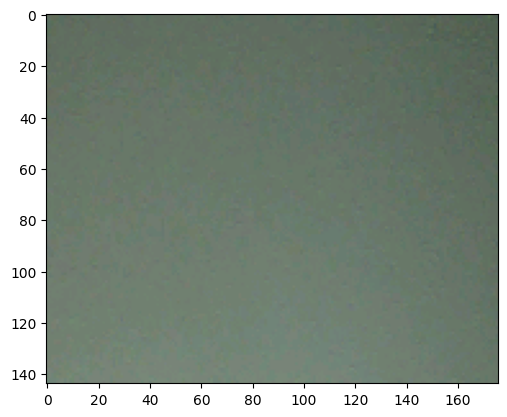

In [20]:
# Reformat the bytes into an image
raw_bytes = np.array(HEXADECIMAL_BYTES, dtype="i2")
image = np.zeros((len(raw_bytes),3), dtype=int)

# Loop through all of the pixels and form the image
for i in range(len(raw_bytes)):
    #Read 16-bit pixel
    pixel = struct.unpack('>h', raw_bytes[i])[0]

    #Convert RGB565 to RGB 24-bit
    r = ((pixel >> 11) & 0x1f) << 3;
    g = ((pixel >> 5) & 0x3f) << 2;
    b = ((pixel >> 0) & 0x1f) << 3;
    image[i] = [r,g,b]

image = np.reshape(image,(144, 176,3)) #QCIF resolution

# Show the image
plt.imshow(image)
plt.show()